In [379]:
import pandas as pd

# Loading the data into DataFrame

## First set of Data: 
### Downloaded from Kaggle as tsv file: 'Glioblastoma Journal Abstracts' (https://www.kaggle.com/datasets/rtwillett/glioblastoma-journal-abstracts)
### PubMed abstracts for the keyword "Glioblastoma" from 1951-2020

In [380]:
abstracts_df = pd.read_csv('gbm_abstracts.tsv', sep='\t')

In [381]:
abstracts_df.head()

,pubmed_ids,abstract
0,pubmed_ids,abstract
1,33246167,Pharmacol Res. 2020 Nov 24:105302. doi: 10.101...
2,33245946,Radiother Oncol. 2020 Nov 24. pii: S0167-8140(...
3,33245930,Chem Biol Interact. 2020 Nov 24:109334. doi: 1...
4,33245897,Eur J Pharmacol. 2020 Nov 24:173756. doi: 10.1...


In [382]:
#Separating the text into relevant columns that contain information on the paper
#The text is split into columns according to punctuation pattern

abstracts_df[['Data', 'Title', 'Authors', 'Affiliations', 'Abstract_text', 'copyright', 'IDs', 'copyright', 'extra', 'ola']] = abstracts_df['abstract'].str.split('\n\n', expand=True)

In [383]:
abstracts_df['Data'] = abstracts_df['Data'].apply(lambda x: x.replace('. ', ','))

In [384]:
abstracts_df[['Journal', 'Date', 'doi','x','y','z','p']]= abstracts_df['Data'].str.split(',', expand=True)

In [385]:
abstracts_df[['date', 'issue', 'extra2', 'extra3']]= abstracts_df['Date'].str.split(';', expand=True)

In [386]:
abstracts_df[['clean_date', 'extra4', 'extra5']]= abstracts_df['date'].str.split(':', expand=True)

In [387]:
#Dropping unnecessary or empty columns
abstracts_df.drop('z', axis=1, inplace=True)
abstracts_df.drop('x', axis=1, inplace=True)
abstracts_df.drop('y', axis=1, inplace=True)
abstracts_df.drop('p', axis=1, inplace=True)
abstracts_df.drop('extra2', axis=1, inplace=True)
abstracts_df.drop('extra3', axis=1, inplace=True)
abstracts_df.drop('ola', axis=1, inplace=True)
abstracts_df.drop('extra', axis=1, inplace=True)
abstracts_df.drop('extra5', axis=1, inplace=True)
abstracts_df.drop('Date', axis=1, inplace = True)
abstracts_df.drop('extra4', axis=1, inplace = True)

In [388]:
#Changing the date into a Datetime format
import datetime

In [389]:
abstracts_df['clean_date'] = pd.to_datetime(abstracts_df['clean_date'], format='mixed', errors='coerce')

In [390]:
#Creating an Year column out of the Date column
abstracts_df['Year'] = abstracts_df['clean_date'].dt.strftime('%Y')

### Cleaning DataFrame

In [391]:
#Droping all rows with no data on the 'abstract text' column
abstracts_df.dropna(axis=0, subset=['Abstract_text'], inplace=True)

In [392]:
#Droping all rows with inappropriate data on the 'abstract text' column
#By presence of words that should not be found on abstract text

abstracts_df = abstracts_df[abstracts_df['Abstract_text'].str.contains('DOI:|DOI|doi|Author information:')== False]
abstracts_df = abstracts_df[abstracts_df['Abstract_text'].str.contains('No abstract available|Erratum in|Comment in')== False]

In [394]:
#Keeping only rows where the data in the journal column is a short string (as it should be)
abstracts_df = abstracts_df.loc[abstracts_df['Journal'].str.len() < 60]

In [395]:
#Keeping only rows where the data in the journal column is a short string (as it should be)
abstracts_df = abstracts_df.loc[abstracts_df['Abstract_text'].str.len() > 300]

In [396]:
#Dropping unnecessary columns
abstracts_df.drop('copyright', axis=1, inplace = True)
abstracts_df.drop('IDs', axis=1, inplace = True)

In [398]:
abstracts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67284 entries, 1 to 88407
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   pubmed_ids     67284 non-null  object        
 1   abstract       67284 non-null  object        
 2   Data           67284 non-null  object        
 3   Title          67284 non-null  object        
 4   Authors        67284 non-null  object        
 5   Affiliations   67284 non-null  object        
 6   Abstract_text  67284 non-null  object        
 7   Journal        67284 non-null  object        
 8   doi            52224 non-null  object        
 9   date           67284 non-null  object        
 10  issue          66380 non-null  object        
 11  clean_date     65041 non-null  datetime64[ns]
 12  Year           65041 non-null  object        
dtypes: datetime64[ns](1), object(12)
memory usage: 7.2+ MB


In [399]:
new_abstracts = open('abstract-glioblasto-set (1).txt', 'r')

## Second set of Data:

### PubMed abstracts for the keyword "Glioblastoma" from 2020-2024  (10k)
### Downloaded from PubMed site as a txt file

In [400]:
str_txt = open('abstract-glioblasto-set (1).txt').read()

In [401]:
#split text into a list of individual abstracts with their information
str_txt2 = str_txt.split('\n\n\n')

In [402]:
#verifying that the length of list matches the number of abstracts expected
len(str_txt2)

10000

In [404]:
#conversion of the list into DataFrame
abstracts_df2 = pd.DataFrame(str_txt2, columns=['abstracts'])

In [405]:
abstracts_df2

,abstracts
0,1. Cell. 2022 Aug 4;185(16):2899-2917.e31. doi...
1,2. Cancer Cell. 2022 Jun 13;40(6):639-655.e13....
2,3. JAMA. 2023 Feb 21;329(7):574-587. doi: 10.1...
3,4. J Clin Invest. 2023 Mar 1;133(5):e147087. d...
4,5. J Neurol Neurosurg Psychiatry. 2021 Oct;92(...
...,...
9995,9996. Cancers (Basel). 2023 Aug 11;15(16):4061...
9996,9997. Neurooncol Adv. 2023 May 12;5(1):vdad055...
9997,9998. Neurooncol Adv. 2022 Aug 19;4(1):vdac134...
9998,9999. Front Oncol. 2022 Apr 28;12:871798. doi:...


In [406]:
#Separating the text into relevant columns that contain information on the paper
#The text is split into columns according to punctuation pattern
abstracts_df2[['Data', 'Title', 'Authors', 'Affiliations', 'Abstract_text', 'copyright', 'IDs', 'copyright', 'extra', 'ola']] = abstracts_df2['abstracts'].str.split('\n\n', expand=True)

In [407]:
abstracts_df2

,abstracts,Data,Title,Authors,Affiliations,Abstract_text,copyright,IDs,extra,ola
0,1. Cell. 2022 Aug 4;185(16):2899-2917.e31. doi...,1. Cell. 2022 Aug 4;185(16):2899-2917.e31. doi...,Glioblastoma hijacks neuronal mechanisms for b...,"Venkataramani V(1), Yang Y(2), Schubert MC(3),...",Author information:\n(1)Neurology Clinic and N...,Comment in\n Cell. 2022 Aug 4;185(16):2846-...,DOI: 10.1016/j.cell.2022.06.054\nPMID: 3591452...,Copyright © 2022 Elsevier Inc. All rights rese...,Conflict of interest statement: Declaration of...,None
1,2. Cancer Cell. 2022 Jun 13;40(6):639-655.e13....,2. Cancer Cell. 2022 Jun 13;40(6):639-655.e13....,Spatially resolved multi-omics deciphers bidir...,"Ravi VM(1), Will P(2), Kueckelhaus J(3), Sun N...",Author information:\n(1)Microenvironment and I...,Glioblastomas are malignant tumors of the cent...,Conflict of interest statement: Declaration of...,DOI: 10.1016/j.ccell.2022.05.009\nPMID: 357007...,None,None
2,3. JAMA. 2023 Feb 21;329(7):574-587. doi: 10.1...,3. JAMA. 2023 Feb 21;329(7):574-587. doi: 10.1...,Glioblastoma and Other Primary Brain Malignanc...,"Schaff LR(1)(2), Mellinghoff IK(1)(2)(3)(4).",Author information:\n(1)Department of Neurolog...,Comment in\n JAMA. 2023 Jul 11;330(2):188-1...,None,DOI: 10.1001/jama.2023.0023\nPMID: 36809318 [I...,None,None
3,4. J Clin Invest. 2023 Mar 1;133(5):e147087. d...,4. J Clin Invest. 2023 Mar 1;133(5):e147087. d...,Single-cell RNA sequencing and spatial transcr...,"Jain S(1), Rick JW(1), Joshi RS(1), Beniwal A(...",Author information:\n(1)Department of Neurosur...,Cancer-associated fibroblasts (CAFs) were pres...,None,None,None,None
4,5. J Neurol Neurosurg Psychiatry. 2021 Oct;92(...,5. J Neurol Neurosurg Psychiatry. 2021 Oct;92(...,Advances in the management of glioblastoma.,"Ma R(1)(2)(3), Taphoorn MJB(4)(5), Plaha P(6)(...",Author information:\n(1)Department of Neurosur...,Glioblastoma (GB) is the most common and most ...,Conflict of interest statement: Competing inte...,DOI: 10.1136/jnnp-2020-325334\nPMID: 34162730 ...,None,None
...,...,...,...,...,...,...,...,...,...,...
9995,9996. Cancers (Basel). 2023 Aug 11;15(16):4061...,9996. Cancers (Basel). 2023 Aug 11;15(16):4061...,Mitochondrial Peptide Humanin Facilitates Chem...,"Peña Agudelo JA(1), Pidre ML(2), Garcia Fallit...",Author information:\n(1)Instituto de Investiga...,Humanin (HN) is a mitochondrial-derived peptid...,None,Conflict of interest statement: The authors de...,None,None
9996,9997. Neurooncol Adv. 2023 May 12;5(1):vdad055...,9997. Neurooncol Adv. 2023 May 12;5(1):vdad055...,Treatment of unmethylated MGMT-promoter recurr...,"Ranjan T(1)(2), Yu A(3), Elhamdani S(1), Howar...",Author information:\n(1)Department of Neuro-on...,BACKGROUND: Glioblastoma (GBM) is a lethal dis...,Conflict of interest statement: Drs. Claudio a...,DOI: 10.1093/noajnl/vdad055\nPMCID: PMC1024398...,None,None
9997,9998. Neurooncol Adv. 2022 Aug 19;4(1):vdac134...,9998. Neurooncol Adv. 2022 Aug 19;4(1):vdac134...,"An investigation of the conformity, feasibilit...","Brighi C(1)(2), Keall PJ(1)(2), Holloway LC(2)...",Author information:\n(1)ACRF Image X Institute...,BACKGROUND: New technologies developed to impr...,None,DOI: 10.1093/noajnl/vdac134\nPMCID: PMC9466270...,None,None
9998,9999. Front Oncol. 2022 Apr 28;12:871798. doi:...,9999. Front Oncol. 2022 Apr 28;12:871798. doi:...,Lactate Induces the Expressions of MCT1 and HC...,"Longhitano L(1), Vicario N(1), Tibullo D(1), G...",Author information:\n(1)Department of Biomedic...,The tumor microenvironment (TME) plays a pivot...,Conflict of interest statement: The authors de...,DOI: 10.3389/fonc.2022.871798\nPMCID: PMC90979...,None,None


In [408]:
abstracts_df2['Data'] = abstracts_df2['Data'].apply(lambda x: x.replace('. ', ','))

In [409]:
abstracts_df2['Data'][11]

'12,Pathol Res Pract,2022 Apr;232:153813,doi: 10.1016/j.prp.2022.153813,Epub 2022 \nFeb 24.'

In [410]:
abstracts_df2

,abstracts,Data,Title,Authors,Affiliations,Abstract_text,copyright,IDs,extra,ola
0,1. Cell. 2022 Aug 4;185(16):2899-2917.e31. doi...,"1,Cell,2022 Aug 4;185(16):2899-2917.e31,doi: 1...",Glioblastoma hijacks neuronal mechanisms for b...,"Venkataramani V(1), Yang Y(2), Schubert MC(3),...",Author information:\n(1)Neurology Clinic and N...,Comment in\n Cell. 2022 Aug 4;185(16):2846-...,DOI: 10.1016/j.cell.2022.06.054\nPMID: 3591452...,Copyright © 2022 Elsevier Inc. All rights rese...,Conflict of interest statement: Declaration of...,None
1,2. Cancer Cell. 2022 Jun 13;40(6):639-655.e13....,"2,Cancer Cell,2022 Jun 13;40(6):639-655.e13,do...",Spatially resolved multi-omics deciphers bidir...,"Ravi VM(1), Will P(2), Kueckelhaus J(3), Sun N...",Author information:\n(1)Microenvironment and I...,Glioblastomas are malignant tumors of the cent...,Conflict of interest statement: Declaration of...,DOI: 10.1016/j.ccell.2022.05.009\nPMID: 357007...,None,None
2,3. JAMA. 2023 Feb 21;329(7):574-587. doi: 10.1...,"3,JAMA,2023 Feb 21;329(7):574-587,doi: 10.1001...",Glioblastoma and Other Primary Brain Malignanc...,"Schaff LR(1)(2), Mellinghoff IK(1)(2)(3)(4).",Author information:\n(1)Department of Neurolog...,Comment in\n JAMA. 2023 Jul 11;330(2):188-1...,None,DOI: 10.1001/jama.2023.0023\nPMID: 36809318 [I...,None,None
3,4. J Clin Invest. 2023 Mar 1;133(5):e147087. d...,"4,J Clin Invest,2023 Mar 1;133(5):e147087,doi:...",Single-cell RNA sequencing and spatial transcr...,"Jain S(1), Rick JW(1), Joshi RS(1), Beniwal A(...",Author information:\n(1)Department of Neurosur...,Cancer-associated fibroblasts (CAFs) were pres...,None,None,None,None
4,5. J Neurol Neurosurg Psychiatry. 2021 Oct;92(...,"5,J Neurol Neurosurg Psychiatry,2021 Oct;92(10...",Advances in the management of glioblastoma.,"Ma R(1)(2)(3), Taphoorn MJB(4)(5), Plaha P(6)(...",Author information:\n(1)Department of Neurosur...,Glioblastoma (GB) is the most common and most ...,Conflict of interest statement: Competing inte...,DOI: 10.1136/jnnp-2020-325334\nPMID: 34162730 ...,None,None
...,...,...,...,...,...,...,...,...,...,...
9995,9996. Cancers (Basel). 2023 Aug 11;15(16):4061...,"9996,Cancers (Basel),2023 Aug 11;15(16):4061,d...",Mitochondrial Peptide Humanin Facilitates Chem...,"Peña Agudelo JA(1), Pidre ML(2), Garcia Fallit...",Author information:\n(1)Instituto de Investiga...,Humanin (HN) is a mitochondrial-derived peptid...,None,Conflict of interest statement: The authors de...,None,None
9996,9997. Neurooncol Adv. 2023 May 12;5(1):vdad055...,"9997,Neurooncol Adv,2023 May 12;5(1):vdad055,d...",Treatment of unmethylated MGMT-promoter recurr...,"Ranjan T(1)(2), Yu A(3), Elhamdani S(1), Howar...",Author information:\n(1)Department of Neuro-on...,BACKGROUND: Glioblastoma (GBM) is a lethal dis...,Conflict of interest statement: Drs. Claudio a...,DOI: 10.1093/noajnl/vdad055\nPMCID: PMC1024398...,None,None
9997,9998. Neurooncol Adv. 2022 Aug 19;4(1):vdac134...,"9998,Neurooncol Adv,2022 Aug 19;4(1):vdac134,d...","An investigation of the conformity, feasibilit...","Brighi C(1)(2), Keall PJ(1)(2), Holloway LC(2)...",Author information:\n(1)ACRF Image X Institute...,BACKGROUND: New technologies developed to impr...,None,DOI: 10.1093/noajnl/vdac134\nPMCID: PMC9466270...,None,None
9998,9999. Front Oncol. 2022 Apr 28;12:871798. doi:...,"9999,Front Oncol,2022 Apr 28;12:871798,doi: 10...",Lactate Induces the Expressions of MCT1 and HC...,"Longhitano L(1), Vicario N(1), Tibullo D(1), G...",Author information:\n(1)Department of Biomedic...,The tumor microenvironment (TME) plays a pivot...,Conflict of interest statement: The authors de...,DOI: 10.3389/fonc.2022.871798\nPMCID: PMC90979...,None,None


In [411]:
#Separating the text into relevant columns that contain information on the paper
#The text is split into columns according to punctuation pattern
abstracts_df2[['number','Journal', 'Date', 'doi','x']]= abstracts_df2['Data'].str.split(',', expand=True)

In [412]:
abstracts_df2.tail()

,abstracts,Data,Title,Authors,Affiliations,Abstract_text,copyright,IDs,extra,ola,number,Journal,Date,doi,x
9995,9996. Cancers (Basel). 2023 Aug 11;15(16):4061...,"9996,Cancers (Basel),2023 Aug 11;15(16):4061,d...",Mitochondrial Peptide Humanin Facilitates Chem...,"Peña Agudelo JA(1), Pidre ML(2), Garcia Fallit...",Author information:\n(1)Instituto de Investiga...,Humanin (HN) is a mitochondrial-derived peptid...,None,Conflict of interest statement: The authors de...,None,None,9996,Cancers (Basel),2023 Aug 11;15(16):4061,doi: 10.3390/cancers15164061.,None
9996,9997. Neurooncol Adv. 2023 May 12;5(1):vdad055...,"9997,Neurooncol Adv,2023 May 12;5(1):vdad055,d...",Treatment of unmethylated MGMT-promoter recurr...,"Ranjan T(1)(2), Yu A(3), Elhamdani S(1), Howar...",Author information:\n(1)Department of Neuro-on...,BACKGROUND: Glioblastoma (GBM) is a lethal dis...,Conflict of interest statement: Drs. Claudio a...,DOI: 10.1093/noajnl/vdad055\nPMCID: PMC1024398...,None,None,9997,Neurooncol Adv,2023 May 12;5(1):vdad055,doi: 10.1093/noajnl/vdad055,\neCollection 2023 Jan-Dec.
9997,9998. Neurooncol Adv. 2022 Aug 19;4(1):vdac134...,"9998,Neurooncol Adv,2022 Aug 19;4(1):vdac134,d...","An investigation of the conformity, feasibilit...","Brighi C(1)(2), Keall PJ(1)(2), Holloway LC(2)...",Author information:\n(1)ACRF Image X Institute...,BACKGROUND: New technologies developed to impr...,None,DOI: 10.1093/noajnl/vdac134\nPMCID: PMC9466270...,None,None,9998,Neurooncol Adv,2022 Aug 19;4(1):vdac134,doi: 10.1093/noajnl/vdac134,\neCollection 2022 Jan-Dec.
9998,9999. Front Oncol. 2022 Apr 28;12:871798. doi:...,"9999,Front Oncol,2022 Apr 28;12:871798,doi: 10...",Lactate Induces the Expressions of MCT1 and HC...,"Longhitano L(1), Vicario N(1), Tibullo D(1), G...",Author information:\n(1)Department of Biomedic...,The tumor microenvironment (TME) plays a pivot...,Conflict of interest statement: The authors de...,DOI: 10.3389/fonc.2022.871798\nPMCID: PMC90979...,None,None,9999,Front Oncol,2022 Apr 28;12:871798,doi: 10.3389/fonc.2022.871798,eCollection \n2022.
9999,10000. Pharmaceuticals (Basel). 2021 Nov 20;14...,"10000,Pharmaceuticals (Basel),2021 Nov 20;14(1...",SapC-DOPS as a Novel Therapeutic and Diagnosti...,"Kaynak A(1)(2), Davis HW(1), Vallabhapurapu SD...",Author information:\n(1)Division of Hematology...,"Glioblastoma multiforme (GBM), the most common...",None,Conflict of interest statement: X.Q. is listed...,None,None,10000,Pharmaceuticals (Basel),2021 Nov 20;14(11):1193,doi: 10.3390/ph14111193.,None


In [413]:
#Separating the text into relevant columns that contain information on the paper
#The text is split into columns according to punctuation pattern
abstracts_df2[['date', 'issue']]= abstracts_df2['Date'].str.split(';', expand=True)

In [414]:
abstracts_df2

,abstracts,Data,Title,Authors,Affiliations,Abstract_text,copyright,IDs,extra,ola,number,Journal,Date,doi,x,date,issue
0,1. Cell. 2022 Aug 4;185(16):2899-2917.e31. doi...,"1,Cell,2022 Aug 4;185(16):2899-2917.e31,doi: 1...",Glioblastoma hijacks neuronal mechanisms for b...,"Venkataramani V(1), Yang Y(2), Schubert MC(3),...",Author information:\n(1)Neurology Clinic and N...,Comment in\n Cell. 2022 Aug 4;185(16):2846-...,DOI: 10.1016/j.cell.2022.06.054\nPMID: 3591452...,Copyright © 2022 Elsevier Inc. All rights rese...,Conflict of interest statement: Declaration of...,None,1,Cell,2022 Aug 4;185(16):2899-2917.e31,doi: 10.1016/j.cell.2022.06.054,Epub \n2022 Jul 31.,2022 Aug 4,185(16):2899-2917.e31
1,2. Cancer Cell. 2022 Jun 13;40(6):639-655.e13....,"2,Cancer Cell,2022 Jun 13;40(6):639-655.e13,do...",Spatially resolved multi-omics deciphers bidir...,"Ravi VM(1), Will P(2), Kueckelhaus J(3), Sun N...",Author information:\n(1)Microenvironment and I...,Glioblastomas are malignant tumors of the cent...,Conflict of interest statement: Declaration of...,DOI: 10.1016/j.ccell.2022.05.009\nPMID: 357007...,None,None,2,Cancer Cell,2022 Jun 13;40(6):639-655.e13,doi: 10.1016/j.ccell.2022.05.009.,None,2022 Jun 13,40(6):639-655.e13
2,3. JAMA. 2023 Feb 21;329(7):574-587. doi: 10.1...,"3,JAMA,2023 Feb 21;329(7):574-587,doi: 10.1001...",Glioblastoma and Other Primary Brain Malignanc...,"Schaff LR(1)(2), Mellinghoff IK(1)(2)(3)(4).",Author information:\n(1)Department of Neurolog...,Comment in\n JAMA. 2023 Jul 11;330(2):188-1...,None,DOI: 10.1001/jama.2023.0023\nPMID: 36809318 [I...,None,None,3,JAMA,2023 Feb 21;329(7):574-587,doi: 10.1001/jama.2023.0023.,None,2023 Feb 21,329(7):574-587
3,4. J Clin Invest. 2023 Mar 1;133(5):e147087. d...,"4,J Clin Invest,2023 Mar 1;133(5):e147087,doi:...",Single-cell RNA sequencing and spatial transcr...,"Jain S(1), Rick JW(1), Joshi RS(1), Beniwal A(...",Author information:\n(1)Department of Neurosur...,Cancer-associated fibroblasts (CAFs) were pres...,None,None,None,None,4,J Clin Invest,2023 Mar 1;133(5):e147087,doi: 10.1172/JCI147087.,None,2023 Mar 1,133(5):e147087
4,5. J Neurol Neurosurg Psychiatry. 2021 Oct;92(...,"5,J Neurol Neurosurg Psychiatry,2021 Oct;92(10...",Advances in the management of glioblastoma.,"Ma R(1)(2)(3), Taphoorn MJB(4)(5), Plaha P(6)(...",Author information:\n(1)Department of Neurosur...,Glioblastoma (GB) is the most common and most ...,Conflict of interest statement: Competing inte...,DOI: 10.1136/jnnp-2020-325334\nPMID: 34162730 ...,None,None,5,J Neurol Neurosurg Psychiatry,2021 Oct;92(10):1103-1111,doi: \n10.1136/jnnp-2020-325334,Epub 2021 Jun 23.,2021 Oct,92(10):1103-1111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996. Cancers (Basel). 2023 Aug 11;15(16):4061...,"9996,Cancers (Basel),2023 Aug 11;15(16):4061,d...",Mitochondrial Peptide Humanin Facilitates Chem...,"Peña Agudelo JA(1), Pidre ML(2), Garcia Fallit...",Author information:\n(1)Instituto de Investiga...,Humanin (HN) is a mitochondrial-derived peptid...,None,Conflict of interest statement: The authors de...,None,None,9996,Cancers (Basel),2023 Aug 11;15(16):4061,doi: 10.3390/cancers15164061.,None,2023 Aug 11,15(16):4061
9996,9997. Neurooncol Adv. 2023 May 12;5(1):vdad055...,"9997,Neurooncol Adv,2023 May 12;5(1):vdad055,d...",Treatment of unmethylated MGMT-promoter recurr...,"Ranjan T(1)(2), Yu A(3), Elhamdani S(1), Howar...",Author information:\n(1)Department of Neuro-on...,BACKGROUND: Glioblastoma (GBM) is a lethal dis...,Conflict of interest statement: Drs. Claudio a...,DOI: 10.1093/noajnl/vdad055\nPMCID: PMC1024398...,None,None,9997,Neurooncol Adv,2023 May 12;5(1):vdad055,doi: 10.1093/noajnl/vdad055,\neCollection 2023 Jan-Dec.,2023 May 12,5(1):vdad055
9997,9998. Neurooncol Adv. 2022 Aug 19;4(1):vdac134...,"9998,Neurooncol Adv,2022 Aug 19;4(1):vdac134,d...","An investigation of the conformity, feasibilit...","Brighi C(1)(2), Keall PJ(1)(2), Holloway LC(2)...",Author information:\n(1)ACRF Image X In

In [624]:
#Changing the date into a Datetime format
#coercing errors in case the date is missing in any of the rows

import datetime
abstracts_df2['clean_date'] = pd.to_datetime(abstracts_df2['date'], format='mixed', errors='coerce')
abstracts_df2['clean_date']

0      2022-06-13
1      2023-03-01
2      2021-10-01
3      2023-01-01
4      2023-06-01
          ...    
9293   2023-08-11
9294   2023-05-12
9295   2022-08-19
9296   2022-04-28
9297          NaT
Name: clean_date, Length: 9298, dtype: datetime64[ns]

In [429]:
#abstracts_df2['clean_date']= pd.to_datetime(abstracts_df2['clean_date'], errors = 'coerce')

/var/folders/qz/zk8c4p457d711gz_g884g3sh0000gn/T/ipykernel_78643/4139982631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abstracts_df2['clean_date']= pd.to_datetime(abstracts_df2['clean_date'], errors = 'coerce')


In [431]:
abstracts_df2['Year'] = abstracts_df2['clean_date'].dt.strftime('%Y')

/var/folders/qz/zk8c4p457d711gz_g884g3sh0000gn/T/ipykernel_78643/2578582170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abstracts_df2['Year'] = abstracts_df2['clean_date'].dt.strftime('%Y')


### Cleaning second DataFrame

In [415]:
#dropping unnecessary columns 

abstracts_df2.drop('extra', axis=1, inplace=True)
abstracts_df2.drop('ola', axis=1, inplace=True)
abstracts_df2.drop('number', axis=1, inplace=True)
abstracts_df2.drop('doi', axis=1, inplace=True)
abstracts_df2.drop('copyright', axis=1, inplace=True)

In [421]:
#dropping unnecessary columns 
abstracts_df2.drop('x', axis=1, inplace=True)

/var/folders/qz/zk8c4p457d711gz_g884g3sh0000gn/T/ipykernel_78643/3554498307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abstracts_df2.drop('x', axis=1, inplace=True)


In [422]:
#dropping unnecessary columns 
abstracts_df2.drop('Date', axis=1, inplace=True)

/var/folders/qz/zk8c4p457d711gz_g884g3sh0000gn/T/ipykernel_78643/4124961887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abstracts_df2.drop('Date', axis=1, inplace=True)


In [418]:
#Droping all rows with no data on the 'abstract text' column

abstracts_df2.dropna(axis=0, subset=['Abstract_text'], inplace=True)

In [419]:
#Droping all rows with inappropriate data on the 'abstract text' column
#By presence of words that should not be found on abstract text
abstracts_df2 = abstracts_df2[abstracts_df2['Abstract_text'].str.contains('Comment in|DOI:|DOI|doi|Author information:')== False]

In [420]:
abstracts_df2.head(500)

,abstracts,Data,Title,Authors,Affiliations,Abstract_text,IDs,Journal,Date,x,date,issue,clean_date
1,2. Cancer Cell. 2022 Jun 13;40(6):639-655.e13....,"2,Cancer Cell,2022 Jun 13;40(6):639-655.e13,do...",Spatially resolved multi-omics deciphers bidir...,"Ravi VM(1), Will P(2), Kueckelhaus J(3), Sun N...",Author information:\n(1)Microenvironment and I...,Glioblastomas are malignant tumors of the cent...,DOI: 10.1016/j.ccell.2022.05.009\nPMID: 357007...,Cancer Cell,2022 Jun 13;40(6):639-655.e13,None,2022 Jun 13,40(6):639-655.e13,2022-06-13 00:00:00
3,4. J Clin Invest. 2023 Mar 1;133(5):e147087. d...,"4,J Clin Invest,2023 Mar 1;133(5):e147087,doi:...",Single-cell RNA sequencing and spatial transcr...,"Jain S(1), Rick JW(1), Joshi RS(1), Beniwal A(...",Author information:\n(1)Department of Neurosur...,Cancer-associated fibroblasts (CAFs) were pres...,None,J Clin Invest,2023 Mar 1;133(5):e147087,None,2023 Mar 1,133(5):e147087,2023-03-01 00:00:00
4,5. J Neurol Neurosurg Psychiatry. 2021 Oct;92(...,"5,J Neurol Neurosurg Psychiatry,2021 Oct;92(10...",Advances in the management of glioblastoma.,"Ma R(1)(2)(3), Taphoorn MJB(4)(5), Plaha P(6)(...",Author information:\n(1)Department of Neurosur...,Glioblastoma (GB) is the most common and most ...,DOI: 10.1136/jnnp-2020-325334\nPMID: 34162730 ...,J Neurol Neurosurg Psychiatry,2021 Oct;92(10):1103-1111,Epub 2021 Jun 23.,2021 Oct,92(10):1103-1111,2021-10-01 00:00:00
5,6. Pharmacology. 2023;108(5):423-431. doi: 10....,"6,Pharmacology,2023;108(5):423-431,doi: 10.115...",Glioblastoma Multiforme: The Latest Diagnostic...,"Czarnywojtek A(1)(2), Borowska M(1), Dyrka K(3...",Author information:\n(1)Chair and Department o...,BACKGROUND: Glioblastoma multiforme (GBM) is a...,DOI: 10.1159/000531319\nPMID: 37459849 [Indexe...,Pharmacology,2023;108(5):423-431,Epub 2023 Jul 17.,2023,108(5):423-431,2023-01-01 00:00:00
6,7. Oncogene. 2023 Jun;42(27):2155-2165. doi: 1...,"7,Oncogene,2023 Jun;42(27):2155-2165,doi: 10.1...",Glioblastoma heterogeneity at single cell reso...,"Eisenbarth D(1), Wang YA(2).",Author information:\n(1)The Brown Center for I...,Glioblastoma (GBM) is one of the deadliest typ...,DOI: 10.1038/s41388-023-02738-y\nPMCID: PMC109...,Oncogene,2023 Jun;42(27):2155-2165,Epub 2023 \nJun 5.,2023 Jun,42(27):2155-2165,2023-06-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,544. Mult Scler Relat Disord. 2021 May;50:1028...,"544,Mult Scler Relat Disord,2021 May;50:102877...",The concurrence of multiple sclerosis and glio...,"Alkabie S(1), Castrodad-Molina R(2), Heck KA(3...",Author information:\n(1)Maxine Mesinger Multip...,INTRODUCTION: Glioblastoma rarely coincides wi...,DOI: 10.1016/j.msard.2021.102877\nPMID: 337115...,Mult Scler Relat Disord,2021 May;50:102877,\nEpub 2021 Mar 2.,2021 May,50:102877,2021-05-01 00:00:00
544,545. Neurosurg Clin N Am. 2021 Jan;32(1):9-22....,"545,Neurosurg Clin N Am,2021 Jan;32(1):9-22,do...",Role of Resection in Glioblastoma Management.,"Youngblood MW(1), Stupp R(2), Sonabend AM(3).",Author information:\n(1)Department of Neurolog...,"Whenever possible, maximal safe resection is t...",DOI: 10.1016/j.nec.2020.08.002\nPMID: 33223030...,Neurosurg Clin N Am,2021 Jan;32(1):9-22,Epub \n2020 Nov 5.,2021 Jan,32(1):9-22,2021-01-01 00:00:00
545,546. Histochem Cell Biol. 2023 May;159(5):431-...,"546,Histochem Cell Biol,2023 May;159(5):431-43...",Alpha-1 antitrypsin expression is upregulated ...,"Divac Rankov A(1), Jovanović Stojanov S(2), Dr...",Author information:\n(1)Institute of Molecular...,Identification of the signature molecular prof...,DOI: 10.1007/s00418-022-02172-3\nPMID: 3653618...,Histochem Cell Biol,2023 May;159(5):431-437,\nEpub 2022 Dec 19.,2023 May,159(5):431-437,2023-05-01 00:00:00
546,547. ACS Nano. 2023 Feb 28;17(4):4062-4076. do...,"547,ACS Nano,2023 Feb 28;17(4):4062-4076,doi: ...",Radiation-Triggered Selenium-Engineered Mesopo...,"Tang X(1)(2), Wang Z(2), Xie Y(2), Liu Y(2), Y...",Author information:\n(1)Department of Neuro-Ps...,Radio

## Merging the two dataframes
### Make sure that their columns are named the same and idexes match

In [423]:
#renaming column in dataframe2 so it matches the first one
abstracts_df2.rename(columns={'abstracts': 'abstract'}, inplace=True)

/var/folders/qz/zk8c4p457d711gz_g884g3sh0000gn/T/ipykernel_78643/2448416666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abstracts_df2.rename(columns={'abstracts': 'abstract'}, inplace=True)


In [425]:
#reseting indexes for first dataframe
abstracts_df.reset_index(inplace=True)
abstracts_df.drop('index', axis=1, inplace=True)


In [427]:
#reseting indexes for second dataframe
abstracts_df2.reset_index(inplace=True)
abstracts_df2.drop('index', axis=1, inplace=True)

In [430]:
abstracts_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9298 entries, 0 to 9297
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   abstract       9298 non-null   object        
 1   Data           9298 non-null   object        
 2   Title          9298 non-null   object        
 3   Authors        9298 non-null   object        
 4   Affiliations   9298 non-null   object        
 5   Abstract_text  9298 non-null   object        
 6   IDs            8447 non-null   object        
 7   Journal        9298 non-null   object        
 8   date           9289 non-null   object        
 9   issue          9093 non-null   object        
 10  clean_date     8883 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(10)
memory usage: 799.2+ KB


In [432]:
abstracts_df2

,abstract,Data,Title,Authors,Affiliations,Abstract_text,IDs,Journal,date,issue,clean_date,Year
0,2. Cancer Cell. 2022 Jun 13;40(6):639-655.e13....,"2,Cancer Cell,2022 Jun 13;40(6):639-655.e13,do...",Spatially resolved multi-omics deciphers bidir...,"Ravi VM(1), Will P(2), Kueckelhaus J(3), Sun N...",Author information:\n(1)Microenvironment and I...,Glioblastomas are malignant tumors of the cent...,DOI: 10.1016/j.ccell.2022.05.009\nPMID: 357007...,Cancer Cell,2022 Jun 13,40(6):639-655.e13,2022-06-13,2022
1,4. J Clin Invest. 2023 Mar 1;133(5):e147087. d...,"4,J Clin Invest,2023 Mar 1;133(5):e147087,doi:...",Single-cell RNA sequencing and spatial transcr...,"Jain S(1), Rick JW(1), Joshi RS(1), Beniwal A(...",Author information:\n(1)Department of Neurosur...,Cancer-associated fibroblasts (CAFs) were pres...,None,J Clin Invest,2023 Mar 1,133(5):e147087,2023-03-01,2023
2,5. J Neurol Neurosurg Psychiatry. 2021 Oct;92(...,"5,J Neurol Neurosurg Psychiatry,2021 Oct;92(10...",Advances in the management of glioblastoma.,"Ma R(1)(2)(3), Taphoorn MJB(4)(5), Plaha P(6)(...",Author information:\n(1)Department of Neurosur...,Glioblastoma (GB) is the most common and most ...,DOI: 10.1136/jnnp-2020-325334\nPMID: 34162730 ...,J Neurol Neurosurg Psychiatry,2021 Oct,92(10):1103-1111,2021-10-01,2021
3,6. Pharmacology. 2023;108(5):423-431. doi: 10....,"6,Pharmacology,2023;108(5):423-431,doi: 10.115...",Glioblastoma Multiforme: The Latest Diagnostic...,"Czarnywojtek A(1)(2), Borowska M(1), Dyrka K(3...",Author information:\n(1)Chair and Department o...,BACKGROUND: Glioblastoma multiforme (GBM) is a...,DOI: 10.1159/000531319\nPMID: 37459849 [Indexe...,Pharmacology,2023,108(5):423-431,2023-01-01,2023
4,7. Oncogene. 2023 Jun;42(27):2155-2165. doi: 1...,"7,Oncogene,2023 Jun;42(27):2155-2165,doi: 10.1...",Glioblastoma heterogeneity at single cell reso...,"Eisenbarth D(1), Wang YA(2).",Author information:\n(1)The Brown Center for I...,Glioblastoma (GBM) is one of the deadliest typ...,DOI: 10.1038/s41388-023-02738-y\nPMCID: PMC109...,Oncogene,2023 Jun,42(27):2155-2165,2023-06-01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
9293,9996. Cancers (Basel). 2023 Aug 11;15(16):4061...,"9996,Cancers (Basel),2023 Aug 11;15(16):4061,d...",Mitochondrial Peptide Humanin Facilitates Chem...,"Peña Agudelo JA(1), Pidre ML(2), Garcia Fallit...",Author information:\n(1)Instituto de Investiga...,Humanin (HN) is a mitochondrial-derived peptid...,Conflict of interest statement: The authors de...,Cancers (Basel),2023 Aug 11,15(16):4061,2023-08-11,2023
9294,9997. Neurooncol Adv. 2023 May 12;5(1):vdad055...,"9997,Neurooncol Adv,2023 May 12;5(1):vdad055,d...",Treatment of unmethylated MGMT-promoter recurr...,"Ranjan T(1)(2), Yu A(3), Elhamdani S(1), Howar...",Author information:\n(1)Department of Neuro-on...,BACKGROUND: Glioblastoma (GBM) is a lethal dis...,DOI: 10.1093/noajnl/vdad055\nPMCID: PMC1024398...,Neurooncol Adv,2023 May 12,5(1):vdad055,2023-05-12,2023
9295,9998. Neurooncol Adv. 2022 Aug 19;4(1):vdac134...,"9998,Neurooncol Adv,2022 Aug 19;4(1):vdac134,d...","An investigation of the conformity, feasibilit...","Brighi C(1)(2), Keall PJ(1)(2), Holloway LC(2)...",Author information:\n(1)ACRF Image X Institute...,BACKGROUND: New technologies developed to impr...,DOI: 10.1093/noajnl/vdac134\nPMCID: PMC9466270...,Neurooncol Adv,2022 Aug 19,4(1):vdac134,2022-08-19,2022
9296,9999. Front Oncol. 2022 Apr 28;12:871798. doi:...,"9999,Front Oncol,2022 Apr 28;12:871798,doi: 10...",Lactate Induces the Expressions of MCT1 and HC...,"Longhitano L(1), Vicario N(1), Tibullo D(1), G...",Author information:\n(1)Department of Biomedic...,The tumor microenvironment (TME) plays a pivot...,DOI: 10.3389/fonc.2022.871798\nPMCID: PMC90979...,Front Oncol,2022 Apr 28,12:871798,2022-04-28,2022


In [433]:
#concatenation of the two dataframes into one 

df_new = pd.concat([abstracts_df2, abstracts_df], ignore_index=True, sort=False)

In [508]:
df_new['Abstract_text'][517]

'BACKGROUND: Wnt signaling plays important roles in tumorigenesis, invasiveness \nand therapeutic resistance of glioblastoma (GBM).\nMETHODS: We simultaneously investigated six Wnt pathway markers (Wnt5a, Fzd-2, \nbeta-catenin, Wnt3a, Wnt7b, Fzd-10) at epigenetic and protein levels in 21 \nsequential formalin-fixed paraffin-embedded GBM pairs and controls.\nRESULTS: Expression levels of Wnt5a, beta-catenin and Wnt3a proteins either \nmoderately or significantly increased, while those of Fzd-2, Wnt7b and Fzd-10 \ndecreased in the primary (GBM-P) and recurrent (GBM-R) tumors compared to the \ncontrols. Methylation levels within promoters and genes showed corresponding \ndecreases for Wnt5a, beta-catenin and Wnt3a in tumors vs. controls, while that \nof Fzd-10 was uniformly high. Comparing the GBM-P and GBM-R pairs, proteins of \nFzd-2, beta-catenin and Wnt3a were either moderately or significantly up-, while \nthat of Wnt7b was downregulated in GBM-R, but these patterns were not \naccomp

In [859]:
df_new

,abstract,Data,Title,Authors,Affiliations,Abstract_text,IDs,Journal,date,issue,clean_date,Year,pubmed_ids,doi,lda_vectors
0,2. Cancer Cell. 2022 Jun 13;40(6):639-655.e13....,"2,Cancer Cell,2022 Jun 13;40(6):639-655.e13,do...",Spatially resolved multi-omics deciphers bidir...,"Ravi VM(1), Will P(2), Kueckelhaus J(3), Sun N...",Author information:\n(1)Microenvironment and I...,Glioblastomas are malignant tumors of the cent...,DOI: 10.1016/j.ccell.2022.05.009\nPMID: 357007...,Cancer Cell,2022 Jun 13,40(6):639-655.e13,2022-06-13,2022,NaN,NaN,"[0.06720573, 0.0, 0.0, 0.05448395, 0.0, 0.0307..."
1,4. J Clin Invest. 2023 Mar 1;133(5):e147087. d...,"4,J Clin Invest,2023 Mar 1;133(5):e147087,doi:...",Single-cell RNA sequencing and spatial transcr...,"Jain S(1), Rick JW(1), Joshi RS(1), Beniwal A(...",Author information:\n(1)Department of Neurosur...,Cancer-associated fibroblasts (CAFs) were pres...,None,J Clin Invest,2023 Mar 1,133(5):e147087,2023-03-01,2023,NaN,NaN,"[0.048051614, 0.018007727, 0.0, 0.0, 0.0, 0.20..."
2,5. J Neurol Neurosurg Psychiatry. 2021 Oct;92(...,"5,J Neurol Neurosurg Psychiatry,2021 Oct;92(10...",Advances in the management of glioblastoma.,"Ma R(1)(2)(3), Taphoorn MJB(4)(5), Plaha P(6)(...",Author information:\n(1)Department of Neurosur...,Glioblastoma (GB) is the most common and most ...,DOI: 10.1136/jnnp-2020-325334\nPMID: 34162730 ...,J Neurol Neurosurg Psychiatry,2021 Oct,92(10):1103-1111,2021-10-01,2021,NaN,NaN,"[0.0, 0.0, 0.0, 0.7899274, 0.0, 0.0, 0.0, 0.0,..."
3,6. Pharmacology. 2023;108(5):423-431. doi: 10....,"6,Pharmacology,2023;108(5):423-431,doi: 10.115...",Glioblastoma Multiforme: The Latest Diagnostic...,"Czarnywojtek A(1)(2), Borowska M(1), Dyrka K(3...",Author information:\n(1)Chair and Department o...,BACKGROUND: Glioblastoma multiforme (GBM) is a...,DOI: 10.1159/000531319\nPMID: 37459849 [Indexe...,Pharmacology,2023,108(5):423-431,2023-01-01,2023,NaN,NaN,"[0.0, 0.0, 0.0, 0.49637, 0.0, 0.0, 0.14020105,..."
4,7. Oncogene. 2023 Jun;42(27):2155-2165. doi: 1...,"7,Oncogene,2023 Jun;42(27):2155-2165,doi: 10.1...",Glioblastoma heterogeneity at single cell reso...,"Eisenbarth D(1), Wang YA(2).",Author information:\n(1)The Brown Center for I...,Glioblastoma (GBM) is one of the deadliest typ...,DOI: 10.1038/s41388-023-02738-y\nPMCID: PMC109...,Oncogene,2023 Jun,42(27):2155-2165,2023-06-01,2023,NaN,NaN,"[0.0, 0.0, 0.0, 0.4186992, 0.0, 0.060721286, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76163,J Neurosurg. 1989 Jun;70(6):910-5.\n\nProto-on...,"J Neurosurg,1989 Jun;70(6):910-5.",Proto-oncogene analyses in brain tumors.,"Fujimoto M(1), Sheridan PJ, Sharp ZD, Weaker F...",Author information: \n(1)Department of Surgery...,The present study determined which oncogenes (...,NaN,J Neurosurg,1989 Jun,70(6):910-5.,1989-06-01,1989,2541227,None,"[0.35795838, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028442..."
76221,Cancer Detect Prev. 1989;14(2):269-73.\n\nMito...,"Cancer Detect Prev,1989;14(2):269-73.",Mitotic abnormalities leading to cancer predis...,Cavenee WK(1).,Author information: \n(1)Ludwig Institute for ...,The development of human cancer is generally t...,NaN,Cancer Detect Prev,1989,14(2):269-73.,1989-01-01,1989,2559800,None,"[0.41157314, 0.0, 0.0163808, 0.12988913, 0.0, ..."
76377,J Exp Med. 1987 Oct 1;166(4):967-81.\n\nRecept...,"J Exp Med,1987 Oct 1;166(4):967-81.",Receptors for B cell stimulatory factor 2. Qua...,"Taga T(1), Kawanishi Y, Hardy RR, Hirano T, Ki...",Author information: \n(1)Division of Immunolog...,B cell stimulatory factor 2 receptors (BSF-2-R...,NaN,J Exp Med,1987 Oct 1,166(4):967-81.,1987-10-01,1987,3499919,None,"[0.0, 0.05522418, 0.019555999, 0.027018333, 0...."
76378,Exp Mol Pathol. 1987 Oct;47(2):154-65.\n\nEffe...,"Exp Mol Pathol,1987 Oct;47(2):154-65.",Effect of lonidamine on the utilization of 14C...,"Paggi MG(1), Zupi G, Fanciulli M, Del Carlo C,...",Author information: \n(1)Regina Elena Institut...,"The effect of lonidamine (LND), 1-(2,4-dichlor...",NaN,Exp Mol Pat

### Eliminate duplicates in new merged Dataframe

In [435]:
#cleaning new dataframe of duplicates 

df_new.drop_duplicates(subset='Title', inplace=True)

## Preliminary analysis of Data

In [436]:
#checking number of papers per Journal

df_new['Journal'].astype(str).value_counts().loc[lambda x : x>99]

Journal
J Neurooncol               2003
Cancers (Basel)             909
Neuro Oncol                 889
PLoS One                    846
Int J Mol Sci               835
                           ... 
J Cell Physiol              102
Neurosurg Focus             102
Cancer Med                  101
Acta Neuropathol Commun     100
J Nucl Med                  100
Name: count, Length: 77, dtype: int64

In [857]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46677 entries, 0 to 76550
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   abstract       46677 non-null  object        
 1   Data           46677 non-null  object        
 2   Title          46677 non-null  object        
 3   Authors        46677 non-null  object        
 4   Affiliations   46677 non-null  object        
 5   Abstract_text  46677 non-null  object        
 6   IDs            8446 non-null   object        
 7   Journal        46677 non-null  object        
 8   date           46668 non-null  object        
 9   issue          45770 non-null  object        
 10  clean_date     44999 non-null  datetime64[ns]
 11  Year           44999 non-null  object        
 12  pubmed_ids     37380 non-null  object        
 13  doi            28625 non-null  object        
 14  lda_vectors    46677 non-null  object        
dtypes: datetime64[ns](1), ob

In [615]:
#Creating df of number of papers per Journal

df_journals = df_new['Journal'].astype(str).value_counts().rename_axis().to_frame('counts')
df_journals.reset_index(inplace=True)

In [620]:
df_journals

,Journal,counts
0,J Neurooncol,2003
1,Cancers (Basel),909
2,Neuro Oncol,889
3,PLoS One,846
4,Int J Mol Sci,835
...,...,...
2902,Clin Pharmacol,1
2903,AIMS Neurosci,1
2904,Ultrason Imaging,1
2905,Clin Dermatol,1


In [578]:
#visualization of Data using matplotlib

import matplotlib.pyplot as plt
# For output plots inline in notebook:
%matplotlib inline
# For interactive plot controls on MatplotLib output:
# %matplotlib notebook

# Set the default figure size for all inline plots
# (note: needs to be AFTER the %matplotlib magic)
plt.rcParams['figure.figsize'] = [8, 5]

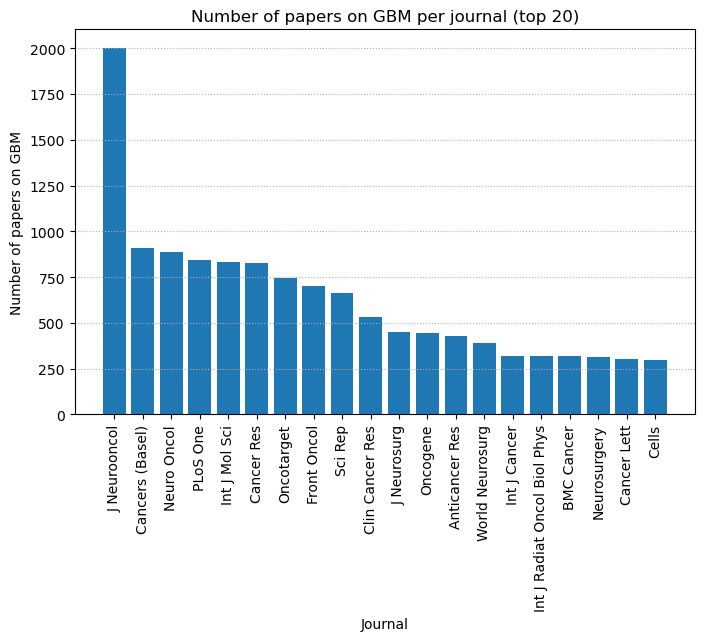

In [623]:
# Show the top 20 users in a bar plot with Matplotlib.
top_n = 20
# Create the bars on the plot
plt.bar(x=range(top_n), height = df_journals[0:top_n]['counts']) # start off with the xticks as numbers 0:19

# Change the xticks to the correct user ids
plt.xticks(range(top_n), df_journals['Journal'][0:top_n], 
           rotation=90)
# Set up the x, y labels, titles, and linestyles etc.
plt.ylabel("Number of papers on GBM")
plt.xlabel("Journal")
plt.title("Number of papers on GBM per journal (top 20)")
plt.gca().yaxis.grid(linestyle=':')

# LDA model

     1. Load stopwords
     2. Build Dictionary and Corpus
     3. Train LDA

### 1. Load stopwords

In [437]:
#load stopwords from library
import nltk
nltk.download('stopwords', force=False, quiet=True)
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'too', 'for', 'more', 'at', 'than', 'as', "won't", 'do', 'by', 'most', 'itself', 'didn', 'through', "hasn't", 'has', 'mightn', 'won', "it's", 'of', 'further', 'only', 'had', 'his', 'ma', 'between', 'and', 'be', 'their', 'yours', 'few', 'are', 'aren', 'theirs', 'other', 'is', "you're", 'or', 'wouldn', 'over', 'o', 'while', 'before', 'there', 'so', 'couldn', 'until', 'doesn', 'weren', 'some', 'an', 'them', 'wasn', 'here', 'y', 'whom', 'i', 'nor', 'very', 'not', "haven't", 'any', 'its', 'herself', 'where', "that'll", 'after', 'why', 'to', "she's", 'no', "don't", 'during', "wouldn't", 'when', 'my', "mustn't", 'ain', 'haven', 'can', 'myself', 'because', 'against', 'having', 'ourselves', 'off', 'then', 'she', "needn't", 'did', 'have', 'they', 'if', 'doing', 'himself', 'which', 'we', 'themselves', 'but', "wasn't", 'it', "doesn't", 've', 'yourselves', 'now', 't', 'how', 'out', 'what', "you'd", "shouldn't", 'were', 'does', 'just', 'with', 'will', "aren't", 'isn', 'both', 'mustn', 'your', 'abov

In [438]:
#create my own 'stopwords' with common words on the subject
stopwords2 = {'gbm','gbms', 'GBM','GBMs', 'glioma', 'gliomas', 'tumor','tumour', 'tumors','tumours', 'cancer','cancers', 'glioblastoma', 'glioblastomas', 'Glioblastoma', 'Glioblastomas', 'malignancy', 'positive'}

In [439]:
#combine the two stopwords sets
stopwords3 = stopwords2.union(stopwords)
stopwords3

{'GBM',
 'GBMs',
 'Glioblastoma',
 'Glioblastomas',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'cancer',
 'cancers',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'gbm',
 'gbms',
 'glioblastoma',
 'glioblastomas',
 'glioma',
 'gliomas',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'malignancy',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',


### 2. Build dictionary and create corpus:

In [440]:
# tokenize words from the abstracts, excluding stopwords
def tokenize(text, stopwords):
    import gensim
    return [token for token in gensim.utils.simple_preprocess(text) if text not in (stopwords3)]
tokens = df_new['Abstract_text'].apply(tokenize, stopwords=stopwords3)

In [443]:
# build dictionary
import numpy as np, os
import gensim
file_name = 'gensim_lda.model_new3'
if (not os.path.isfile(file_name)): 
    dictionary_new3 = gensim.corpora.Dictionary(tokens)
    print(f"Found {len(dictionary_new3)} unique tokens")
    dictionary_new3.filter_extremes(no_below=3, no_above=0.1, keep_n=400000)
    dictionary_new3.compactify()
    dictionary_new3.save(file_name + '.dictionary')
else:
    dictionary_new3 = gensim.corpora.Dictionary.load(file_name + '.dictionary')
print(f"Retained {len(dictionary_new3)} unique tokens")
print(f'Number of documents: {dictionary_new3.num_docs}')

2024-07-07 12:54:40,724 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-07-07 12:54:42,415 : INFO : adding document #10000 to Dictionary<31661 unique tokens: ['across', 'adaptation', 'adaptive', 'adapts', 'alterations']...>
2024-07-07 12:54:43,851 : INFO : adding document #20000 to Dictionary<43996 unique tokens: ['across', 'adaptation', 'adaptive', 'adapts', 'alterations']...>
2024-07-07 12:54:45,222 : INFO : adding document #30000 to Dictionary<52266 unique tokens: ['across', 'adaptation', 'adaptive', 'adapts', 'alterations']...>
2024-07-07 12:54:46,518 : INFO : adding document #40000 to Dictionary<59650 unique tokens: ['across', 'adaptation', 'adaptive', 'adapts', 'alterations']...>
2024-07-07 12:54:47,441 : INFO : built Dictionary<62965 unique tokens: ['across', 'adaptation', 'adaptive', 'adapts', 'alterations']...> from 46677 documents (total 9658800 corpus positions)
2024-07-07 12:54:47,442 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<62965 un

Found 62965 unique tokens
Retained 28080 unique tokens
Number of documents: 46677


In [448]:
#create corpus
corpus = tokens.apply(dictionary_new3.doc2bow)

### 3. Train LDA

In [ ]:
file_name = 'gensim_lda.model_new4'
if (not os.path.isfile(file_name)): # 
    import logging
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    lda_model = gensim.models.LdaModel(corpus,  
        num_topics= 25, id2word=dictionary_new3,
        random_state=42,passes=35)
    lda_model.save(file_name)
else:
    lda_model = gensim.models.LdaModel.load(file_name)

2024-07-07 13:36:39,467 : INFO : topic #19 (0.040): 0.014*"invasion" + 0.011*"contrast" + 0.010*"migration" + 0.010*"flair" + 0.010*"mri" + 0.007*"signal" + 0.006*"si" + 0.006*"igf" + 0.006*"rs" + 0.005*"src"
2024-07-07 13:36:39,470 : INFO : topic diff=0.268273, rho=0.408248
2024-07-07 13:36:39,474 : INFO : PROGRESS: pass 0, at document #14000/46677
2024-07-07 13:36:40,552 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:36:40,584 : INFO : topic #7 (0.040): 0.024*"bevacizumab" + 0.020*"car" + 0.018*"ttfields" + 0.010*"trials" + 0.009*"recurrent" + 0.008*"antigen" + 0.007*"bev" + 0.007*"solid" + 0.007*"vascular" + 0.006*"vegf"
2024-07-07 13:36:40,586 : INFO : topic #11 (0.040): 0.049*"gscs" + 0.027*"gsc" + 0.027*"tumour" + 0.022*"stat" + 0.020*"mesenchymal" + 0.013*"exosomes" + 0.009*"subtype" + 0.008*"subtypes" + 0.008*"tme" + 0.008*"transition"
2024-07-07 13:36:40,587 : INFO : topic #1 (0.040): 0.014*"mri" + 0.014*"features" + 0.009*"models" +

2024-07-07 13:36:46,947 : INFO : topic #9 (0.040): 0.079*"mir" + 0.015*"invasion" + 0.015*"tissues" + 0.013*"migration" + 0.012*"assay" + 0.011*"overexpression" + 0.010*"pcr" + 0.009*"mirna" + 0.009*"western" + 0.009*"mirnas"
2024-07-07 13:36:46,949 : INFO : topic diff=0.181515, rho=0.288675
2024-07-07 13:36:46,952 : INFO : PROGRESS: pass 0, at document #26000/46677
2024-07-07 13:36:47,987 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:36:48,021 : INFO : topic #1 (0.040): 0.018*"mri" + 0.010*"contrast" + 0.010*"features" + 0.009*"mr" + 0.008*"method" + 0.008*"diffusion" + 0.008*"images" + 0.007*"parameters" + 0.006*"resonance" + 0.006*"magnetic"
2024-07-07 13:36:48,022 : INFO : topic #8 (0.040): 0.030*"dose" + 0.020*"irradiation" + 0.011*"ovarian" + 0.010*"gy" + 0.010*"doses" + 0.010*"ion" + 0.009*"plga" + 0.008*"irradiated" + 0.008*"drugs" + 0.008*"channels"
2024-07-07 13:36:48,030 : INFO : topic #17 (0.040): 0.016*"gb" + 0.010*"compounds" +

2024-07-07 13:36:54,759 : INFO : topic diff=0.141936, rho=0.235702
2024-07-07 13:36:54,761 : INFO : PROGRESS: pass 0, at document #38000/46677
2024-07-07 13:36:56,207 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:36:56,238 : INFO : topic #3 (0.040): 0.011*"therapies" + 0.011*"will" + 0.010*"trials" + 0.010*"current" + 0.009*"recent" + 0.008*"agents" + 0.008*"despite" + 0.007*"strategies" + 0.006*"use" + 0.006*"approaches"
2024-07-07 13:36:56,239 : INFO : topic #0 (0.040): 0.024*"astrocytomas" + 0.020*"glioblastomas" + 0.019*"astrocytoma" + 0.017*"mutations" + 0.017*"anaplastic" + 0.014*"cases" + 0.013*"pten" + 0.012*"mutation" + 0.011*"idh" + 0.011*"genetic"
2024-07-07 13:36:56,242 : INFO : topic #7 (0.040): 0.043*"il" + 0.042*"vegf" + 0.032*"endothelial" + 0.024*"vascular" + 0.022*"bevacizumab" + 0.021*"angiogenesis" + 0.015*"recurrent" + 0.015*"angiogenic" + 0.012*"phase" + 0.010*"antibody"
2024-07-07 13:36:56,243 : INFO : topic #8 (0.040)

2024-07-07 13:37:03,474 : INFO : topic #10 (0.040): 0.007*"heterogeneity" + 0.006*"models" + 0.005*"changes" + 0.005*"heterozygosity" + 0.004*"genetic" + 0.004*"approach" + 0.004*"single" + 0.004*"within" + 0.004*"genomic" + 0.004*"types"
2024-07-07 13:37:03,479 : INFO : topic diff=0.122838, rho=0.204124
2024-07-07 13:37:03,490 : INFO : PROGRESS: pass 1, at document #2000/46677
2024-07-07 13:37:04,475 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:37:04,503 : INFO : topic #17 (0.040): 0.016*"gb" + 0.012*"line" + 0.011*"concentrations" + 0.010*"assay" + 0.009*"ml" + 0.009*"concentration" + 0.008*"death" + 0.008*"cytotoxic" + 0.008*"plasma" + 0.007*"dependent"
2024-07-07 13:37:04,504 : INFO : topic #15 (0.040): 0.031*"tmz" + 0.025*"mice" + 0.011*"ifn" + 0.009*"days" + 0.007*"animals" + 0.007*"resistant" + 0.007*"nude" + 0.007*"xenografts" + 0.007*"combined" + 0.007*"models"
2024-07-07 13:37:04,505 : INFO : topic #23 (0.040): 0.014*"cases" + 0.0

2024-07-07 13:37:08,675 : INFO : topic #16 (0.040): 0.059*"pet" + 0.055*"hypoxia" + 0.028*"uptake" + 0.025*"met" + 0.024*"hypoxic" + 0.019*"ct" + 0.014*"fet" + 0.013*"tomography" + 0.013*"hif" + 0.012*"fdg"
2024-07-07 13:37:08,686 : INFO : topic diff=0.073604, rho=0.198660
2024-07-07 13:37:08,688 : INFO : PROGRESS: pass 1, at document #14000/46677
2024-07-07 13:37:09,447 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:37:09,474 : INFO : topic #3 (0.040): 0.011*"therapies" + 0.010*"current" + 0.008*"strategies" + 0.008*"trials" + 0.007*"recent" + 0.007*"despite" + 0.007*"research" + 0.007*"treatments" + 0.006*"will" + 0.006*"approaches"
2024-07-07 13:37:09,475 : INFO : topic #20 (0.040): 0.014*"activation" + 0.013*"kinase" + 0.010*"akt" + 0.009*"migration" + 0.009*"pi" + 0.008*"mediated" + 0.008*"inhibitor" + 0.008*"pathways" + 0.007*"invasion" + 0.006*"nf"
2024-07-07 13:37:09,477 : INFO : topic #9 (0.040): 0.056*"mir" + 0.018*"invasion" + 0.01

2024-07-07 13:37:14,733 : INFO : topic #23 (0.040): 0.013*"case" + 0.013*"diagnosis" + 0.012*"resection" + 0.011*"cases" + 0.009*"surgery" + 0.009*"year" + 0.008*"years" + 0.007*"surgical" + 0.006*"old" + 0.006*"report"
2024-07-07 13:37:14,735 : INFO : topic diff=0.056883, rho=0.198660
2024-07-07 13:37:14,737 : INFO : PROGRESS: pass 1, at document #26000/46677
2024-07-07 13:37:15,457 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:37:15,486 : INFO : topic #12 (0.040): 0.085*"cd" + 0.046*"immune" + 0.027*"pd" + 0.020*"macrophages" + 0.016*"microglia" + 0.013*"cxcr" + 0.009*"immunotherapy" + 0.009*"inflammatory" + 0.009*"infiltration" + 0.009*"positive"
2024-07-07 13:37:15,487 : INFO : topic #18 (0.040): 0.018*"os" + 0.014*"pfs" + 0.014*"group" + 0.013*"resection" + 0.012*"ci" + 0.011*"rt" + 0.010*"recurrent" + 0.010*"diagnosed" + 0.009*"free" + 0.008*"vs"
2024-07-07 13:37:15,488 : INFO : topic #1 (0.040): 0.022*"mri" + 0.011*"contrast" + 0.010*

2024-07-07 13:37:19,377 : INFO : topic #7 (0.040): 0.045*"il" + 0.045*"vegf" + 0.039*"endothelial" + 0.034*"bevacizumab" + 0.033*"angiogenesis" + 0.030*"vascular" + 0.021*"angiogenic" + 0.014*"recurrent" + 0.013*"antiangiogenic" + 0.011*"antibody"
2024-07-07 13:37:19,379 : INFO : topic diff=0.075542, rho=0.198660
2024-07-07 13:37:19,382 : INFO : PROGRESS: pass 1, at document #38000/46677
2024-07-07 13:37:20,136 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:37:20,164 : INFO : topic #16 (0.040): 0.062*"hypoxia" + 0.053*"pet" + 0.041*"uptake" + 0.035*"met" + 0.029*"hif" + 0.026*"hypoxic" + 0.021*"ct" + 0.017*"fdg" + 0.016*"pilocytic" + 0.016*"tomography"
2024-07-07 13:37:20,165 : INFO : topic #4 (0.040): 0.018*"breast" + 0.015*"compounds" + 0.011*"against" + 0.011*"igfbp" + 0.009*"mda" + 0.008*"mb" + 0.008*"neuroblastoma" + 0.007*"lung" + 0.007*"compound" + 0.006*"timp"
2024-07-07 13:37:20,167 : INFO : topic #8 (0.040): 0.058*"dose" + 0.042*"ir

2024-07-07 13:37:25,064 : INFO : topic #9 (0.040): 0.040*"mir" + 0.028*"mrna" + 0.017*"pcr" + 0.017*"invasion" + 0.016*"tissues" + 0.015*"mmp" + 0.013*"assay" + 0.013*"migration" + 0.012*"rna" + 0.012*"western"
2024-07-07 13:37:25,065 : INFO : topic #7 (0.040): 0.077*"il" + 0.045*"endothelial" + 0.044*"vegf" + 0.032*"vascular" + 0.029*"angiogenesis" + 0.023*"bevacizumab" + 0.015*"angiogenic" + 0.015*"antibody" + 0.013*"car" + 0.011*"vessels"
2024-07-07 13:37:25,068 : INFO : topic diff=0.085949, rho=0.198660
2024-07-07 13:37:25,070 : INFO : PROGRESS: pass 2, at document #2000/46677
2024-07-07 13:37:25,792 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:37:25,820 : INFO : topic #19 (0.040): 0.014*"contrast" + 0.013*"igf" + 0.013*"edema" + 0.012*"fluorescence" + 0.012*"enhancement" + 0.011*"areas" + 0.010*"cm" + 0.009*"peritumoral" + 0.008*"within" + 0.008*"area"
2024-07-07 13:37:25,821 : INFO : topic #14 (0.040): 0.076*"egfr" + 0.022*"egfrviii" 

2024-07-07 13:37:29,610 : INFO : topic #21 (0.040): 0.036*"mgmt" + 0.035*"prognostic" + 0.030*"methylation" + 0.023*"risk" + 0.020*"os" + 0.019*"status" + 0.017*"promoter" + 0.015*"cox" + 0.013*"factors" + 0.012*"regression"
2024-07-07 13:37:29,612 : INFO : topic #18 (0.040): 0.014*"os" + 0.014*"resection" + 0.014*"group" + 0.013*"recurrent" + 0.012*"pfs" + 0.011*"ci" + 0.011*"rt" + 0.010*"diagnosed" + 0.008*"surgery" + 0.008*"free"
2024-07-07 13:37:29,615 : INFO : topic diff=0.042047, rho=0.194852
2024-07-07 13:37:29,617 : INFO : PROGRESS: pass 2, at document #14000/46677
2024-07-07 13:37:30,335 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:37:30,363 : INFO : topic #23 (0.040): 0.015*"case" + 0.014*"diagnosis" + 0.013*"cases" + 0.010*"year" + 0.010*"resection" + 0.009*"years" + 0.008*"surgery" + 0.007*"old" + 0.006*"surgical" + 0.006*"report"
2024-07-07 13:37:30,364 : INFO : topic #10 (0.040): 0.011*"heterogeneity" + 0.009*"models" + 0.006*

2024-07-07 13:37:35,275 : INFO : topic #24 (0.040): 0.026*"stress" + 0.026*"mitochondrial" + 0.022*"ros" + 0.017*"oxygen" + 0.017*"tgf" + 0.016*"notch" + 0.015*"oxidative" + 0.014*"reactive" + 0.012*"astrocytes" + 0.012*"species"
2024-07-07 13:37:35,276 : INFO : topic #10 (0.040): 0.009*"heterogeneity" + 0.008*"models" + 0.006*"single" + 0.006*"approach" + 0.005*"changes" + 0.005*"within" + 0.005*"method" + 0.005*"epigenetic" + 0.004*"genetic" + 0.004*"number"
2024-07-07 13:37:35,277 : INFO : topic diff=0.033568, rho=0.194852
2024-07-07 13:37:35,280 : INFO : PROGRESS: pass 2, at document #26000/46677
2024-07-07 13:37:35,982 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:37:36,012 : INFO : topic #22 (0.040): 0.022*"delivery" + 0.014*"nanoparticles" + 0.013*"blood" + 0.012*"bbb" + 0.011*"barrier" + 0.009*"peptide" + 0.008*"nps" + 0.008*"targeted" + 0.007*"uptake" + 0.007*"loaded"
2024-07-07 13:37:36,013 : INFO : topic #9 (0.040): 0.071*"mir" + 

2024-07-07 13:37:39,805 : INFO : topic #17 (0.040): 0.015*"caspase" + 0.012*"assay" + 0.012*"death" + 0.011*"gb" + 0.010*"concentrations" + 0.010*"apoptotic" + 0.010*"line" + 0.009*"concentration" + 0.008*"dependent" + 0.008*"cycle"
2024-07-07 13:37:39,807 : INFO : topic #18 (0.040): 0.014*"group" + 0.013*"recurrent" + 0.013*"rt" + 0.011*"resection" + 0.010*"pfs" + 0.010*"diagnosed" + 0.009*"os" + 0.009*"received" + 0.009*"dose" + 0.009*"weeks"
2024-07-07 13:37:39,809 : INFO : topic diff=0.060069, rho=0.194852
2024-07-07 13:37:39,811 : INFO : PROGRESS: pass 2, at document #38000/46677
2024-07-07 13:37:40,533 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:37:40,561 : INFO : topic #6 (0.040): 0.024*"virus" + 0.019*"ca" + 0.018*"trail" + 0.016*"ad" + 0.016*"viral" + 0.015*"infection" + 0.014*"vector" + 0.013*"vectors" + 0.012*"hsv" + 0.012*"replication"
2024-07-07 13:37:40,562 : INFO : topic #14 (0.040): 0.106*"egfr" + 0.035*"egfrviii" + 0.022*"

2024-07-07 13:37:45,311 : INFO : topic #3 (0.040): 0.011*"therapies" + 0.010*"current" + 0.010*"trials" + 0.008*"will" + 0.008*"use" + 0.008*"recent" + 0.008*"strategies" + 0.007*"despite" + 0.006*"research" + 0.006*"approaches"
2024-07-07 13:37:45,313 : INFO : topic #7 (0.040): 0.076*"il" + 0.049*"endothelial" + 0.047*"vegf" + 0.035*"vascular" + 0.033*"angiogenesis" + 0.024*"bevacizumab" + 0.017*"angiogenic" + 0.016*"antibody" + 0.014*"vessels" + 0.014*"car"
2024-07-07 13:37:45,314 : INFO : topic #4 (0.040): 0.020*"compounds" + 0.019*"breast" + 0.016*"against" + 0.011*"lung" + 0.010*"prostate" + 0.009*"carcinoma" + 0.009*"colon" + 0.009*"compound" + 0.008*"neuroblastoma" + 0.007*"kd"
2024-07-07 13:37:45,316 : INFO : topic diff=0.073725, rho=0.194852
2024-07-07 13:37:45,319 : INFO : PROGRESS: pass 3, at document #2000/46677
2024-07-07 13:37:45,988 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:37:46,016 : INFO : topic #8 (0.040): 0.060*"dose"

2024-07-07 13:37:49,661 : INFO : topic #8 (0.040): 0.055*"dose" + 0.037*"irradiation" + 0.028*"gy" + 0.015*"doses" + 0.013*"irradiated" + 0.010*"boron" + 0.010*"bnct" + 0.009*"volume" + 0.008*"planning" + 0.008*"plans"
2024-07-07 13:37:49,662 : INFO : topic #13 (0.040): 0.020*"migration" + 0.019*"invasion" + 0.018*"alpha" + 0.015*"binding" + 0.014*"matrix" + 0.012*"adhesion" + 0.011*"extracellular" + 0.010*"culture" + 0.010*"ecm" + 0.010*"spheroids"
2024-07-07 13:37:49,664 : INFO : topic #14 (0.040): 0.080*"egfr" + 0.031*"metabolic" + 0.028*"metabolism" + 0.026*"egfrviii" + 0.016*"glucose" + 0.015*"epidermal" + 0.014*"acid" + 0.011*"glycolysis" + 0.009*"glutamate" + 0.008*"fatty"
2024-07-07 13:37:49,666 : INFO : topic diff=0.032758, rho=0.191255
2024-07-07 13:37:49,668 : INFO : PROGRESS: pass 3, at document #14000/46677
2024-07-07 13:37:50,371 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:37:50,399 : INFO : topic #14 (0.040): 0.081*"egfr" + 

2024-07-07 13:37:55,210 : INFO : topic #7 (0.040): 0.046*"bevacizumab" + 0.037*"endothelial" + 0.035*"vegf" + 0.034*"il" + 0.032*"angiogenesis" + 0.031*"vascular" + 0.021*"car" + 0.020*"bev" + 0.019*"angiogenic" + 0.018*"ttfields"
2024-07-07 13:37:55,211 : INFO : topic #10 (0.040): 0.009*"heterogeneity" + 0.008*"models" + 0.007*"approach" + 0.006*"single" + 0.006*"changes" + 0.005*"method" + 0.005*"within" + 0.004*"number" + 0.004*"genetic" + 0.004*"epigenetic"
2024-07-07 13:37:55,213 : INFO : topic #14 (0.040): 0.079*"egfr" + 0.032*"egfrviii" + 0.031*"metabolic" + 0.024*"metabolism" + 0.021*"glucose" + 0.015*"epidermal" + 0.012*"glycolysis" + 0.011*"acid" + 0.010*"lactate" + 0.009*"glutamate"
2024-07-07 13:37:55,215 : INFO : topic diff=0.025589, rho=0.191255
2024-07-07 13:37:55,217 : INFO : PROGRESS: pass 3, at document #26000/46677
2024-07-07 13:37:55,895 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:37:55,924 : INFO : topic #24 (0.040): 0

2024-07-07 13:37:59,633 : INFO : topic #13 (0.040): 0.025*"alpha" + 0.022*"invasion" + 0.021*"migration" + 0.016*"binding" + 0.016*"integrin" + 0.012*"matrix" + 0.011*"beta" + 0.011*"adhesion" + 0.010*"invasive" + 0.010*"extracellular"
2024-07-07 13:37:59,634 : INFO : topic #8 (0.040): 0.062*"dose" + 0.042*"irradiation" + 0.034*"gy" + 0.015*"doses" + 0.013*"irradiated" + 0.011*"bnct" + 0.010*"boron" + 0.010*"volume" + 0.010*"survivin" + 0.009*"ovarian"
2024-07-07 13:37:59,635 : INFO : topic #10 (0.040): 0.007*"approach" + 0.007*"models" + 0.006*"number" + 0.006*"changes" + 0.006*"method" + 0.006*"within" + 0.006*"heterogeneity" + 0.006*"single" + 0.005*"genetic" + 0.004*"large"
2024-07-07 13:37:59,637 : INFO : topic diff=0.054836, rho=0.191255
2024-07-07 13:37:59,640 : INFO : PROGRESS: pass 3, at document #38000/46677
2024-07-07 13:38:00,347 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:38:00,375 : INFO : topic #18 (0.040): 0.015*"group" + 0

2024-07-07 13:38:05,070 : INFO : topic #16 (0.040): 0.054*"pet" + 0.052*"hypoxia" + 0.041*"uptake" + 0.039*"met" + 0.032*"ct" + 0.027*"hif" + 0.021*"hypoxic" + 0.020*"fdg" + 0.019*"tomography" + 0.018*"pilocytic"
2024-07-07 13:38:05,071 : INFO : topic #8 (0.040): 0.062*"dose" + 0.042*"irradiation" + 0.039*"gy" + 0.017*"doses" + 0.013*"irradiated" + 0.012*"boron" + 0.011*"volume" + 0.011*"beam" + 0.010*"neutron" + 0.010*"infusion"
2024-07-07 13:38:05,072 : INFO : topic #11 (0.040): 0.091*"tumour" + 0.048*"tumours" + 0.034*"gscs" + 0.029*"egf" + 0.022*"like" + 0.021*"differentiation" + 0.017*"gsc" + 0.013*"self" + 0.012*"mesenchymal" + 0.012*"neural"
2024-07-07 13:38:05,073 : INFO : topic #19 (0.040): 0.016*"resection" + 0.015*"igf" + 0.014*"fluorescence" + 0.012*"edema" + 0.011*"areas" + 0.011*"necrosis" + 0.010*"ala" + 0.010*"cm" + 0.009*"surgical" + 0.009*"contrast"
2024-07-07 13:38:05,075 : INFO : topic diff=0.068447, rho=0.191255
2024-07-07 13:38:05,078 : INFO : PROGRESS: pass 4, at

2024-07-07 13:38:09,351 : INFO : topic #3 (0.040): 0.012*"therapies" + 0.011*"current" + 0.009*"strategies" + 0.008*"trials" + 0.008*"recent" + 0.007*"research" + 0.007*"despite" + 0.007*"treatments" + 0.006*"approaches" + 0.006*"standard"
2024-07-07 13:38:09,352 : INFO : topic #9 (0.040): 0.048*"mir" + 0.022*"invasion" + 0.020*"migration" + 0.016*"assay" + 0.014*"mrna" + 0.013*"tissues" + 0.012*"western" + 0.012*"assays" + 0.012*"pcr" + 0.012*"overexpression"
2024-07-07 13:38:09,353 : INFO : topic #4 (0.040): 0.028*"compounds" + 0.020*"against" + 0.014*"breast" + 0.013*"compound" + 0.011*"anticancer" + 0.009*"ic" + 0.008*"prostate" + 0.008*"lung" + 0.008*"curcumin" + 0.008*"properties"
2024-07-07 13:38:09,355 : INFO : topic diff=0.028819, rho=0.187850
2024-07-07 13:38:09,357 : INFO : PROGRESS: pass 4, at document #14000/46677
2024-07-07 13:38:10,057 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:38:10,085 : INFO : topic #11 (0.040): 0.063*"t

2024-07-07 13:38:14,850 : INFO : topic #1 (0.040): 0.026*"mri" + 0.014*"contrast" + 0.010*"features" + 0.010*"volume" + 0.010*"mr" + 0.009*"images" + 0.008*"magnetic" + 0.008*"values" + 0.008*"resonance" + 0.008*"diffusion"
2024-07-07 13:38:14,851 : INFO : topic #24 (0.040): 0.027*"stress" + 0.026*"mitochondrial" + 0.022*"ros" + 0.017*"oxygen" + 0.017*"tgf" + 0.016*"notch" + 0.016*"oxidative" + 0.015*"reactive" + 0.014*"astrocytes" + 0.013*"species"
2024-07-07 13:38:14,853 : INFO : topic #10 (0.040): 0.009*"heterogeneity" + 0.008*"models" + 0.007*"approach" + 0.006*"single" + 0.006*"method" + 0.006*"changes" + 0.005*"within" + 0.004*"number" + 0.004*"functional" + 0.004*"genetic"
2024-07-07 13:38:14,854 : INFO : topic diff=0.022393, rho=0.187850
2024-07-07 13:38:14,857 : INFO : PROGRESS: pass 4, at document #26000/46677
2024-07-07 13:38:15,527 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:38:15,555 : INFO : topic #13 (0.040): 0.024*"invasion

2024-07-07 13:38:19,259 : INFO : topic #9 (0.040): 0.054*"mir" + 0.021*"invasion" + 0.020*"mmp" + 0.020*"mrna" + 0.017*"pcr" + 0.015*"tissues" + 0.015*"migration" + 0.012*"overexpression" + 0.011*"assay" + 0.011*"western"
2024-07-07 13:38:19,260 : INFO : topic #24 (0.040): 0.024*"beta" + 0.022*"stress" + 0.021*"mitochondrial" + 0.016*"astrocytes" + 0.016*"notch" + 0.016*"ros" + 0.015*"tgf" + 0.014*"oxygen" + 0.012*"production" + 0.012*"reactive"
2024-07-07 13:38:19,262 : INFO : topic #5 (0.040): 0.017*"genome" + 0.015*"samples" + 0.012*"pathways" + 0.012*"proteins" + 0.012*"rna" + 0.011*"identify" + 0.009*"signature" + 0.009*"tcga" + 0.009*"set" + 0.009*"atlas"
2024-07-07 13:38:19,264 : INFO : topic diff=0.051826, rho=0.187850
2024-07-07 13:38:19,266 : INFO : PROGRESS: pass 4, at document #38000/46677
2024-07-07 13:38:19,963 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:38:19,991 : INFO : topic #24 (0.040): 0.031*"beta" + 0.020*"stress" + 0.

2024-07-07 13:38:24,636 : INFO : topic #18 (0.040): 0.016*"group" + 0.015*"recurrent" + 0.012*"weeks" + 0.012*"resection" + 0.010*"rt" + 0.010*"received" + 0.009*"years" + 0.009*"toxicity" + 0.009*"surgery" + 0.009*"dose"
2024-07-07 13:38:24,637 : INFO : topic #7 (0.040): 0.055*"il" + 0.053*"endothelial" + 0.051*"vegf" + 0.039*"vascular" + 0.036*"angiogenesis" + 0.023*"bevacizumab" + 0.019*"angiogenic" + 0.019*"antibody" + 0.017*"vessels" + 0.015*"pdgf"
2024-07-07 13:38:24,638 : INFO : topic #13 (0.040): 0.037*"alpha" + 0.019*"binding" + 0.018*"invasion" + 0.017*"beta" + 0.015*"migration" + 0.012*"adhesion" + 0.011*"matrix" + 0.009*"extracellular" + 0.009*"integrin" + 0.009*"cultures"
2024-07-07 13:38:24,639 : INFO : topic #23 (0.040): 0.017*"cases" + 0.014*"diagnosis" + 0.013*"case" + 0.010*"years" + 0.009*"year" + 0.007*"biopsy" + 0.007*"lesions" + 0.006*"old" + 0.006*"report" + 0.006*"intracranial"
2024-07-07 13:38:24,642 : INFO : topic diff=0.065458, rho=0.187850
2024-07-07 13:38:2

2024-07-07 13:38:28,962 : INFO : topic #21 (0.040): 0.033*"mgmt" + 0.032*"prognostic" + 0.028*"methylation" + 0.024*"os" + 0.022*"risk" + 0.019*"status" + 0.015*"promoter" + 0.015*"age" + 0.014*"cox" + 0.014*"factors"
2024-07-07 13:38:28,963 : INFO : topic #18 (0.040): 0.015*"recurrent" + 0.014*"resection" + 0.013*"group" + 0.012*"rt" + 0.011*"os" + 0.010*"pfs" + 0.010*"diagnosed" + 0.009*"surgery" + 0.009*"received" + 0.008*"ci"
2024-07-07 13:38:28,965 : INFO : topic #17 (0.040): 0.029*"gb" + 0.013*"assay" + 0.011*"evs" + 0.010*"line" + 0.010*"viability" + 0.010*"concentrations" + 0.010*"death" + 0.009*"caspase" + 0.009*"concentration" + 0.009*"plasma"
2024-07-07 13:38:28,966 : INFO : topic #5 (0.040): 0.014*"rna" + 0.014*"genome" + 0.014*"tcga" + 0.013*"samples" + 0.012*"atlas" + 0.011*"signature" + 0.010*"pathways" + 0.010*"network" + 0.009*"identify" + 0.009*"prognostic"
2024-07-07 13:38:28,968 : INFO : topic diff=0.027068, rho=0.184621
2024-07-07 13:38:28,970 : INFO : PROGRESS: pa

2024-07-07 13:38:34,395 : INFO : topic #2 (0.040): 0.090*"autophagy" + 0.030*"carcinoma" + 0.027*"lung" + 0.021*"lgg" + 0.019*"lc" + 0.017*"cancers" + 0.017*"melanoma" + 0.017*"fusion" + 0.016*"breast" + 0.016*"sp"
2024-07-07 13:38:34,396 : INFO : topic #15 (0.040): 0.070*"tmz" + 0.032*"mice" + 0.015*"models" + 0.012*"mouse" + 0.011*"orthotopic" + 0.010*"resistant" + 0.009*"xenograft" + 0.009*"combined" + 0.009*"xenografts" + 0.008*"bearing"
2024-07-07 13:38:34,397 : INFO : topic #14 (0.040): 0.085*"egfr" + 0.033*"egfrviii" + 0.033*"metabolic" + 0.025*"metabolism" + 0.021*"glucose" + 0.016*"epidermal" + 0.013*"glycolysis" + 0.011*"lactate" + 0.010*"acid" + 0.010*"glutamate"
2024-07-07 13:38:34,399 : INFO : topic #23 (0.040): 0.016*"case" + 0.014*"diagnosis" + 0.013*"cases" + 0.009*"year" + 0.009*"years" + 0.007*"old" + 0.007*"lesions" + 0.007*"report" + 0.007*"rare" + 0.006*"surgery"
2024-07-07 13:38:34,400 : INFO : topic diff=0.020678, rho=0.184621
2024-07-07 13:38:34,403 : INFO : PRO

2024-07-07 13:38:38,720 : INFO : topic #12 (0.040): 0.083*"cd" + 0.041*"immune" + 0.037*"il" + 0.015*"pd" + 0.014*"cxcr" + 0.013*"macrophages" + 0.013*"immunotherapy" + 0.012*"antigen" + 0.010*"microglia" + 0.009*"inflammatory"
2024-07-07 13:38:38,721 : INFO : topic #23 (0.040): 0.015*"case" + 0.015*"cases" + 0.014*"diagnosis" + 0.011*"year" + 0.009*"years" + 0.008*"report" + 0.008*"old" + 0.007*"lesions" + 0.007*"rare" + 0.006*"surgery"
2024-07-07 13:38:38,722 : INFO : topic #2 (0.040): 0.060*"autophagy" + 0.037*"carcinoma" + 0.031*"lung" + 0.023*"melanoma" + 0.020*"breast" + 0.020*"sp" + 0.017*"fusion" + 0.017*"cancers" + 0.015*"leukemia" + 0.014*"carcinomas"
2024-07-07 13:38:38,723 : INFO : topic #15 (0.040): 0.045*"tmz" + 0.031*"mice" + 0.012*"models" + 0.011*"xenografts" + 0.010*"days" + 0.009*"mouse" + 0.008*"combined" + 0.008*"agent" + 0.008*"administration" + 0.008*"resistant"
2024-07-07 13:38:38,725 : INFO : topic diff=0.049929, rho=0.184621
2024-07-07 13:38:38,727 : INFO : PR

2024-07-07 13:38:44,059 : INFO : topic #19 (0.040): 0.020*"resection" + 0.015*"igf" + 0.014*"fluorescence" + 0.012*"surgical" + 0.011*"areas" + 0.011*"ala" + 0.011*"edema" + 0.010*"necrosis" + 0.010*"intraoperative" + 0.008*"within"
2024-07-07 13:38:44,060 : INFO : topic #8 (0.040): 0.062*"dose" + 0.041*"irradiation" + 0.040*"gy" + 0.016*"doses" + 0.014*"volume" + 0.013*"cm" + 0.013*"irradiated" + 0.012*"boron" + 0.011*"beam" + 0.010*"infusion"
2024-07-07 13:38:44,062 : INFO : topic #24 (0.040): 0.042*"beta" + 0.024*"tgf" + 0.018*"astrocytes" + 0.017*"stress" + 0.017*"mitochondrial" + 0.015*"glial" + 0.014*"production" + 0.013*"reactive" + 0.012*"ros" + 0.011*"oxygen"
2024-07-07 13:38:44,063 : INFO : topic #6 (0.040): 0.025*"virus" + 0.020*"ca" + 0.018*"viral" + 0.016*"infection" + 0.014*"replication" + 0.012*"vector" + 0.012*"ad" + 0.011*"infected" + 0.011*"trail" + 0.011*"hsv"
2024-07-07 13:38:44,064 : INFO : topic #23 (0.040): 0.017*"cases" + 0.014*"diagnosis" + 0.013*"case" + 0.010

2024-07-07 13:38:48,344 : INFO : topic #8 (0.040): 0.056*"dose" + 0.036*"irradiation" + 0.031*"gy" + 0.018*"cm" + 0.016*"volume" + 0.014*"doses" + 0.012*"irradiated" + 0.010*"boron" + 0.009*"bnct" + 0.009*"planning"
2024-07-07 13:38:48,345 : INFO : topic #17 (0.040): 0.029*"gb" + 0.014*"assay" + 0.011*"evs" + 0.010*"line" + 0.010*"viability" + 0.010*"concentrations" + 0.010*"death" + 0.010*"caspase" + 0.009*"concentration" + 0.009*"apoptotic"
2024-07-07 13:38:48,346 : INFO : topic #3 (0.040): 0.012*"therapies" + 0.011*"current" + 0.009*"strategies" + 0.008*"trials" + 0.008*"recent" + 0.008*"research" + 0.007*"despite" + 0.007*"treatments" + 0.006*"approaches" + 0.006*"will"
2024-07-07 13:38:48,348 : INFO : topic #2 (0.040): 0.074*"autophagy" + 0.031*"ferroptosis" + 0.029*"carcinoma" + 0.028*"lgg" + 0.023*"lung" + 0.019*"fusion" + 0.018*"sp" + 0.016*"lc" + 0.016*"melanoma" + 0.015*"ac"
2024-07-07 13:38:48,356 : INFO : topic #16 (0.040): 0.071*"hypoxia" + 0.063*"pet" + 0.040*"met" + 0.03

2024-07-07 13:38:53,073 : INFO : PROGRESS: pass 6, at document #24000/46677
2024-07-07 13:38:53,745 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:38:53,774 : INFO : topic #21 (0.040): 0.035*"mgmt" + 0.030*"prognostic" + 0.030*"methylation" + 0.024*"os" + 0.020*"status" + 0.018*"risk" + 0.016*"hr" + 0.016*"promoter" + 0.016*"age" + 0.014*"cox"
2024-07-07 13:38:53,775 : INFO : topic #8 (0.040): 0.056*"dose" + 0.038*"irradiation" + 0.030*"gy" + 0.017*"volume" + 0.016*"cm" + 0.015*"doses" + 0.013*"irradiated" + 0.010*"ion" + 0.010*"ovarian" + 0.009*"mm"
2024-07-07 13:38:53,776 : INFO : topic #0 (0.040): 0.039*"idh" + 0.024*"mutations" + 0.021*"mutation" + 0.014*"glioblastomas" + 0.014*"astrocytoma" + 0.014*"cases" + 0.011*"astrocytomas" + 0.010*"mutant" + 0.009*"iii" + 0.009*"genetic"
2024-07-07 13:38:53,777 : INFO : topic #6 (0.040): 0.024*"virus" + 0.020*"ca" + 0.015*"viral" + 0.015*"trail" + 0.015*"oncolytic" + 0.014*"infection" + 0.012*"mscs

2024-07-07 13:38:57,390 : INFO : PROGRESS: pass 6, at document #36000/46677
2024-07-07 13:38:58,099 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:38:58,128 : INFO : topic #11 (0.040): 0.074*"tumour" + 0.036*"gscs" + 0.031*"tumours" + 0.026*"like" + 0.023*"differentiation" + 0.018*"gsc" + 0.016*"neural" + 0.016*"self" + 0.016*"cscs" + 0.015*"cd"
2024-07-07 13:38:58,128 : INFO : topic #2 (0.040): 0.058*"autophagy" + 0.039*"carcinoma" + 0.034*"lung" + 0.030*"breast" + 0.024*"melanoma" + 0.019*"sp" + 0.019*"cancers" + 0.017*"fusion" + 0.015*"leukemia" + 0.014*"carcinomas"
2024-07-07 13:38:58,130 : INFO : topic #13 (0.040): 0.024*"invasion" + 0.023*"alpha" + 0.023*"migration" + 0.017*"binding" + 0.014*"integrin" + 0.012*"matrix" + 0.011*"invasive" + 0.011*"adhesion" + 0.010*"extracellular" + 0.010*"beta"
2024-07-07 13:38:58,131 : INFO : topic #24 (0.040): 0.024*"beta" + 0.022*"stress" + 0.021*"mitochondrial" + 0.016*"ros" + 0.016*"notch" + 0.016*

2024-07-07 13:39:02,803 : INFO : topic diff=0.018593, rho=0.181553
2024-07-07 13:39:03,199 : INFO : -10.027 per-word bound, 1043.5 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:39:03,199 : INFO : PROGRESS: pass 6, at document #46677/46677
2024-07-07 13:39:03,441 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:39:03,470 : INFO : topic #2 (0.040): 0.046*"carcinoma" + 0.041*"autophagy" + 0.034*"lung" + 0.029*"li" + 0.029*"breast" + 0.023*"melanoma" + 0.018*"lgg" + 0.018*"cancers" + 0.018*"sp" + 0.017*"leukemia"
2024-07-07 13:39:03,470 : INFO : topic #11 (0.040): 0.095*"tumour" + 0.052*"tumours" + 0.034*"gscs" + 0.028*"egf" + 0.022*"like" + 0.022*"differentiation" + 0.017*"gsc" + 0.013*"self" + 0.012*"neural" + 0.012*"cd"
2024-07-07 13:39:03,472 : INFO : topic #13 (0.040): 0.035*"alpha" + 0.019*"binding" + 0.018*"invasion" + 0.016*"beta" + 0.015*"migration" + 0.011*"adhesion" + 0.010*"matrix" + 0.010

2024-07-07 13:39:06,991 : INFO : topic diff=0.032927, rho=0.178633
2024-07-07 13:39:06,994 : INFO : PROGRESS: pass 7, at document #12000/46677
2024-07-07 13:39:07,672 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:39:07,700 : INFO : topic #23 (0.040): 0.016*"case" + 0.015*"cases" + 0.015*"diagnosis" + 0.010*"year" + 0.009*"years" + 0.007*"old" + 0.007*"rare" + 0.006*"report" + 0.006*"biopsy" + 0.006*"lesions"
2024-07-07 13:39:07,701 : INFO : topic #17 (0.040): 0.029*"gb" + 0.014*"assay" + 0.011*"evs" + 0.010*"viability" + 0.010*"line" + 0.010*"concentrations" + 0.010*"death" + 0.010*"caspase" + 0.009*"apoptotic" + 0.009*"concentration"
2024-07-07 13:39:07,702 : INFO : topic #21 (0.040): 0.033*"mgmt" + 0.031*"prognostic" + 0.027*"methylation" + 0.024*"os" + 0.021*"risk" + 0.019*"status" + 0.016*"age" + 0.015*"promoter" + 0.014*"cox" + 0.014*"factors"
2024-07-07 13:39:07,703 : INFO : topic #5 (0.040): 0.014*"rna" + 0.014*"genome" + 0.013*"tcga"

2024-07-07 13:39:12,375 : INFO : topic diff=0.023143, rho=0.178633
2024-07-07 13:39:12,378 : INFO : PROGRESS: pass 7, at document #24000/46677
2024-07-07 13:39:13,048 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:39:13,077 : INFO : topic #19 (0.040): 0.030*"resection" + 0.020*"fluorescence" + 0.019*"ala" + 0.016*"surgical" + 0.012*"intraoperative" + 0.012*"surgery" + 0.011*"recurrence" + 0.009*"areas" + 0.009*"guided" + 0.008*"edema"
2024-07-07 13:39:13,078 : INFO : topic #13 (0.040): 0.025*"invasion" + 0.024*"migration" + 0.015*"binding" + 0.013*"matrix" + 0.011*"extracellular" + 0.011*"integrin" + 0.010*"adhesion" + 0.010*"invasive" + 0.009*"culture" + 0.009*"proteins"
2024-07-07 13:39:13,079 : INFO : topic #21 (0.040): 0.034*"mgmt" + 0.030*"prognostic" + 0.029*"methylation" + 0.024*"os" + 0.020*"status" + 0.018*"risk" + 0.016*"hr" + 0.016*"age" + 0.016*"promoter" + 0.014*"cox"
2024-07-07 13:39:13,080 : INFO : topic #18 (0.040): 0.016*"rec

2024-07-07 13:39:16,625 : INFO : topic diff=0.038715, rho=0.178633
2024-07-07 13:39:16,627 : INFO : PROGRESS: pass 7, at document #36000/46677
2024-07-07 13:39:17,317 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:39:17,345 : INFO : topic #5 (0.040): 0.017*"genome" + 0.014*"samples" + 0.012*"pathways" + 0.011*"rna" + 0.011*"identify" + 0.011*"proteins" + 0.010*"signature" + 0.009*"tcga" + 0.009*"set" + 0.009*"atlas"
2024-07-07 13:39:17,346 : INFO : topic #0 (0.040): 0.020*"mutations" + 0.020*"glioblastomas" + 0.020*"idh" + 0.017*"astrocytoma" + 0.017*"astrocytomas" + 0.014*"cases" + 0.014*"mutation" + 0.012*"anaplastic" + 0.010*"genetic" + 0.010*"iii"
2024-07-07 13:39:17,347 : INFO : topic #20 (0.040): 0.019*"activation" + 0.019*"kinase" + 0.014*"akt" + 0.011*"mediated" + 0.010*"inhibitor" + 0.009*"pathways" + 0.009*"phosphorylation" + 0.009*"dependent" + 0.009*"pi" + 0.008*"stat"
2024-07-07 13:39:17,349 : INFO : topic #16 (0.040): 0.080*"hyp

2024-07-07 13:39:22,062 : INFO : topic diff=0.017808, rho=0.178633
2024-07-07 13:39:22,458 : INFO : -10.026 per-word bound, 1042.7 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:39:22,458 : INFO : PROGRESS: pass 7, at document #46677/46677
2024-07-07 13:39:22,698 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:39:22,726 : INFO : topic #23 (0.040): 0.017*"cases" + 0.014*"diagnosis" + 0.013*"case" + 0.010*"years" + 0.010*"year" + 0.007*"lesions" + 0.007*"biopsy" + 0.006*"old" + 0.006*"report" + 0.006*"intracranial"
2024-07-07 13:39:22,727 : INFO : topic #7 (0.040): 0.059*"endothelial" + 0.056*"vegf" + 0.044*"vascular" + 0.041*"angiogenesis" + 0.022*"bevacizumab" + 0.021*"angiogenic" + 0.021*"antibody" + 0.020*"vessels" + 0.019*"pdgf" + 0.017*"car"
2024-07-07 13:39:22,728 : INFO : topic #14 (0.040): 0.101*"egfr" + 0.028*"egfrviii" + 0.023*"epidermal" + 0.020*"metabolic" + 0.017*"metabolism" + 0.014*"

2024-07-07 13:39:26,403 : INFO : topic diff=0.032595, rho=0.175849
2024-07-07 13:39:26,406 : INFO : PROGRESS: pass 8, at document #12000/46677
2024-07-07 13:39:27,077 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:39:27,105 : INFO : topic #14 (0.040): 0.090*"egfr" + 0.034*"metabolic" + 0.029*"metabolism" + 0.028*"egfrviii" + 0.018*"glucose" + 0.017*"epidermal" + 0.012*"acid" + 0.012*"glycolysis" + 0.009*"glutamate" + 0.009*"fatty"
2024-07-07 13:39:27,106 : INFO : topic #18 (0.040): 0.016*"recurrent" + 0.013*"resection" + 0.012*"group" + 0.012*"rt" + 0.010*"os" + 0.010*"pfs" + 0.010*"diagnosed" + 0.009*"surgery" + 0.009*"received" + 0.008*"trial"
2024-07-07 13:39:27,107 : INFO : topic #12 (0.040): 0.068*"immune" + 0.058*"cd" + 0.034*"il" + 0.029*"pd" + 0.022*"macrophages" + 0.019*"immunotherapy" + 0.014*"microglia" + 0.012*"tme" + 0.011*"infiltration" + 0.011*"nk"
2024-07-07 13:39:27,108 : INFO : topic #3 (0.040): 0.012*"therapies" + 0.010*"cu

2024-07-07 13:39:31,897 : INFO : topic #9 (0.040): 0.060*"mir" + 0.023*"invasion" + 0.021*"migration" + 0.015*"tissues" + 0.013*"assay" + 0.012*"mrna" + 0.012*"overexpression" + 0.011*"pcr" + 0.011*"western" + 0.010*"assays"
2024-07-07 13:39:31,900 : INFO : topic diff=0.022474, rho=0.175849
2024-07-07 13:39:31,901 : INFO : PROGRESS: pass 8, at document #24000/46677
2024-07-07 13:39:32,600 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:39:32,656 : INFO : topic #5 (0.040): 0.015*"genome" + 0.014*"rna" + 0.013*"tcga" + 0.013*"samples" + 0.011*"signature" + 0.011*"pathways" + 0.011*"atlas" + 0.009*"network" + 0.009*"identify" + 0.009*"prognostic"
2024-07-07 13:39:32,657 : INFO : topic #10 (0.040): 0.009*"heterogeneity" + 0.008*"models" + 0.007*"approach" + 0.007*"method" + 0.006*"single" + 0.006*"within" + 0.005*"changes" + 0.004*"number" + 0.004*"each" + 0.004*"biological"
2024-07-07 13:39:32,658 : INFO : topic #7 (0.040): 0.043*"endothelial" + 

2024-07-07 13:39:36,195 : INFO : topic #16 (0.040): 0.081*"hypoxia" + 0.071*"pet" + 0.047*"met" + 0.043*"hif" + 0.037*"uptake" + 0.031*"hypoxic" + 0.024*"ct" + 0.017*"fdg" + 0.017*"tomography" + 0.016*"under"
2024-07-07 13:39:36,197 : INFO : topic diff=0.037838, rho=0.175849
2024-07-07 13:39:36,199 : INFO : PROGRESS: pass 8, at document #36000/46677
2024-07-07 13:39:36,882 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:39:36,911 : INFO : topic #6 (0.040): 0.024*"virus" + 0.024*"trail" + 0.023*"ca" + 0.016*"viral" + 0.016*"infection" + 0.016*"ad" + 0.013*"replication" + 0.013*"vector" + 0.012*"vectors" + 0.012*"oncolytic"
2024-07-07 13:39:36,912 : INFO : topic #13 (0.040): 0.025*"invasion" + 0.023*"alpha" + 0.023*"migration" + 0.016*"binding" + 0.014*"integrin" + 0.012*"matrix" + 0.011*"invasive" + 0.011*"adhesion" + 0.010*"extracellular" + 0.010*"beta"
2024-07-07 13:39:36,913 : INFO : topic #3 (0.040): 0.013*"therapies" + 0.011*"current" + 0.

2024-07-07 13:39:41,531 : INFO : topic #16 (0.040): 0.062*"pet" + 0.062*"hypoxia" + 0.045*"met" + 0.044*"uptake" + 0.033*"hif" + 0.031*"ct" + 0.026*"hypoxic" + 0.018*"fdg" + 0.018*"tomography" + 0.015*"under"
2024-07-07 13:39:41,533 : INFO : topic diff=0.017278, rho=0.175849
2024-07-07 13:39:41,928 : INFO : -10.025 per-word bound, 1042.1 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:39:41,929 : INFO : PROGRESS: pass 8, at document #46677/46677
2024-07-07 13:39:42,168 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:39:42,195 : INFO : topic #6 (0.040): 0.026*"virus" + 0.021*"ca" + 0.018*"viral" + 0.017*"infection" + 0.014*"replication" + 0.013*"vector" + 0.012*"ad" + 0.012*"trail" + 0.011*"infected" + 0.011*"hsv"
2024-07-07 13:39:42,196 : INFO : topic #5 (0.040): 0.016*"genome" + 0.014*"samples" + 0.013*"rna" + 0.011*"tcga" + 0.010*"signature" + 0.010*"pathways" + 0.010*"atlas" + 0.010*"identify" +

2024-07-07 13:39:45,743 : INFO : topic #5 (0.040): 0.014*"rna" + 0.013*"genome" + 0.013*"samples" + 0.013*"tcga" + 0.011*"signature" + 0.010*"atlas" + 0.010*"pathways" + 0.009*"network" + 0.009*"prognostic" + 0.009*"identify"
2024-07-07 13:39:45,745 : INFO : topic diff=0.032068, rho=0.173192
2024-07-07 13:39:45,748 : INFO : PROGRESS: pass 9, at document #12000/46677
2024-07-07 13:39:46,422 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:39:46,450 : INFO : topic #6 (0.040): 0.024*"virus" + 0.019*"ca" + 0.017*"oncolytic" + 0.016*"infection" + 0.015*"viral" + 0.011*"ad" + 0.011*"replication" + 0.010*"mscs" + 0.010*"trail" + 0.009*"cas"
2024-07-07 13:39:46,451 : INFO : topic #12 (0.040): 0.068*"immune" + 0.058*"cd" + 0.035*"il" + 0.029*"pd" + 0.022*"macrophages" + 0.019*"immunotherapy" + 0.014*"microglia" + 0.012*"tme" + 0.011*"infiltration" + 0.011*"nk"
2024-07-07 13:39:46,452 : INFO : topic #8 (0.040): 0.056*"dose" + 0.036*"irradiation" + 0.032*

2024-07-07 13:39:51,109 : INFO : topic #9 (0.040): 0.060*"mir" + 0.023*"invasion" + 0.021*"migration" + 0.015*"tissues" + 0.013*"assay" + 0.012*"mrna" + 0.012*"overexpression" + 0.011*"pcr" + 0.011*"western" + 0.010*"assays"
2024-07-07 13:39:51,111 : INFO : topic diff=0.021857, rho=0.173192
2024-07-07 13:39:51,113 : INFO : PROGRESS: pass 9, at document #24000/46677
2024-07-07 13:39:51,781 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:39:51,809 : INFO : topic #15 (0.040): 0.070*"tmz" + 0.032*"mice" + 0.015*"models" + 0.012*"mouse" + 0.011*"orthotopic" + 0.010*"resistant" + 0.009*"xenograft" + 0.009*"xenografts" + 0.009*"combined" + 0.008*"bearing"
2024-07-07 13:39:51,809 : INFO : topic #14 (0.040): 0.089*"egfr" + 0.034*"egfrviii" + 0.034*"metabolic" + 0.026*"metabolism" + 0.022*"glucose" + 0.017*"epidermal" + 0.013*"glycolysis" + 0.011*"lactate" + 0.010*"glutamate" + 0.010*"acid"
2024-07-07 13:39:51,810 : INFO : topic #4 (0.040): 0.026*"compo

2024-07-07 13:39:55,350 : INFO : topic #2 (0.040): 0.067*"autophagy" + 0.042*"breast" + 0.040*"carcinoma" + 0.038*"lung" + 0.025*"melanoma" + 0.024*"cancers" + 0.017*"leukemia" + 0.017*"sp" + 0.015*"fusion" + 0.015*"lc"
2024-07-07 13:39:55,351 : INFO : topic diff=0.037211, rho=0.173192
2024-07-07 13:39:55,354 : INFO : PROGRESS: pass 9, at document #36000/46677
2024-07-07 13:39:56,037 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:39:56,065 : INFO : topic #0 (0.040): 0.020*"mutations" + 0.020*"idh" + 0.020*"glioblastomas" + 0.017*"astrocytoma" + 0.017*"astrocytomas" + 0.014*"cases" + 0.014*"mutation" + 0.012*"anaplastic" + 0.010*"genetic" + 0.010*"iii"
2024-07-07 13:39:56,066 : INFO : topic #14 (0.040): 0.124*"egfr" + 0.045*"egfrviii" + 0.024*"epidermal" + 0.020*"metabolic" + 0.016*"metabolism" + 0.015*"glucose" + 0.011*"mt" + 0.011*"amplification" + 0.010*"erlotinib" + 0.009*"acid"
2024-07-07 13:39:56,067 : INFO : topic #21 (0.040): 0.044*"mg

2024-07-07 13:40:00,731 : INFO : topic #9 (0.040): 0.045*"mir" + 0.022*"mrna" + 0.021*"invasion" + 0.017*"mmp" + 0.016*"migration" + 0.015*"tissues" + 0.015*"pcr" + 0.012*"assay" + 0.012*"overexpression" + 0.011*"rna"
2024-07-07 13:40:00,734 : INFO : topic diff=0.016699, rho=0.173192
2024-07-07 13:40:01,128 : INFO : -10.025 per-word bound, 1041.7 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:40:01,129 : INFO : PROGRESS: pass 9, at document #46677/46677
2024-07-07 13:40:01,363 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:40:01,391 : INFO : topic #0 (0.040): 0.028*"astrocytomas" + 0.021*"glioblastomas" + 0.018*"astrocytoma" + 0.017*"mutations" + 0.016*"anaplastic" + 0.015*"cases" + 0.013*"idh" + 0.011*"mutation" + 0.011*"chromosome" + 0.010*"astrocytic"
2024-07-07 13:40:01,392 : INFO : topic #8 (0.040): 0.062*"dose" + 0.041*"irradiation" + 0.041*"gy" + 0.016*"volume" + 0.016*"cm" + 0.016*"doses"

2024-07-07 13:40:04,915 : INFO : topic #8 (0.040): 0.057*"dose" + 0.037*"irradiation" + 0.034*"gy" + 0.019*"cm" + 0.017*"volume" + 0.014*"doses" + 0.011*"irradiated" + 0.011*"mm" + 0.010*"boron" + 0.009*"planning"
2024-07-07 13:40:04,917 : INFO : topic diff=0.031387, rho=0.170651
2024-07-07 13:40:04,920 : INFO : PROGRESS: pass 10, at document #12000/46677
2024-07-07 13:40:05,603 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:40:05,631 : INFO : topic #7 (0.040): 0.043*"endothelial" + 0.039*"angiogenesis" + 0.037*"car" + 0.036*"vascular" + 0.036*"vegf" + 0.031*"ttfields" + 0.022*"bevacizumab" + 0.019*"angiogenic" + 0.015*"bev" + 0.015*"antibody"
2024-07-07 13:40:05,632 : INFO : topic #13 (0.040): 0.021*"invasion" + 0.021*"migration" + 0.018*"alpha" + 0.015*"binding" + 0.013*"matrix" + 0.012*"extracellular" + 0.012*"adhesion" + 0.009*"proteins" + 0.009*"receptors" + 0.008*"invasive"
2024-07-07 13:40:05,633 : INFO : topic #24 (0.040): 0.025*"mito

2024-07-07 13:40:10,270 : INFO : topic #11 (0.040): 0.059*"tumour" + 0.055*"gscs" + 0.032*"gsc" + 0.027*"like" + 0.022*"tumours" + 0.018*"mesenchymal" + 0.017*"differentiation" + 0.016*"self" + 0.015*"sox" + 0.015*"cscs"
2024-07-07 13:40:10,273 : INFO : topic diff=0.021433, rho=0.170651
2024-07-07 13:40:10,275 : INFO : PROGRESS: pass 10, at document #24000/46677
2024-07-07 13:40:10,945 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:40:10,973 : INFO : topic #1 (0.040): 0.027*"mri" + 0.015*"contrast" + 0.011*"volume" + 0.011*"features" + 0.010*"mr" + 0.009*"images" + 0.009*"magnetic" + 0.008*"resonance" + 0.008*"values" + 0.008*"diffusion"
2024-07-07 13:40:10,974 : INFO : topic #7 (0.040): 0.043*"endothelial" + 0.040*"vegf" + 0.038*"vascular" + 0.038*"angiogenesis" + 0.034*"bevacizumab" + 0.025*"car" + 0.023*"bev" + 0.022*"angiogenic" + 0.022*"ttfields" + 0.015*"antibody"
2024-07-07 13:40:10,976 : INFO : topic #2 (0.040): 0.083*"autophagy" + 0.

2024-07-07 13:40:14,499 : INFO : topic #2 (0.040): 0.066*"autophagy" + 0.043*"breast" + 0.040*"carcinoma" + 0.038*"lung" + 0.025*"melanoma" + 0.025*"cancers" + 0.018*"leukemia" + 0.017*"sp" + 0.015*"types" + 0.015*"fusion"
2024-07-07 13:40:14,503 : INFO : topic diff=0.036653, rho=0.170651
2024-07-07 13:40:14,505 : INFO : PROGRESS: pass 10, at document #36000/46677
2024-07-07 13:40:15,187 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:40:15,215 : INFO : topic #23 (0.040): 0.015*"case" + 0.015*"cases" + 0.014*"diagnosis" + 0.011*"year" + 0.010*"years" + 0.008*"report" + 0.008*"old" + 0.007*"lesions" + 0.007*"rare" + 0.006*"lesion"
2024-07-07 13:40:15,216 : INFO : topic #17 (0.040): 0.016*"caspase" + 0.014*"death" + 0.013*"assay" + 0.013*"gb" + 0.012*"apoptotic" + 0.010*"bcl" + 0.009*"concentrations" + 0.009*"line" + 0.009*"cycle" + 0.009*"dependent"
2024-07-07 13:40:15,217 : INFO : topic #12 (0.040): 0.079*"cd" + 0.055*"il" + 0.041*"immune" + 0

2024-07-07 13:40:19,821 : INFO : topic #11 (0.040): 0.088*"tumour" + 0.042*"tumours" + 0.039*"gscs" + 0.024*"like" + 0.022*"differentiation" + 0.019*"gsc" + 0.017*"egf" + 0.015*"self" + 0.014*"cd" + 0.013*"neural"
2024-07-07 13:40:19,823 : INFO : topic diff=0.016152, rho=0.170651
2024-07-07 13:40:20,210 : INFO : -10.024 per-word bound, 1041.1 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:40:20,210 : INFO : PROGRESS: pass 10, at document #46677/46677
2024-07-07 13:40:20,443 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:40:20,471 : INFO : topic #22 (0.040): 0.019*"delivery" + 0.014*"blood" + 0.013*"bbb" + 0.011*"barrier" + 0.011*"nanoparticles" + 0.008*"uptake" + 0.007*"peptide" + 0.007*"nm" + 0.007*"targeted" + 0.006*"labeled"
2024-07-07 13:40:20,472 : INFO : topic #6 (0.040): 0.026*"virus" + 0.021*"ca" + 0.018*"viral" + 0.017*"infection" + 0.014*"replication" + 0.013*"vector" + 0.013*"ad" + 0.0

2024-07-07 13:40:23,942 : INFO : topic #13 (0.040): 0.020*"invasion" + 0.020*"alpha" + 0.019*"migration" + 0.016*"binding" + 0.012*"matrix" + 0.012*"extracellular" + 0.011*"adhesion" + 0.009*"receptors" + 0.009*"proteins" + 0.009*"beta"
2024-07-07 13:40:23,943 : INFO : topic diff=0.031080, rho=0.168219
2024-07-07 13:40:23,946 : INFO : PROGRESS: pass 11, at document #12000/46677
2024-07-07 13:40:24,613 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:40:24,641 : INFO : topic #21 (0.040): 0.032*"mgmt" + 0.030*"prognostic" + 0.027*"methylation" + 0.025*"os" + 0.020*"risk" + 0.019*"status" + 0.016*"age" + 0.015*"promoter" + 0.014*"factors" + 0.014*"ci"
2024-07-07 13:40:24,642 : INFO : topic #14 (0.040): 0.092*"egfr" + 0.034*"metabolic" + 0.029*"egfrviii" + 0.029*"metabolism" + 0.018*"glucose" + 0.018*"epidermal" + 0.012*"glycolysis" + 0.012*"acid" + 0.010*"glutamate" + 0.009*"fatty"
2024-07-07 13:40:24,644 : INFO : topic #6 (0.040): 0.024*"virus" +

2024-07-07 13:40:29,357 : INFO : topic #10 (0.040): 0.009*"heterogeneity" + 0.009*"models" + 0.007*"approach" + 0.007*"method" + 0.006*"single" + 0.006*"within" + 0.005*"changes" + 0.004*"number" + 0.004*"each" + 0.004*"biological"
2024-07-07 13:40:29,359 : INFO : topic diff=0.020991, rho=0.168219
2024-07-07 13:40:29,361 : INFO : PROGRESS: pass 11, at document #24000/46677
2024-07-07 13:40:30,025 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:40:30,053 : INFO : topic #15 (0.040): 0.070*"tmz" + 0.032*"mice" + 0.015*"models" + 0.012*"mouse" + 0.011*"orthotopic" + 0.010*"resistant" + 0.009*"xenograft" + 0.009*"xenografts" + 0.009*"combined" + 0.008*"days"
2024-07-07 13:40:30,054 : INFO : topic #8 (0.040): 0.056*"dose" + 0.038*"irradiation" + 0.031*"gy" + 0.019*"cm" + 0.019*"volume" + 0.014*"doses" + 0.013*"irradiated" + 0.011*"mm" + 0.010*"ion" + 0.010*"ovarian"
2024-07-07 13:40:30,055 : INFO : topic #16 (0.040): 0.075*"hypoxia" + 0.075*"pet" + 

2024-07-07 13:40:33,569 : INFO : topic diff=0.036452, rho=0.168219
2024-07-07 13:40:33,571 : INFO : PROGRESS: pass 11, at document #36000/46677
2024-07-07 13:40:34,251 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:40:34,279 : INFO : topic #8 (0.040): 0.062*"dose" + 0.041*"irradiation" + 0.037*"gy" + 0.016*"volume" + 0.014*"doses" + 0.014*"cm" + 0.013*"irradiated" + 0.011*"bnct" + 0.010*"mm" + 0.010*"boron"
2024-07-07 13:40:34,280 : INFO : topic #9 (0.040): 0.054*"mir" + 0.022*"invasion" + 0.019*"mmp" + 0.019*"mrna" + 0.016*"pcr" + 0.016*"migration" + 0.015*"tissues" + 0.012*"overexpression" + 0.011*"mirnas" + 0.011*"assay"
2024-07-07 13:40:34,281 : INFO : topic #20 (0.040): 0.019*"activation" + 0.019*"kinase" + 0.014*"akt" + 0.011*"mediated" + 0.010*"inhibitor" + 0.009*"pathways" + 0.009*"pi" + 0.009*"phosphorylation" + 0.009*"dependent" + 0.008*"stat"
2024-07-07 13:40:34,282 : INFO : topic #4 (0.040): 0.023*"compounds" + 0.022*"against" + 0

2024-07-07 13:40:38,939 : INFO : topic diff=0.015747, rho=0.168219
2024-07-07 13:40:39,327 : INFO : -10.023 per-word bound, 1040.6 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:40:39,327 : INFO : PROGRESS: pass 11, at document #46677/46677
2024-07-07 13:40:39,564 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:40:39,593 : INFO : topic #15 (0.040): 0.037*"tmz" + 0.033*"mice" + 0.013*"ifn" + 0.012*"days" + 0.010*"models" + 0.010*"nude" + 0.010*"xenografts" + 0.009*"mouse" + 0.009*"animals" + 0.008*"rats"
2024-07-07 13:40:39,594 : INFO : topic #22 (0.040): 0.019*"delivery" + 0.015*"blood" + 0.013*"bbb" + 0.011*"barrier" + 0.011*"nanoparticles" + 0.008*"uptake" + 0.007*"peptide" + 0.007*"nm" + 0.007*"targeted" + 0.006*"labeled"
2024-07-07 13:40:39,595 : INFO : topic #6 (0.040): 0.026*"virus" + 0.021*"ca" + 0.019*"viral" + 0.017*"infection" + 0.014*"replication" + 0.013*"vector" + 0.013*"ad" + 0.012*"

2024-07-07 13:40:43,071 : INFO : topic diff=0.030669, rho=0.165889
2024-07-07 13:40:43,074 : INFO : PROGRESS: pass 12, at document #12000/46677
2024-07-07 13:40:43,741 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:40:43,769 : INFO : topic #20 (0.040): 0.016*"activation" + 0.015*"kinase" + 0.012*"akt" + 0.010*"mediated" + 0.010*"inhibitor" + 0.009*"pi" + 0.009*"pathways" + 0.008*"stat" + 0.008*"dependent" + 0.007*"inhibitors"
2024-07-07 13:40:43,770 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.012*"resection" + 0.012*"group" + 0.012*"rt" + 0.010*"pfs" + 0.010*"diagnosed" + 0.010*"os" + 0.009*"received" + 0.009*"surgery" + 0.008*"trial"
2024-07-07 13:40:43,771 : INFO : topic #1 (0.040): 0.026*"mri" + 0.012*"contrast" + 0.011*"features" + 0.010*"mr" + 0.010*"images" + 0.009*"volume" + 0.009*"values" + 0.008*"magnetic" + 0.008*"resonance" + 0.007*"weighted"
2024-07-07 13:40:43,772 : INFO : topic #11 (0.040): 0.071*"tumour" + 0.058*"gscs" + 

2024-07-07 13:40:48,407 : INFO : topic diff=0.020568, rho=0.165889
2024-07-07 13:40:48,410 : INFO : PROGRESS: pass 12, at document #24000/46677
2024-07-07 13:40:49,077 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:40:49,105 : INFO : topic #21 (0.040): 0.033*"mgmt" + 0.029*"prognostic" + 0.028*"methylation" + 0.025*"os" + 0.019*"status" + 0.017*"risk" + 0.017*"age" + 0.016*"hr" + 0.015*"promoter" + 0.014*"ci"
2024-07-07 13:40:49,106 : INFO : topic #19 (0.040): 0.033*"resection" + 0.021*"fluorescence" + 0.019*"ala" + 0.019*"surgical" + 0.013*"surgery" + 0.013*"intraoperative" + 0.012*"recurrence" + 0.009*"areas" + 0.009*"guided" + 0.008*"igf"
2024-07-07 13:40:49,107 : INFO : topic #22 (0.040): 0.022*"delivery" + 0.015*"blood" + 0.015*"nanoparticles" + 0.013*"bbb" + 0.012*"barrier" + 0.008*"nps" + 0.008*"peptide" + 0.008*"targeted" + 0.007*"loaded" + 0.007*"uptake"
2024-07-07 13:40:49,108 : INFO : topic #5 (0.040): 0.015*"genome" + 0.014*"rna" 

2024-07-07 13:40:52,630 : INFO : PROGRESS: pass 12, at document #36000/46677
2024-07-07 13:40:53,306 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:40:53,334 : INFO : topic #11 (0.040): 0.074*"tumour" + 0.038*"gscs" + 0.033*"tumours" + 0.026*"like" + 0.023*"differentiation" + 0.019*"gsc" + 0.017*"self" + 0.016*"cscs" + 0.016*"cd" + 0.016*"neural"
2024-07-07 13:40:53,335 : INFO : topic #21 (0.040): 0.043*"mgmt" + 0.034*"methylation" + 0.029*"prognostic" + 0.021*"promoter" + 0.020*"status" + 0.019*"age" + 0.016*"os" + 0.016*"risk" + 0.015*"factors" + 0.014*"ci"
2024-07-07 13:40:53,336 : INFO : topic #5 (0.040): 0.017*"genome" + 0.014*"samples" + 0.012*"pathways" + 0.011*"rna" + 0.011*"identify" + 0.010*"signature" + 0.010*"proteins" + 0.009*"tcga" + 0.009*"set" + 0.009*"atlas"
2024-07-07 13:40:53,337 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.013*"rt" + 0.013*"group" + 0.010*"resection" + 0.010*"diagnosed" + 0.010*"received" + 0.009*"wee

2024-07-07 13:40:58,007 : INFO : topic diff=0.015394, rho=0.165889
2024-07-07 13:40:58,400 : INFO : -10.023 per-word bound, 1040.4 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:40:58,400 : INFO : PROGRESS: pass 12, at document #46677/46677
2024-07-07 13:40:58,634 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:40:58,662 : INFO : topic #6 (0.040): 0.026*"virus" + 0.021*"ca" + 0.019*"viral" + 0.017*"infection" + 0.014*"replication" + 0.014*"vector" + 0.013*"ad" + 0.012*"trail" + 0.012*"infected" + 0.011*"hsv"
2024-07-07 13:40:58,663 : INFO : topic #3 (0.040): 0.011*"therapies" + 0.010*"current" + 0.009*"trials" + 0.008*"will" + 0.008*"recent" + 0.008*"strategies" + 0.008*"use" + 0.007*"despite" + 0.007*"research" + 0.006*"approaches"
2024-07-07 13:40:58,664 : INFO : topic #13 (0.040): 0.033*"alpha" + 0.018*"binding" + 0.018*"invasion" + 0.015*"migration" + 0.015*"beta" + 0.011*"adhesion" + 0.010*"r

2024-07-07 13:41:03,218 : INFO : topic diff=0.030306, rho=0.163652
2024-07-07 13:41:03,225 : INFO : PROGRESS: pass 13, at document #12000/46677
2024-07-07 13:41:04,028 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:41:04,058 : INFO : topic #16 (0.040): 0.072*"hypoxia" + 0.064*"pet" + 0.041*"met" + 0.038*"hif" + 0.033*"uptake" + 0.030*"hypoxic" + 0.027*"ct" + 0.015*"under" + 0.015*"tomography" + 0.015*"fet"
2024-07-07 13:41:04,059 : INFO : topic #20 (0.040): 0.016*"activation" + 0.015*"kinase" + 0.012*"akt" + 0.010*"mediated" + 0.010*"inhibitor" + 0.009*"pi" + 0.009*"pathways" + 0.008*"stat" + 0.008*"dependent" + 0.007*"inhibitors"
2024-07-07 13:41:04,060 : INFO : topic #22 (0.040): 0.022*"delivery" + 0.018*"bbb" + 0.016*"blood" + 0.014*"nanoparticles" + 0.014*"barrier" + 0.009*"nps" + 0.008*"targeted" + 0.007*"loaded" + 0.006*"release" + 0.006*"peptide"
2024-07-07 13:41:04,062 : INFO : topic #24 (0.040): 0.025*"mitochondrial" + 0.022*"stress"

2024-07-07 13:41:09,195 : INFO : topic diff=0.020206, rho=0.163652
2024-07-07 13:41:09,198 : INFO : PROGRESS: pass 13, at document #24000/46677
2024-07-07 13:41:09,960 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:41:09,991 : INFO : topic #16 (0.040): 0.075*"hypoxia" + 0.075*"pet" + 0.049*"met" + 0.037*"uptake" + 0.037*"hif" + 0.026*"hypoxic" + 0.025*"ct" + 0.020*"fet" + 0.016*"tomography" + 0.015*"under"
2024-07-07 13:41:09,992 : INFO : topic #0 (0.040): 0.038*"idh" + 0.023*"mutations" + 0.020*"mutation" + 0.015*"glioblastomas" + 0.014*"cases" + 0.014*"astrocytoma" + 0.011*"astrocytomas" + 0.010*"mutant" + 0.009*"genetic" + 0.009*"iii"
2024-07-07 13:41:09,993 : INFO : topic #8 (0.040): 0.055*"dose" + 0.038*"irradiation" + 0.031*"gy" + 0.019*"cm" + 0.019*"volume" + 0.014*"doses" + 0.013*"irradiated" + 0.011*"mm" + 0.010*"ion" + 0.010*"ovarian"
2024-07-07 13:41:09,994 : INFO : topic #11 (0.040): 0.058*"tumour" + 0.057*"gscs" + 0.031*"gsc" + 0

2024-07-07 13:41:15,020 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:41:15,049 : INFO : topic #5 (0.040): 0.017*"genome" + 0.014*"samples" + 0.012*"pathways" + 0.011*"rna" + 0.011*"identify" + 0.010*"signature" + 0.010*"proteins" + 0.009*"tcga" + 0.009*"atlas" + 0.009*"set"
2024-07-07 13:41:15,050 : INFO : topic #22 (0.040): 0.022*"delivery" + 0.013*"blood" + 0.012*"nanoparticles" + 0.010*"peptide" + 0.010*"barrier" + 0.009*"bbb" + 0.009*"uptake" + 0.008*"targeted" + 0.007*"rgd" + 0.007*"loaded"
2024-07-07 13:41:15,051 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.013*"rt" + 0.013*"group" + 0.010*"diagnosed" + 0.010*"resection" + 0.010*"received" + 0.009*"weeks" + 0.009*"pfs" + 0.009*"free" + 0.009*"phase"
2024-07-07 13:41:15,053 : INFO : topic #10 (0.040): 0.008*"method" + 0.007*"approach" + 0.007*"models" + 0.006*"within" + 0.006*"number" + 0.006*"single" + 0.006*"heterogeneity" + 0.005*"changes" + 0.005*"each" + 0.004*"large"
2024-07

2024-07-07 13:41:20,482 : INFO : topic diff=0.015111, rho=0.163652
2024-07-07 13:41:20,919 : INFO : -10.023 per-word bound, 1040.4 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:41:20,919 : INFO : PROGRESS: pass 13, at document #46677/46677
2024-07-07 13:41:21,178 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:41:21,208 : INFO : topic #22 (0.040): 0.019*"delivery" + 0.015*"blood" + 0.013*"bbb" + 0.011*"barrier" + 0.011*"nanoparticles" + 0.008*"uptake" + 0.007*"peptide" + 0.007*"nm" + 0.007*"targeted" + 0.006*"labeled"
2024-07-07 13:41:21,208 : INFO : topic #14 (0.040): 0.104*"egfr" + 0.029*"egfrviii" + 0.024*"epidermal" + 0.021*"metabolic" + 0.017*"metabolism" + 0.015*"glucose" + 0.011*"fetal" + 0.011*"mt" + 0.011*"glutamate" + 0.010*"amplification"
2024-07-07 13:41:21,209 : INFO : topic #8 (0.040): 0.061*"dose" + 0.041*"irradiation" + 0.041*"gy" + 0.016*"cm" + 0.016*"volume" + 0.015*"doses" + 0.

2024-07-07 13:41:25,120 : INFO : topic diff=0.030115, rho=0.161504
2024-07-07 13:41:25,122 : INFO : PROGRESS: pass 14, at document #12000/46677
2024-07-07 13:41:25,844 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:41:25,874 : INFO : topic #10 (0.040): 0.010*"models" + 0.010*"heterogeneity" + 0.007*"method" + 0.007*"approach" + 0.006*"single" + 0.006*"within" + 0.005*"changes" + 0.004*"each" + 0.004*"number" + 0.004*"biological"
2024-07-07 13:41:25,875 : INFO : topic #11 (0.040): 0.071*"tumour" + 0.058*"gscs" + 0.029*"tumours" + 0.028*"gsc" + 0.024*"like" + 0.018*"differentiation" + 0.016*"stemness" + 0.016*"mesenchymal" + 0.015*"self" + 0.013*"sox"
2024-07-07 13:41:25,876 : INFO : topic #0 (0.040): 0.034*"idh" + 0.020*"mutations" + 0.018*"glioblastomas" + 0.017*"astrocytomas" + 0.017*"mutation" + 0.014*"astrocytoma" + 0.014*"cases" + 0.011*"mutant" + 0.010*"genetic" + 0.010*"anaplastic"
2024-07-07 13:41:25,877 : INFO : topic #19 (0.040): 0.0

2024-07-07 13:41:30,854 : INFO : topic diff=0.019990, rho=0.161504
2024-07-07 13:41:30,859 : INFO : PROGRESS: pass 14, at document #24000/46677
2024-07-07 13:41:31,531 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:41:31,559 : INFO : topic #19 (0.040): 0.034*"resection" + 0.021*"fluorescence" + 0.019*"ala" + 0.019*"surgical" + 0.013*"surgery" + 0.013*"intraoperative" + 0.012*"recurrence" + 0.009*"areas" + 0.009*"guided" + 0.008*"igf"
2024-07-07 13:41:31,560 : INFO : topic #0 (0.040): 0.038*"idh" + 0.023*"mutations" + 0.020*"mutation" + 0.015*"glioblastomas" + 0.014*"astrocytoma" + 0.014*"cases" + 0.011*"astrocytomas" + 0.010*"mutant" + 0.009*"genetic" + 0.009*"iii"
2024-07-07 13:41:31,561 : INFO : topic #12 (0.040): 0.067*"cd" + 0.058*"immune" + 0.034*"il" + 0.030*"pd" + 0.020*"macrophages" + 0.016*"immunotherapy" + 0.016*"microglia" + 0.012*"nk" + 0.011*"inflammatory" + 0.010*"checkpoint"
2024-07-07 13:41:31,562 : INFO : topic #11 (0.040): 0

2024-07-07 13:41:35,124 : INFO : PROGRESS: pass 14, at document #36000/46677
2024-07-07 13:41:35,803 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:41:35,832 : INFO : topic #1 (0.040): 0.025*"mri" + 0.015*"contrast" + 0.014*"mr" + 0.011*"volume" + 0.010*"images" + 0.010*"resonance" + 0.010*"diffusion" + 0.009*"magnetic" + 0.009*"values" + 0.009*"adc"
2024-07-07 13:41:35,834 : INFO : topic #2 (0.040): 0.057*"autophagy" + 0.044*"breast" + 0.042*"carcinoma" + 0.042*"lung" + 0.026*"melanoma" + 0.025*"cancers" + 0.020*"leukemia" + 0.018*"sp" + 0.016*"types" + 0.016*"fusion"
2024-07-07 13:41:35,835 : INFO : topic #11 (0.040): 0.074*"tumour" + 0.038*"gscs" + 0.033*"tumours" + 0.026*"like" + 0.023*"differentiation" + 0.019*"gsc" + 0.017*"self" + 0.016*"cscs" + 0.016*"cd" + 0.016*"neural"
2024-07-07 13:41:35,836 : INFO : topic #19 (0.040): 0.030*"resection" + 0.020*"fluorescence" + 0.017*"surgical" + 0.014*"ala" + 0.012*"surgery" + 0.011*"areas" + 0.0

2024-07-07 13:41:40,477 : INFO : topic diff=0.014756, rho=0.161504
2024-07-07 13:41:40,871 : INFO : -10.023 per-word bound, 1040.4 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:41:40,872 : INFO : PROGRESS: pass 14, at document #46677/46677
2024-07-07 13:41:41,105 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:41:41,134 : INFO : topic #5 (0.040): 0.016*"genome" + 0.013*"samples" + 0.013*"rna" + 0.011*"tcga" + 0.010*"pathways" + 0.010*"signature" + 0.010*"identify" + 0.010*"atlas" + 0.009*"proteins" + 0.008*"network"
2024-07-07 13:41:41,135 : INFO : topic #11 (0.040): 0.095*"tumour" + 0.054*"tumours" + 0.036*"gscs" + 0.027*"egf" + 0.022*"like" + 0.022*"differentiation" + 0.018*"gsc" + 0.013*"self" + 0.013*"cd" + 0.012*"neural"
2024-07-07 13:41:41,136 : INFO : topic #23 (0.040): 0.017*"cases" + 0.014*"diagnosis" + 0.014*"case" + 0.011*"years" + 0.010*"year" + 0.007*"lesions" + 0.007*"biopsy" + 0.00

2024-07-07 13:41:44,722 : INFO : topic diff=0.029654, rho=0.159438
2024-07-07 13:41:44,724 : INFO : PROGRESS: pass 15, at document #12000/46677
2024-07-07 13:41:45,391 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:41:45,419 : INFO : topic #14 (0.040): 0.094*"egfr" + 0.034*"metabolic" + 0.029*"egfrviii" + 0.028*"metabolism" + 0.018*"epidermal" + 0.018*"glucose" + 0.012*"glycolysis" + 0.012*"acid" + 0.010*"glutamate" + 0.009*"fatty"
2024-07-07 13:41:45,420 : INFO : topic #4 (0.040): 0.026*"compounds" + 0.023*"against" + 0.014*"anticancer" + 0.014*"compound" + 0.012*"ic" + 0.010*"acid" + 0.010*"cytotoxic" + 0.010*"cytotoxicity" + 0.008*"properties" + 0.008*"potent"
2024-07-07 13:41:45,421 : INFO : topic #11 (0.040): 0.072*"tumour" + 0.058*"gscs" + 0.030*"tumours" + 0.028*"gsc" + 0.024*"like" + 0.018*"differentiation" + 0.016*"stemness" + 0.016*"mesenchymal" + 0.015*"self" + 0.013*"sox"
2024-07-07 13:41:45,423 : INFO : topic #10 (0.040): 0.010*"

2024-07-07 13:41:50,071 : INFO : topic diff=0.019468, rho=0.159438
2024-07-07 13:41:50,074 : INFO : PROGRESS: pass 15, at document #24000/46677
2024-07-07 13:41:50,741 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:41:50,770 : INFO : topic #7 (0.040): 0.045*"endothelial" + 0.041*"vegf" + 0.039*"vascular" + 0.039*"angiogenesis" + 0.030*"bevacizumab" + 0.026*"car" + 0.023*"bev" + 0.022*"angiogenic" + 0.022*"ttfields" + 0.015*"antibody"
2024-07-07 13:41:50,771 : INFO : topic #9 (0.040): 0.063*"mir" + 0.024*"invasion" + 0.021*"migration" + 0.015*"tissues" + 0.013*"mrna" + 0.012*"assay" + 0.012*"overexpression" + 0.011*"mirnas" + 0.011*"pcr" + 0.010*"mmp"
2024-07-07 13:41:50,772 : INFO : topic #10 (0.040): 0.008*"models" + 0.008*"heterogeneity" + 0.007*"approach" + 0.007*"method" + 0.006*"single" + 0.006*"within" + 0.005*"changes" + 0.004*"number" + 0.004*"each" + 0.004*"biological"
2024-07-07 13:41:50,773 : INFO : topic #5 (0.040): 0.015*"genome"

2024-07-07 13:41:54,399 : INFO : PROGRESS: pass 15, at document #36000/46677
2024-07-07 13:41:55,091 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:41:55,119 : INFO : topic #6 (0.040): 0.025*"virus" + 0.024*"trail" + 0.024*"ca" + 0.017*"viral" + 0.017*"infection" + 0.016*"ad" + 0.014*"replication" + 0.013*"vector" + 0.012*"oncolytic" + 0.012*"vectors"
2024-07-07 13:41:55,120 : INFO : topic #23 (0.040): 0.015*"case" + 0.015*"cases" + 0.014*"diagnosis" + 0.011*"year" + 0.010*"years" + 0.008*"report" + 0.008*"old" + 0.007*"lesions" + 0.007*"rare" + 0.006*"lesion"
2024-07-07 13:41:55,121 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.013*"rt" + 0.012*"group" + 0.010*"diagnosed" + 0.010*"resection" + 0.010*"received" + 0.009*"weeks" + 0.009*"pfs" + 0.009*"free" + 0.009*"phase"
2024-07-07 13:41:55,123 : INFO : topic #19 (0.040): 0.031*"resection" + 0.020*"fluorescence" + 0.017*"surgical" + 0.014*"ala" + 0.012*"surgery" + 0.011*"areas" + 0.010*"i

2024-07-07 13:41:59,785 : INFO : topic diff=0.014500, rho=0.159438
2024-07-07 13:42:00,183 : INFO : -10.023 per-word bound, 1040.3 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:42:00,184 : INFO : PROGRESS: pass 15, at document #46677/46677
2024-07-07 13:42:00,424 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:42:00,453 : INFO : topic #6 (0.040): 0.026*"virus" + 0.021*"ca" + 0.019*"viral" + 0.017*"infection" + 0.014*"replication" + 0.014*"vector" + 0.013*"ad" + 0.013*"trail" + 0.012*"infected" + 0.011*"hsv"
2024-07-07 13:42:00,455 : INFO : topic #2 (0.040): 0.049*"carcinoma" + 0.042*"lung" + 0.041*"autophagy" + 0.040*"breast" + 0.026*"li" + 0.025*"melanoma" + 0.022*"cancers" + 0.020*"leukemia" + 0.017*"lgg" + 0.017*"sp"
2024-07-07 13:42:00,456 : INFO : topic #24 (0.040): 0.041*"beta" + 0.024*"tgf" + 0.018*"stress" + 0.018*"mitochondrial" + 0.016*"astrocytes" + 0.015*"production" + 0.013*"reactive

2024-07-07 13:42:04,130 : INFO : topic diff=0.029328, rho=0.157449
2024-07-07 13:42:04,133 : INFO : PROGRESS: pass 16, at document #12000/46677
2024-07-07 13:42:04,810 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:42:04,839 : INFO : topic #0 (0.040): 0.033*"idh" + 0.020*"mutations" + 0.018*"glioblastomas" + 0.017*"astrocytomas" + 0.017*"mutation" + 0.014*"astrocytoma" + 0.014*"cases" + 0.011*"mutant" + 0.010*"genetic" + 0.010*"anaplastic"
2024-07-07 13:42:04,840 : INFO : topic #20 (0.040): 0.016*"activation" + 0.015*"kinase" + 0.012*"akt" + 0.010*"mediated" + 0.010*"inhibitor" + 0.009*"pi" + 0.009*"pathways" + 0.008*"stat" + 0.008*"dependent" + 0.008*"inhibitors"
2024-07-07 13:42:04,841 : INFO : topic #13 (0.040): 0.020*"invasion" + 0.020*"migration" + 0.018*"alpha" + 0.015*"binding" + 0.013*"matrix" + 0.012*"extracellular" + 0.012*"adhesion" + 0.010*"receptors" + 0.010*"proteins" + 0.008*"invasive"
2024-07-07 13:42:04,842 : INFO : topic #6 

2024-07-07 13:42:09,497 : INFO : topic #23 (0.040): 0.016*"case" + 0.014*"diagnosis" + 0.014*"cases" + 0.010*"year" + 0.009*"years" + 0.008*"old" + 0.007*"lesions" + 0.007*"rare" + 0.007*"report" + 0.006*"lesion"
2024-07-07 13:42:09,499 : INFO : topic diff=0.019197, rho=0.157449
2024-07-07 13:42:09,502 : INFO : PROGRESS: pass 16, at document #24000/46677
2024-07-07 13:42:10,167 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:42:10,197 : INFO : topic #8 (0.040): 0.055*"dose" + 0.038*"irradiation" + 0.031*"gy" + 0.019*"cm" + 0.019*"volume" + 0.014*"doses" + 0.013*"irradiated" + 0.011*"mm" + 0.010*"ion" + 0.009*"ovarian"
2024-07-07 13:42:10,198 : INFO : topic #12 (0.040): 0.067*"cd" + 0.058*"immune" + 0.034*"il" + 0.030*"pd" + 0.020*"macrophages" + 0.016*"immunotherapy" + 0.015*"microglia" + 0.012*"nk" + 0.011*"inflammatory" + 0.010*"checkpoint"
2024-07-07 13:42:10,199 : INFO : topic #20 (0.040): 0.016*"activation" + 0.014*"kinase" + 0.012*"akt" 

2024-07-07 13:42:13,852 : INFO : topic #14 (0.040): 0.117*"egfr" + 0.045*"egfrviii" + 0.024*"metabolic" + 0.024*"epidermal" + 0.018*"metabolism" + 0.017*"glucose" + 0.011*"mt" + 0.010*"glycolysis" + 0.010*"erlotinib" + 0.009*"glutamate"
2024-07-07 13:42:13,859 : INFO : topic diff=0.034343, rho=0.157449
2024-07-07 13:42:13,861 : INFO : PROGRESS: pass 16, at document #36000/46677
2024-07-07 13:42:14,595 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:42:14,627 : INFO : topic #23 (0.040): 0.015*"case" + 0.015*"cases" + 0.014*"diagnosis" + 0.011*"year" + 0.010*"years" + 0.008*"report" + 0.008*"old" + 0.007*"lesions" + 0.007*"rare" + 0.006*"lesion"
2024-07-07 13:42:14,628 : INFO : topic #10 (0.040): 0.008*"method" + 0.008*"approach" + 0.007*"models" + 0.006*"within" + 0.006*"number" + 0.006*"single" + 0.006*"heterogeneity" + 0.005*"changes" + 0.005*"each" + 0.004*"large"
2024-07-07 13:42:14,629 : INFO : topic #19 (0.040): 0.031*"resection" + 0.020*

2024-07-07 13:42:19,276 : INFO : topic #19 (0.040): 0.028*"resection" + 0.018*"fluorescence" + 0.016*"surgical" + 0.014*"ala" + 0.013*"igf" + 0.012*"areas" + 0.011*"intraoperative" + 0.011*"surgery" + 0.009*"recurrence" + 0.009*"edema"
2024-07-07 13:42:19,279 : INFO : topic diff=0.014186, rho=0.157449
2024-07-07 13:42:19,672 : INFO : -10.023 per-word bound, 1040.2 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:42:19,673 : INFO : PROGRESS: pass 16, at document #46677/46677
2024-07-07 13:42:19,910 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:42:19,939 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.014*"group" + 0.012*"weeks" + 0.011*"rt" + 0.010*"received" + 0.010*"resection" + 0.009*"toxicity" + 0.009*"dose" + 0.009*"phase" + 0.008*"surgery"
2024-07-07 13:42:19,940 : INFO : topic #21 (0.040): 0.031*"mgmt" + 0.030*"prognostic" + 0.026*"methylation" + 0.022*"age" + 0.019*"status" + 0.017*"os" +

2024-07-07 13:42:23,437 : INFO : topic #9 (0.040): 0.043*"mir" + 0.022*"invasion" + 0.020*"migration" + 0.015*"mrna" + 0.014*"assay" + 0.013*"tissues" + 0.012*"pcr" + 0.011*"overexpression" + 0.011*"assays" + 0.011*"western"
2024-07-07 13:42:23,438 : INFO : topic #11 (0.040): 0.073*"tumour" + 0.056*"gscs" + 0.030*"tumours" + 0.029*"gsc" + 0.024*"like" + 0.018*"differentiation" + 0.016*"stemness" + 0.016*"mesenchymal" + 0.015*"self" + 0.012*"sox"
2024-07-07 13:42:23,440 : INFO : topic diff=0.029139, rho=0.155533
2024-07-07 13:42:23,443 : INFO : PROGRESS: pass 17, at document #12000/46677
2024-07-07 13:42:24,123 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:42:24,154 : INFO : topic #0 (0.040): 0.033*"idh" + 0.020*"mutations" + 0.018*"glioblastomas" + 0.017*"astrocytomas" + 0.016*"mutation" + 0.014*"astrocytoma" + 0.014*"cases" + 0.011*"mutant" + 0.010*"genetic" + 0.010*"anaplastic"
2024-07-07 13:42:24,155 : INFO : topic #1 (0.040): 0.026*"mri"

2024-07-07 13:42:28,846 : INFO : topic #15 (0.040): 0.070*"tmz" + 0.032*"mice" + 0.015*"models" + 0.013*"mouse" + 0.011*"orthotopic" + 0.010*"resistant" + 0.009*"xenograft" + 0.009*"xenografts" + 0.009*"combined" + 0.008*"days"
2024-07-07 13:42:28,847 : INFO : topic #0 (0.040): 0.038*"idh" + 0.022*"mutations" + 0.020*"mutation" + 0.015*"glioblastomas" + 0.014*"astrocytoma" + 0.014*"cases" + 0.012*"astrocytomas" + 0.011*"mutant" + 0.009*"genetic" + 0.009*"ii"
2024-07-07 13:42:28,849 : INFO : topic diff=0.018919, rho=0.155533
2024-07-07 13:42:28,852 : INFO : PROGRESS: pass 17, at document #24000/46677
2024-07-07 13:42:29,517 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:42:29,546 : INFO : topic #20 (0.040): 0.016*"activation" + 0.014*"kinase" + 0.012*"akt" + 0.010*"inhibitor" + 0.010*"mediated" + 0.009*"pi" + 0.009*"pathways" + 0.008*"dependent" + 0.008*"stat" + 0.008*"inhibitors"
2024-07-07 13:42:29,547 : INFO : topic #19 (0.040): 0.035*"rese

2024-07-07 13:42:33,092 : INFO : topic #1 (0.040): 0.026*"mri" + 0.015*"contrast" + 0.013*"mr" + 0.011*"volume" + 0.010*"images" + 0.009*"resonance" + 0.009*"adc" + 0.009*"diffusion" + 0.009*"magnetic" + 0.009*"values"
2024-07-07 13:42:33,094 : INFO : topic #20 (0.040): 0.019*"activation" + 0.017*"kinase" + 0.013*"akt" + 0.011*"mediated" + 0.010*"inhibitor" + 0.009*"pathways" + 0.009*"stat" + 0.009*"pi" + 0.009*"phosphorylation" + 0.009*"dependent"
2024-07-07 13:42:33,096 : INFO : topic diff=0.034018, rho=0.155533
2024-07-07 13:42:33,098 : INFO : PROGRESS: pass 17, at document #36000/46677
2024-07-07 13:42:33,789 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:42:33,818 : INFO : topic #7 (0.040): 0.058*"vegf" + 0.056*"endothelial" + 0.049*"angiogenesis" + 0.045*"vascular" + 0.029*"angiogenic" + 0.027*"bevacizumab" + 0.017*"antiangiogenic" + 0.016*"antibody" + 0.016*"vessels" + 0.013*"vegfr"
2024-07-07 13:42:33,819 : INFO : topic #12 (0.040): 0

2024-07-07 13:42:38,560 : INFO : topic #19 (0.040): 0.029*"resection" + 0.018*"fluorescence" + 0.016*"surgical" + 0.014*"ala" + 0.013*"igf" + 0.012*"areas" + 0.011*"intraoperative" + 0.011*"surgery" + 0.009*"recurrence" + 0.009*"edema"
2024-07-07 13:42:38,561 : INFO : topic #12 (0.040): 0.066*"cd" + 0.055*"il" + 0.046*"immune" + 0.019*"pd" + 0.015*"macrophages" + 0.013*"immunotherapy" + 0.012*"antigen" + 0.011*"microglia" + 0.010*"tnf" + 0.009*"nk"
2024-07-07 13:42:38,563 : INFO : topic #23 (0.040): 0.016*"cases" + 0.015*"case" + 0.013*"diagnosis" + 0.010*"years" + 0.010*"year" + 0.007*"lesions" + 0.007*"report" + 0.007*"old" + 0.006*"cns" + 0.006*"biopsy"
2024-07-07 13:42:38,567 : INFO : topic diff=0.013935, rho=0.155533
2024-07-07 13:42:38,963 : INFO : -10.023 per-word bound, 1040.3 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:42:38,964 : INFO : PROGRESS: pass 17, at document #46677/46677
2024-07-07 13:42:39,204 : INFO : merging chang

2024-07-07 13:42:42,793 : INFO : topic #20 (0.040): 0.016*"activation" + 0.016*"kinase" + 0.012*"akt" + 0.010*"inhibitor" + 0.010*"mediated" + 0.009*"pi" + 0.009*"pathways" + 0.008*"dependent" + 0.008*"stat" + 0.008*"inhibitors"
2024-07-07 13:42:42,794 : INFO : topic #21 (0.040): 0.032*"mgmt" + 0.029*"prognostic" + 0.027*"methylation" + 0.024*"os" + 0.020*"risk" + 0.019*"status" + 0.017*"age" + 0.015*"promoter" + 0.014*"ci" + 0.014*"factors"
2024-07-07 13:42:42,795 : INFO : topic #14 (0.040): 0.093*"egfr" + 0.033*"metabolic" + 0.029*"egfrviii" + 0.029*"metabolism" + 0.018*"glucose" + 0.018*"epidermal" + 0.013*"glycolysis" + 0.012*"acid" + 0.010*"glutamate" + 0.009*"lipid"
2024-07-07 13:42:42,797 : INFO : topic diff=0.028819, rho=0.153685
2024-07-07 13:42:42,800 : INFO : PROGRESS: pass 18, at document #12000/46677
2024-07-07 13:42:43,467 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:42:43,497 : INFO : topic #9 (0.040): 0.047*"mir" + 0.023*"in

2024-07-07 13:42:48,264 : INFO : topic #13 (0.040): 0.023*"invasion" + 0.023*"migration" + 0.015*"binding" + 0.012*"matrix" + 0.011*"extracellular" + 0.010*"adhesion" + 0.010*"alpha" + 0.010*"integrin" + 0.010*"proteins" + 0.009*"invasive"
2024-07-07 13:42:48,265 : INFO : topic #12 (0.040): 0.065*"cd" + 0.060*"immune" + 0.035*"il" + 0.032*"pd" + 0.020*"macrophages" + 0.016*"immunotherapy" + 0.015*"microglia" + 0.011*"nk" + 0.011*"inflammatory" + 0.010*"checkpoint"
2024-07-07 13:42:48,266 : INFO : topic #19 (0.040): 0.035*"resection" + 0.020*"fluorescence" + 0.019*"ala" + 0.019*"surgical" + 0.014*"surgery" + 0.013*"intraoperative" + 0.011*"recurrence" + 0.010*"areas" + 0.009*"guided" + 0.008*"during"
2024-07-07 13:42:48,269 : INFO : topic diff=0.018602, rho=0.153685
2024-07-07 13:42:48,272 : INFO : PROGRESS: pass 18, at document #24000/46677
2024-07-07 13:42:48,942 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:42:48,971 : INFO : topic #18 (0.

2024-07-07 13:42:52,559 : INFO : topic #23 (0.040): 0.016*"case" + 0.014*"cases" + 0.014*"diagnosis" + 0.010*"year" + 0.009*"years" + 0.008*"report" + 0.007*"old" + 0.007*"lesions" + 0.007*"rare" + 0.006*"surgery"
2024-07-07 13:42:52,560 : INFO : topic #7 (0.040): 0.051*"endothelial" + 0.051*"vegf" + 0.046*"angiogenesis" + 0.043*"vascular" + 0.033*"bevacizumab" + 0.029*"angiogenic" + 0.018*"antiangiogenic" + 0.016*"antibody" + 0.016*"vessels" + 0.015*"bev"
2024-07-07 13:42:52,562 : INFO : topic diff=0.033617, rho=0.153685
2024-07-07 13:42:52,565 : INFO : PROGRESS: pass 18, at document #36000/46677
2024-07-07 13:42:53,318 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:42:53,347 : INFO : topic #12 (0.040): 0.078*"cd" + 0.053*"il" + 0.043*"immune" + 0.017*"pd" + 0.013*"macrophages" + 0.013*"cxcr" + 0.013*"immunotherapy" + 0.012*"antigen" + 0.011*"microglia" + 0.010*"nk"
2024-07-07 13:42:53,349 : INFO : topic #1 (0.040): 0.025*"mri" + 0.015*"cont

2024-07-07 13:42:58,075 : INFO : topic #6 (0.040): 0.026*"virus" + 0.021*"ca" + 0.019*"viral" + 0.017*"infection" + 0.015*"trail" + 0.014*"ad" + 0.014*"replication" + 0.013*"vector" + 0.013*"oncolytic" + 0.011*"vectors"
2024-07-07 13:42:58,076 : INFO : topic #17 (0.040): 0.015*"gb" + 0.013*"assay" + 0.012*"death" + 0.012*"bcl" + 0.012*"caspase" + 0.011*"apoptotic" + 0.010*"line" + 0.010*"concentrations" + 0.010*"ml" + 0.009*"cycle"
2024-07-07 13:42:58,080 : INFO : topic diff=0.013752, rho=0.153685
2024-07-07 13:42:58,511 : INFO : -10.023 per-word bound, 1040.1 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:42:58,511 : INFO : PROGRESS: pass 18, at document #46677/46677
2024-07-07 13:42:58,752 : INFO : merging changes from 677 documents into a model of 46677 documents
2024-07-07 13:42:58,783 : INFO : topic #23 (0.040): 0.017*"cases" + 0.014*"diagnosis" + 0.014*"case" + 0.011*"years" + 0.010*"year" + 0.007*"lesions" + 0.006*"report" + 0.006*

2024-07-07 13:43:02,290 : INFO : topic #4 (0.040): 0.026*"compounds" + 0.023*"against" + 0.014*"anticancer" + 0.014*"compound" + 0.013*"ic" + 0.010*"cytotoxic" + 0.010*"acid" + 0.010*"cytotoxicity" + 0.009*"properties" + 0.008*"potent"
2024-07-07 13:43:02,291 : INFO : topic #14 (0.040): 0.093*"egfr" + 0.033*"metabolic" + 0.029*"egfrviii" + 0.029*"metabolism" + 0.018*"glucose" + 0.018*"epidermal" + 0.013*"glycolysis" + 0.012*"acid" + 0.010*"glutamate" + 0.009*"lipid"
2024-07-07 13:43:02,293 : INFO : topic diff=0.028636, rho=0.151902
2024-07-07 13:43:02,296 : INFO : PROGRESS: pass 19, at document #12000/46677
2024-07-07 13:43:02,968 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:43:02,997 : INFO : topic #13 (0.040): 0.019*"migration" + 0.019*"invasion" + 0.018*"alpha" + 0.015*"binding" + 0.012*"matrix" + 0.012*"extracellular" + 0.011*"adhesion" + 0.010*"receptors" + 0.010*"proteins" + 0.008*"beta"
2024-07-07 13:43:02,998 : INFO : topic #0 (0.04

2024-07-07 13:43:07,681 : INFO : topic #14 (0.040): 0.093*"egfr" + 0.035*"metabolic" + 0.034*"egfrviii" + 0.027*"metabolism" + 0.022*"glucose" + 0.017*"epidermal" + 0.014*"glycolysis" + 0.012*"lactate" + 0.011*"acid" + 0.009*"glutamate"
2024-07-07 13:43:07,682 : INFO : topic #6 (0.040): 0.024*"virus" + 0.023*"ca" + 0.016*"oncolytic" + 0.016*"viral" + 0.015*"infection" + 0.014*"trail" + 0.013*"mscs" + 0.011*"replication" + 0.010*"ad" + 0.009*"viruses"
2024-07-07 13:43:07,683 : INFO : topic #19 (0.040): 0.035*"resection" + 0.020*"fluorescence" + 0.019*"ala" + 0.019*"surgical" + 0.014*"surgery" + 0.013*"intraoperative" + 0.012*"recurrence" + 0.010*"areas" + 0.009*"guided" + 0.008*"during"
2024-07-07 13:43:07,686 : INFO : topic diff=0.018454, rho=0.151902
2024-07-07 13:43:07,689 : INFO : PROGRESS: pass 19, at document #24000/46677
2024-07-07 13:43:08,407 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:43:08,435 : INFO : topic #15 (0.040): 0.069*"t

2024-07-07 13:43:12,052 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.014*"rt" + 0.012*"group" + 0.010*"diagnosed" + 0.010*"resection" + 0.010*"pfs" + 0.010*"received" + 0.009*"free" + 0.009*"tmz" + 0.009*"adjuvant"
2024-07-07 13:43:12,053 : INFO : topic #6 (0.040): 0.025*"virus" + 0.024*"ca" + 0.024*"trail" + 0.018*"viral" + 0.017*"infection" + 0.015*"ad" + 0.014*"oncolytic" + 0.013*"replication" + 0.012*"vector" + 0.010*"vectors"
2024-07-07 13:43:12,054 : INFO : topic #23 (0.040): 0.016*"case" + 0.014*"diagnosis" + 0.014*"cases" + 0.010*"year" + 0.009*"years" + 0.008*"report" + 0.007*"old" + 0.007*"lesions" + 0.007*"rare" + 0.006*"surgery"
2024-07-07 13:43:12,056 : INFO : topic diff=0.033500, rho=0.151902
2024-07-07 13:43:12,059 : INFO : PROGRESS: pass 19, at document #36000/46677
2024-07-07 13:43:12,745 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:43:12,774 : INFO : topic #24 (0.040): 0.023*"stress" + 0.023*"mitochondrial" + 0.022*"b

2024-07-07 13:43:17,365 : INFO : topic #7 (0.040): 0.057*"endothelial" + 0.055*"vegf" + 0.046*"vascular" + 0.042*"angiogenesis" + 0.023*"angiogenic" + 0.020*"bevacizumab" + 0.020*"car" + 0.020*"antibody" + 0.018*"vessels" + 0.015*"pdgf"
2024-07-07 13:43:17,366 : INFO : topic #14 (0.040): 0.107*"egfr" + 0.033*"egfrviii" + 0.024*"metabolic" + 0.023*"epidermal" + 0.018*"metabolism" + 0.015*"glucose" + 0.013*"mt" + 0.010*"amplification" + 0.010*"glutamate" + 0.010*"glycolysis"
2024-07-07 13:43:17,368 : INFO : topic #10 (0.040): 0.008*"method" + 0.007*"models" + 0.007*"approach" + 0.007*"heterogeneity" + 0.006*"single" + 0.006*"within" + 0.005*"changes" + 0.005*"number" + 0.005*"each" + 0.004*"biological"
2024-07-07 13:43:17,370 : INFO : topic diff=0.013493, rho=0.151902
2024-07-07 13:43:17,757 : INFO : -10.022 per-word bound, 1040.1 perplexity estimate based on a held-out corpus of 677 documents with 61588 words
2024-07-07 13:43:17,757 : INFO : PROGRESS: pass 19, at document #46677/46677
2

2024-07-07 13:43:21,608 : INFO : topic #19 (0.040): 0.034*"resection" + 0.019*"ala" + 0.019*"surgical" + 0.016*"fluorescence" + 0.012*"surgery" + 0.012*"recurrence" + 0.012*"igf" + 0.011*"intraoperative" + 0.010*"areas" + 0.009*"guided"
2024-07-07 13:43:21,610 : INFO : topic #9 (0.040): 0.043*"mir" + 0.022*"invasion" + 0.020*"migration" + 0.015*"mrna" + 0.014*"assay" + 0.013*"tissues" + 0.012*"pcr" + 0.011*"overexpression" + 0.011*"assays" + 0.011*"western"
2024-07-07 13:43:21,612 : INFO : topic #10 (0.040): 0.010*"models" + 0.009*"heterogeneity" + 0.007*"method" + 0.007*"approach" + 0.006*"single" + 0.006*"within" + 0.005*"changes" + 0.004*"each" + 0.004*"number" + 0.004*"biological"
2024-07-07 13:43:21,613 : INFO : topic #16 (0.040): 0.068*"hypoxia" + 0.065*"pet" + 0.039*"met" + 0.038*"hif" + 0.035*"uptake" + 0.029*"hypoxic" + 0.028*"ct" + 0.016*"tomography" + 0.016*"fet" + 0.015*"under"
2024-07-07 13:43:21,616 : INFO : topic diff=0.028399, rho=0.150179
2024-07-07 13:43:21,621 : INFO

2024-07-07 13:43:27,001 : INFO : topic #23 (0.040): 0.016*"case" + 0.014*"cases" + 0.014*"diagnosis" + 0.010*"year" + 0.009*"years" + 0.008*"old" + 0.007*"lesions" + 0.007*"rare" + 0.007*"report" + 0.006*"lesion"
2024-07-07 13:43:27,002 : INFO : topic #13 (0.040): 0.022*"invasion" + 0.022*"migration" + 0.015*"binding" + 0.012*"matrix" + 0.011*"extracellular" + 0.010*"alpha" + 0.010*"adhesion" + 0.010*"integrin" + 0.010*"proteins" + 0.009*"invasive"
2024-07-07 13:43:27,004 : INFO : topic #11 (0.040): 0.061*"tumour" + 0.055*"gscs" + 0.031*"gsc" + 0.026*"like" + 0.023*"tumours" + 0.018*"differentiation" + 0.017*"mesenchymal" + 0.016*"self" + 0.015*"sox" + 0.015*"cscs"
2024-07-07 13:43:27,005 : INFO : topic #3 (0.040): 0.012*"therapies" + 0.011*"current" + 0.008*"strategies" + 0.008*"recent" + 0.008*"trials" + 0.008*"despite" + 0.007*"research" + 0.007*"will" + 0.007*"use" + 0.007*"treatments"
2024-07-07 13:43:27,007 : INFO : topic diff=0.018184, rho=0.150179
2024-07-07 13:43:27,010 : INFO

2024-07-07 13:43:31,311 : INFO : topic #9 (0.040): 0.060*"mir" + 0.023*"invasion" + 0.018*"migration" + 0.017*"mmp" + 0.016*"mrna" + 0.014*"tissues" + 0.014*"pcr" + 0.012*"mirnas" + 0.012*"mirna" + 0.011*"overexpression"
2024-07-07 13:43:31,312 : INFO : topic #14 (0.040): 0.117*"egfr" + 0.045*"egfrviii" + 0.024*"metabolic" + 0.024*"epidermal" + 0.018*"metabolism" + 0.017*"glucose" + 0.011*"mt" + 0.010*"glycolysis" + 0.009*"glutamate" + 0.009*"erlotinib"
2024-07-07 13:43:31,313 : INFO : topic #7 (0.040): 0.051*"endothelial" + 0.051*"vegf" + 0.046*"angiogenesis" + 0.043*"vascular" + 0.033*"bevacizumab" + 0.029*"angiogenic" + 0.018*"antiangiogenic" + 0.016*"antibody" + 0.016*"vessels" + 0.015*"bev"
2024-07-07 13:43:31,315 : INFO : topic diff=0.033106, rho=0.150179
2024-07-07 13:43:31,318 : INFO : PROGRESS: pass 20, at document #36000/46677
2024-07-07 13:43:32,020 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:43:32,050 : INFO : topic #9 (0.040):

2024-07-07 13:43:36,699 : INFO : topic #19 (0.040): 0.029*"resection" + 0.018*"fluorescence" + 0.016*"surgical" + 0.014*"ala" + 0.013*"igf" + 0.012*"areas" + 0.011*"intraoperative" + 0.011*"surgery" + 0.009*"recurrence" + 0.009*"guided"
2024-07-07 13:43:36,701 : INFO : topic #11 (0.040): 0.087*"tumour" + 0.042*"tumours" + 0.040*"gscs" + 0.024*"like" + 0.023*"differentiation" + 0.020*"gsc" + 0.017*"egf" + 0.015*"self" + 0.014*"cd" + 0.013*"neural"
2024-07-07 13:43:36,702 : INFO : topic #5 (0.040): 0.016*"genome" + 0.013*"samples" + 0.012*"rna" + 0.011*"tcga" + 0.011*"signature" + 0.010*"pathways" + 0.010*"identify" + 0.010*"atlas" + 0.008*"network" + 0.008*"proteins"
2024-07-07 13:43:36,703 : INFO : topic #9 (0.040): 0.046*"mir" + 0.022*"invasion" + 0.021*"mrna" + 0.017*"migration" + 0.017*"mmp" + 0.015*"tissues" + 0.014*"pcr" + 0.012*"assay" + 0.012*"overexpression" + 0.010*"western"
2024-07-07 13:43:36,705 : INFO : topic diff=0.013231, rho=0.150179
2024-07-07 13:43:37,093 : INFO : -10

2024-07-07 13:43:40,848 : INFO : topic #3 (0.040): 0.012*"therapies" + 0.011*"current" + 0.009*"strategies" + 0.008*"trials" + 0.008*"despite" + 0.008*"research" + 0.007*"recent" + 0.007*"treatments" + 0.006*"approaches" + 0.006*"will"
2024-07-07 13:43:40,849 : INFO : topic #14 (0.040): 0.094*"egfr" + 0.033*"metabolic" + 0.029*"egfrviii" + 0.028*"metabolism" + 0.019*"epidermal" + 0.018*"glucose" + 0.013*"glycolysis" + 0.012*"acid" + 0.010*"glutamate" + 0.009*"lipid"
2024-07-07 13:43:40,850 : INFO : topic #1 (0.040): 0.027*"mri" + 0.012*"contrast" + 0.011*"features" + 0.010*"images" + 0.010*"mr" + 0.010*"volume" + 0.009*"values" + 0.008*"magnetic" + 0.008*"resonance" + 0.007*"weighted"
2024-07-07 13:43:40,851 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.013*"group" + 0.012*"rt" + 0.011*"resection" + 0.009*"diagnosed" + 0.009*"pfs" + 0.009*"received" + 0.009*"os" + 0.009*"surgery" + 0.008*"trial"
2024-07-07 13:43:40,853 : INFO : topic diff=0.028157, rho=0.148514
2024-07-07 13:43:40,

2024-07-07 13:43:46,205 : INFO : topic #21 (0.040): 0.033*"mgmt" + 0.028*"methylation" + 0.028*"prognostic" + 0.025*"os" + 0.019*"status" + 0.017*"age" + 0.017*"risk" + 0.016*"hr" + 0.015*"promoter" + 0.014*"ci"
2024-07-07 13:43:46,206 : INFO : topic #14 (0.040): 0.093*"egfr" + 0.035*"metabolic" + 0.034*"egfrviii" + 0.027*"metabolism" + 0.021*"glucose" + 0.017*"epidermal" + 0.014*"glycolysis" + 0.012*"lactate" + 0.011*"acid" + 0.009*"glutamate"
2024-07-07 13:43:46,207 : INFO : topic #3 (0.040): 0.012*"therapies" + 0.011*"current" + 0.008*"strategies" + 0.008*"recent" + 0.008*"trials" + 0.007*"despite" + 0.007*"research" + 0.007*"will" + 0.007*"use" + 0.007*"treatments"
2024-07-07 13:43:46,209 : INFO : topic #12 (0.040): 0.065*"cd" + 0.060*"immune" + 0.035*"il" + 0.032*"pd" + 0.020*"macrophages" + 0.016*"immunotherapy" + 0.015*"microglia" + 0.011*"nk" + 0.011*"inflammatory" + 0.010*"checkpoint"
2024-07-07 13:43:46,211 : INFO : topic #4 (0.040): 0.025*"compounds" + 0.023*"against" + 0.01

2024-07-07 13:43:50,510 : INFO : topic #8 (0.040): 0.060*"dose" + 0.040*"irradiation" + 0.033*"gy" + 0.017*"volume" + 0.015*"cm" + 0.013*"doses" + 0.012*"mm" + 0.011*"irradiated" + 0.010*"ovarian" + 0.010*"ion"
2024-07-07 13:43:50,513 : INFO : topic #20 (0.040): 0.019*"activation" + 0.017*"kinase" + 0.013*"akt" + 0.011*"mediated" + 0.010*"inhibitor" + 0.009*"pathways" + 0.009*"stat" + 0.009*"pi" + 0.009*"phosphorylation" + 0.009*"dependent"
2024-07-07 13:43:50,514 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.014*"rt" + 0.012*"group" + 0.010*"diagnosed" + 0.010*"resection" + 0.010*"pfs" + 0.010*"received" + 0.009*"free" + 0.009*"tmz" + 0.009*"adjuvant"
2024-07-07 13:43:50,515 : INFO : topic #16 (0.040): 0.080*"hypoxia" + 0.071*"pet" + 0.047*"met" + 0.043*"hif" + 0.038*"uptake" + 0.031*"hypoxic" + 0.024*"ct" + 0.017*"fdg" + 0.017*"tomography" + 0.016*"under"
2024-07-07 13:43:50,517 : INFO : topic diff=0.032771, rho=0.148514
2024-07-07 13:43:50,520 : INFO : PROGRESS: pass 21, at docu

2024-07-07 13:43:55,860 : INFO : topic #17 (0.040): 0.015*"gb" + 0.013*"assay" + 0.012*"death" + 0.012*"bcl" + 0.012*"caspase" + 0.011*"apoptotic" + 0.010*"line" + 0.010*"concentrations" + 0.010*"ml" + 0.009*"cycle"
2024-07-07 13:43:55,861 : INFO : topic #20 (0.040): 0.019*"kinase" + 0.018*"activation" + 0.013*"akt" + 0.010*"inhibitor" + 0.010*"mediated" + 0.009*"pi" + 0.009*"dependent" + 0.008*"phosphorylation" + 0.008*"pathways" + 0.008*"inhibitors"
2024-07-07 13:43:55,863 : INFO : topic #8 (0.040): 0.060*"dose" + 0.041*"irradiation" + 0.038*"gy" + 0.017*"cm" + 0.016*"volume" + 0.015*"doses" + 0.012*"irradiated" + 0.012*"boron" + 0.011*"mm" + 0.010*"bnct"
2024-07-07 13:43:55,866 : INFO : topic #9 (0.040): 0.046*"mir" + 0.022*"invasion" + 0.021*"mrna" + 0.017*"migration" + 0.017*"mmp" + 0.015*"tissues" + 0.014*"pcr" + 0.012*"assay" + 0.011*"overexpression" + 0.010*"western"
2024-07-07 13:43:55,868 : INFO : topic diff=0.013049, rho=0.148514
2024-07-07 13:43:56,258 : INFO : -10.023 per-

2024-07-07 13:44:00,093 : INFO : topic #10 (0.040): 0.010*"models" + 0.009*"heterogeneity" + 0.007*"method" + 0.007*"approach" + 0.006*"single" + 0.006*"within" + 0.005*"changes" + 0.004*"each" + 0.004*"number" + 0.004*"biological"
2024-07-07 13:44:00,095 : INFO : topic #8 (0.040): 0.056*"dose" + 0.037*"irradiation" + 0.034*"gy" + 0.019*"cm" + 0.017*"volume" + 0.014*"doses" + 0.012*"mm" + 0.011*"irradiated" + 0.010*"boron" + 0.009*"planning"
2024-07-07 13:44:00,096 : INFO : topic #2 (0.040): 0.066*"autophagy" + 0.034*"carcinoma" + 0.034*"lung" + 0.031*"ferroptosis" + 0.029*"breast" + 0.024*"lgg" + 0.020*"cancers" + 0.019*"melanoma" + 0.019*"fusion" + 0.016*"sp"
2024-07-07 13:44:00,097 : INFO : topic #4 (0.040): 0.025*"compounds" + 0.023*"against" + 0.014*"anticancer" + 0.014*"compound" + 0.013*"ic" + 0.011*"cytotoxic" + 0.010*"acid" + 0.010*"cytotoxicity" + 0.009*"properties" + 0.008*"potent"
2024-07-07 13:44:00,099 : INFO : topic diff=0.027872, rho=0.146902
2024-07-07 13:44:00,102 : I

2024-07-07 13:44:05,523 : INFO : topic #10 (0.040): 0.009*"models" + 0.009*"heterogeneity" + 0.008*"approach" + 0.007*"method" + 0.006*"single" + 0.006*"within" + 0.005*"changes" + 0.004*"number" + 0.004*"each" + 0.004*"information"
2024-07-07 13:44:05,524 : INFO : topic #22 (0.040): 0.022*"delivery" + 0.016*"blood" + 0.015*"nanoparticles" + 0.014*"bbb" + 0.013*"barrier" + 0.008*"nps" + 0.008*"peptide" + 0.008*"targeted" + 0.007*"loaded" + 0.007*"uptake"
2024-07-07 13:44:05,526 : INFO : topic #0 (0.040): 0.038*"idh" + 0.022*"mutations" + 0.019*"mutation" + 0.015*"glioblastomas" + 0.014*"astrocytoma" + 0.014*"cases" + 0.013*"astrocytomas" + 0.011*"mutant" + 0.009*"genetic" + 0.009*"ii"
2024-07-07 13:44:05,528 : INFO : topic #4 (0.040): 0.025*"compounds" + 0.023*"against" + 0.015*"anticancer" + 0.015*"compound" + 0.011*"ic" + 0.011*"cytotoxic" + 0.010*"cytotoxicity" + 0.010*"acid" + 0.009*"μm" + 0.008*"properties"
2024-07-07 13:44:05,529 : INFO : topic #6 (0.040): 0.024*"virus" + 0.023*"

2024-07-07 13:44:09,907 : INFO : topic #4 (0.040): 0.024*"compounds" + 0.022*"against" + 0.014*"anticancer" + 0.013*"compound" + 0.011*"cytotoxic" + 0.011*"ic" + 0.010*"cytotoxicity" + 0.010*"acid" + 0.008*"potent" + 0.008*"tested"
2024-07-07 13:44:09,908 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.014*"rt" + 0.012*"group" + 0.010*"diagnosed" + 0.010*"resection" + 0.010*"pfs" + 0.010*"received" + 0.009*"free" + 0.009*"tmz" + 0.009*"adjuvant"
2024-07-07 13:44:09,910 : INFO : topic #11 (0.040): 0.063*"tumour" + 0.043*"gscs" + 0.028*"like" + 0.027*"tumours" + 0.023*"differentiation" + 0.022*"gsc" + 0.018*"cscs" + 0.017*"self" + 0.017*"cd" + 0.015*"sox"
2024-07-07 13:44:09,911 : INFO : topic #10 (0.040): 0.008*"method" + 0.008*"approach" + 0.007*"models" + 0.006*"heterogeneity" + 0.006*"single" + 0.006*"within" + 0.006*"number" + 0.005*"changes" + 0.005*"each" + 0.004*"large"
2024-07-07 13:44:09,912 : INFO : topic #1 (0.040): 0.026*"mri" + 0.015*"contrast" + 0.013*"mr" + 0.011*"volum

2024-07-07 13:44:14,998 : INFO : PROGRESS: pass 22, at document #46000/46677
2024-07-07 13:44:15,735 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:44:15,765 : INFO : topic #19 (0.040): 0.030*"resection" + 0.018*"fluorescence" + 0.017*"surgical" + 0.014*"ala" + 0.013*"igf" + 0.012*"areas" + 0.011*"intraoperative" + 0.011*"surgery" + 0.009*"recurrence" + 0.009*"guided"
2024-07-07 13:44:15,766 : INFO : topic #4 (0.040): 0.022*"against" + 0.022*"compounds" + 0.013*"anticancer" + 0.012*"compound" + 0.011*"ic" + 0.011*"cytotoxic" + 0.010*"acid" + 0.010*"cytotoxicity" + 0.009*"colon" + 0.008*"line"
2024-07-07 13:44:15,767 : INFO : topic #14 (0.040): 0.107*"egfr" + 0.034*"egfrviii" + 0.024*"metabolic" + 0.023*"epidermal" + 0.018*"metabolism" + 0.016*"glucose" + 0.013*"mt" + 0.010*"amplification" + 0.010*"glutamate" + 0.010*"glycolysis"
2024-07-07 13:44:15,769 : INFO : topic #20 (0.040): 0.019*"kinase" + 0.018*"activation" + 0.013*"akt" + 0.010*"inhi

2024-07-07 13:44:19,691 : INFO : topic diff=0.029826, rho=0.145343
2024-07-07 13:44:19,695 : INFO : PROGRESS: pass 23, at document #10000/46677
2024-07-07 13:44:20,488 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:44:20,516 : INFO : topic #5 (0.040): 0.014*"rna" + 0.013*"genome" + 0.012*"samples" + 0.012*"tcga" + 0.011*"signature" + 0.010*"pathways" + 0.010*"atlas" + 0.010*"prognostic" + 0.009*"network" + 0.009*"identify"
2024-07-07 13:44:20,517 : INFO : topic #14 (0.040): 0.094*"egfr" + 0.033*"metabolic" + 0.029*"egfrviii" + 0.028*"metabolism" + 0.019*"epidermal" + 0.018*"glucose" + 0.013*"glycolysis" + 0.012*"acid" + 0.010*"glutamate" + 0.009*"lipid"
2024-07-07 13:44:20,519 : INFO : topic #4 (0.040): 0.025*"compounds" + 0.023*"against" + 0.014*"anticancer" + 0.014*"compound" + 0.013*"ic" + 0.011*"cytotoxic" + 0.010*"acid" + 0.010*"cytotoxicity" + 0.009*"properties" + 0.008*"potent"
2024-07-07 13:44:20,520 : INFO : topic #17 (0.040): 0.027*

2024-07-07 13:44:25,200 : INFO : topic #16 (0.040): 0.072*"hypoxia" + 0.071*"pet" + 0.047*"met" + 0.037*"uptake" + 0.037*"hif" + 0.028*"hypoxic" + 0.027*"ct" + 0.019*"fet" + 0.016*"under" + 0.015*"tomography"
2024-07-07 13:44:25,202 : INFO : topic diff=0.015115, rho=0.145343
2024-07-07 13:44:25,205 : INFO : PROGRESS: pass 23, at document #22000/46677
2024-07-07 13:44:25,869 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:44:25,898 : INFO : topic #21 (0.040): 0.033*"mgmt" + 0.028*"methylation" + 0.028*"prognostic" + 0.025*"os" + 0.019*"status" + 0.017*"age" + 0.017*"risk" + 0.016*"hr" + 0.015*"promoter" + 0.014*"ci"
2024-07-07 13:44:25,899 : INFO : topic #23 (0.040): 0.016*"case" + 0.014*"cases" + 0.014*"diagnosis" + 0.010*"year" + 0.009*"years" + 0.008*"old" + 0.007*"lesions" + 0.007*"rare" + 0.007*"report" + 0.006*"lesion"
2024-07-07 13:44:25,901 : INFO : topic #12 (0.040): 0.065*"cd" + 0.060*"immune" + 0.035*"il" + 0.032*"pd" + 0.020*"macrop

2024-07-07 13:44:29,428 : INFO : topic #14 (0.040): 0.113*"egfr" + 0.043*"egfrviii" + 0.027*"metabolic" + 0.022*"epidermal" + 0.020*"metabolism" + 0.018*"glucose" + 0.011*"glycolysis" + 0.010*"glutamate" + 0.010*"tf" + 0.010*"lactate"
2024-07-07 13:44:29,429 : INFO : topic diff=0.021067, rho=0.145343
2024-07-07 13:44:29,432 : INFO : PROGRESS: pass 23, at document #34000/46677
2024-07-07 13:44:30,105 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:44:30,134 : INFO : topic #21 (0.040): 0.044*"mgmt" + 0.035*"methylation" + 0.028*"prognostic" + 0.021*"promoter" + 0.020*"status" + 0.018*"os" + 0.018*"age" + 0.016*"risk" + 0.014*"factors" + 0.014*"ci"
2024-07-07 13:44:30,135 : INFO : topic #1 (0.040): 0.026*"mri" + 0.015*"contrast" + 0.013*"mr" + 0.011*"volume" + 0.010*"images" + 0.009*"resonance" + 0.009*"magnetic" + 0.009*"adc" + 0.009*"diffusion" + 0.009*"values"
2024-07-07 13:44:30,136 : INFO : topic #8 (0.040): 0.060*"dose" + 0.040*"irradiation

2024-07-07 13:44:35,084 : INFO : topic #14 (0.040): 0.103*"egfr" + 0.033*"egfrviii" + 0.024*"metabolic" + 0.023*"epidermal" + 0.018*"metabolism" + 0.016*"glucose" + 0.012*"mt" + 0.011*"amplification" + 0.011*"glycolysis" + 0.010*"tf"
2024-07-07 13:44:35,086 : INFO : topic diff=0.044033, rho=0.145343
2024-07-07 13:44:35,088 : INFO : PROGRESS: pass 23, at document #46000/46677
2024-07-07 13:44:35,758 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:44:35,786 : INFO : topic #8 (0.040): 0.060*"dose" + 0.041*"irradiation" + 0.038*"gy" + 0.017*"cm" + 0.016*"volume" + 0.015*"doses" + 0.012*"irradiated" + 0.012*"boron" + 0.011*"mm" + 0.010*"bnct"
2024-07-07 13:44:35,787 : INFO : topic #14 (0.040): 0.107*"egfr" + 0.034*"egfrviii" + 0.024*"metabolic" + 0.023*"epidermal" + 0.018*"metabolism" + 0.016*"glucose" + 0.013*"mt" + 0.010*"amplification" + 0.010*"glutamate" + 0.010*"glycolysis"
2024-07-07 13:44:35,788 : INFO : topic #23 (0.040): 0.016*"cases" + 0.

2024-07-07 13:44:39,450 : INFO : topic #6 (0.040): 0.026*"virus" + 0.019*"ca" + 0.017*"oncolytic" + 0.016*"viral" + 0.016*"infection" + 0.012*"replication" + 0.012*"ad" + 0.010*"trail" + 0.010*"vector" + 0.010*"hsv"
2024-07-07 13:44:39,451 : INFO : topic #14 (0.040): 0.095*"egfr" + 0.031*"metabolic" + 0.030*"egfrviii" + 0.028*"metabolism" + 0.019*"epidermal" + 0.019*"glucose" + 0.013*"glycolysis" + 0.012*"acid" + 0.010*"glutamate" + 0.009*"mt"
2024-07-07 13:44:39,453 : INFO : topic diff=0.029516, rho=0.143831
2024-07-07 13:44:39,456 : INFO : PROGRESS: pass 24, at document #10000/46677
2024-07-07 13:44:40,149 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:44:40,179 : INFO : topic #10 (0.040): 0.010*"models" + 0.009*"heterogeneity" + 0.007*"method" + 0.007*"approach" + 0.006*"single" + 0.006*"within" + 0.005*"changes" + 0.004*"each" + 0.004*"number" + 0.004*"biological"
2024-07-07 13:44:40,180 : INFO : topic #19 (0.040): 0.034*"resection" + 0.0

2024-07-07 13:44:44,829 : INFO : topic #0 (0.040): 0.037*"idh" + 0.022*"mutations" + 0.019*"mutation" + 0.015*"glioblastomas" + 0.014*"cases" + 0.014*"astrocytoma" + 0.012*"astrocytomas" + 0.011*"mutant" + 0.009*"genetic" + 0.008*"anaplastic"
2024-07-07 13:44:44,830 : INFO : topic #15 (0.040): 0.071*"tmz" + 0.032*"mice" + 0.015*"models" + 0.012*"mouse" + 0.011*"resistant" + 0.010*"orthotopic" + 0.009*"xenografts" + 0.009*"xenograft" + 0.008*"days" + 0.008*"combined"
2024-07-07 13:44:44,832 : INFO : topic diff=0.014904, rho=0.143831
2024-07-07 13:44:44,834 : INFO : PROGRESS: pass 24, at document #22000/46677
2024-07-07 13:44:45,497 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:44:45,526 : INFO : topic #24 (0.040): 0.026*"mitochondrial" + 0.026*"stress" + 0.021*"ros" + 0.017*"oxygen" + 0.016*"tgf" + 0.015*"reactive" + 0.015*"oxidative" + 0.015*"production" + 0.014*"notch" + 0.013*"species"
2024-07-07 13:44:45,527 : INFO : topic #6 (0.040): 0.0

2024-07-07 13:44:49,244 : INFO : topic #13 (0.040): 0.022*"migration" + 0.022*"invasion" + 0.016*"binding" + 0.013*"integrin" + 0.011*"matrix" + 0.010*"adhesion" + 0.010*"extracellular" + 0.010*"proteins" + 0.010*"alpha" + 0.009*"invasive"
2024-07-07 13:44:49,245 : INFO : topic #4 (0.040): 0.025*"compounds" + 0.022*"against" + 0.014*"anticancer" + 0.014*"compound" + 0.011*"ic" + 0.011*"cytotoxic" + 0.010*"acid" + 0.009*"cytotoxicity" + 0.009*"μm" + 0.008*"tested"
2024-07-07 13:44:49,247 : INFO : topic diff=0.020902, rho=0.143831
2024-07-07 13:44:49,250 : INFO : PROGRESS: pass 24, at document #34000/46677
2024-07-07 13:44:49,925 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:44:49,956 : INFO : topic #9 (0.040): 0.060*"mir" + 0.024*"invasion" + 0.018*"migration" + 0.017*"mmp" + 0.016*"mrna" + 0.014*"tissues" + 0.014*"pcr" + 0.012*"mirnas" + 0.012*"mirna" + 0.011*"overexpression"
2024-07-07 13:44:49,957 : INFO : topic #6 (0.040): 0.025*"virus" +

2024-07-07 13:44:54,598 : INFO : topic #6 (0.040): 0.027*"virus" + 0.020*"ca" + 0.018*"viral" + 0.017*"infection" + 0.017*"trail" + 0.014*"ad" + 0.014*"replication" + 0.013*"vector" + 0.012*"oncolytic" + 0.011*"vectors"
2024-07-07 13:44:54,600 : INFO : topic #2 (0.040): 0.049*"autophagy" + 0.044*"carcinoma" + 0.041*"lung" + 0.040*"breast" + 0.025*"melanoma" + 0.023*"cancers" + 0.021*"lgg" + 0.020*"li" + 0.018*"leukemia" + 0.017*"sp"
2024-07-07 13:44:54,602 : INFO : topic diff=0.043544, rho=0.143831
2024-07-07 13:44:54,604 : INFO : PROGRESS: pass 24, at document #46000/46677
2024-07-07 13:44:55,277 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:44:55,305 : INFO : topic #3 (0.040): 0.012*"therapies" + 0.010*"current" + 0.009*"trials" + 0.008*"recent" + 0.008*"will" + 0.008*"strategies" + 0.007*"despite" + 0.007*"use" + 0.007*"research" + 0.006*"approaches"
2024-07-07 13:44:55,306 : INFO : topic #12 (0.040): 0.066*"cd" + 0.055*"il" + 0.046*"immu

2024-07-07 13:44:58,768 : INFO : topic #5 (0.040): 0.014*"rna" + 0.013*"samples" + 0.013*"genome" + 0.011*"tcga" + 0.010*"signature" + 0.010*"pathways" + 0.009*"identify" + 0.009*"atlas" + 0.009*"network" + 0.009*"prognostic"
2024-07-07 13:44:58,770 : INFO : topic #10 (0.040): 0.009*"models" + 0.009*"heterogeneity" + 0.007*"method" + 0.007*"approach" + 0.006*"single" + 0.006*"within" + 0.005*"changes" + 0.005*"each" + 0.004*"number" + 0.004*"biological"
2024-07-07 13:44:58,772 : INFO : topic diff=0.029251, rho=0.142366
2024-07-07 13:44:58,774 : INFO : PROGRESS: pass 25, at document #10000/46677
2024-07-07 13:44:59,457 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:44:59,486 : INFO : topic #15 (0.040): 0.065*"tmz" + 0.032*"mice" + 0.014*"models" + 0.011*"mouse" + 0.010*"resistant" + 0.010*"days" + 0.009*"orthotopic" + 0.009*"ifn" + 0.008*"xenograft" + 0.008*"combined"
2024-07-07 13:44:59,487 : INFO : topic #22 (0.040): 0.022*"delivery" + 0.018

2024-07-07 13:45:04,127 : INFO : topic #0 (0.040): 0.037*"idh" + 0.022*"mutations" + 0.019*"mutation" + 0.015*"glioblastomas" + 0.014*"cases" + 0.014*"astrocytoma" + 0.013*"astrocytomas" + 0.011*"mutant" + 0.009*"genetic" + 0.008*"anaplastic"
2024-07-07 13:45:04,128 : INFO : topic #14 (0.040): 0.096*"egfr" + 0.036*"egfrviii" + 0.034*"metabolic" + 0.027*"metabolism" + 0.020*"glucose" + 0.018*"epidermal" + 0.013*"glycolysis" + 0.011*"acid" + 0.011*"lactate" + 0.010*"glutamate"
2024-07-07 13:45:04,130 : INFO : topic diff=0.014798, rho=0.142366
2024-07-07 13:45:04,133 : INFO : PROGRESS: pass 25, at document #22000/46677
2024-07-07 13:45:04,790 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:45:04,819 : INFO : topic #16 (0.040): 0.074*"hypoxia" + 0.073*"pet" + 0.046*"met" + 0.037*"uptake" + 0.036*"hif" + 0.028*"hypoxic" + 0.027*"ct" + 0.022*"fet" + 0.015*"under" + 0.015*"tomography"
2024-07-07 13:45:04,820 : INFO : topic #9 (0.040): 0.057*"mir" + 0

2024-07-07 13:45:08,410 : INFO : topic #17 (0.040): 0.018*"gb" + 0.014*"death" + 0.014*"caspase" + 0.013*"assay" + 0.012*"apoptotic" + 0.011*"bcl" + 0.010*"viability" + 0.009*"cycle" + 0.009*"line" + 0.009*"serum"
2024-07-07 13:45:08,413 : INFO : topic #11 (0.040): 0.060*"tumour" + 0.049*"gscs" + 0.027*"like" + 0.025*"gsc" + 0.025*"tumours" + 0.023*"differentiation" + 0.018*"cscs" + 0.017*"self" + 0.016*"cd" + 0.015*"sox"
2024-07-07 13:45:08,415 : INFO : topic diff=0.020786, rho=0.142366
2024-07-07 13:45:08,418 : INFO : PROGRESS: pass 25, at document #34000/46677
2024-07-07 13:45:09,126 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:45:09,155 : INFO : topic #8 (0.040): 0.059*"dose" + 0.040*"irradiation" + 0.033*"gy" + 0.017*"volume" + 0.015*"cm" + 0.013*"doses" + 0.012*"mm" + 0.011*"irradiated" + 0.010*"ovarian" + 0.010*"ion"
2024-07-07 13:45:09,156 : INFO : topic #23 (0.040): 0.016*"case" + 0.014*"cases" + 0.014*"diagnosis" + 0.010*"year" + 

2024-07-07 13:45:13,872 : INFO : topic #22 (0.040): 0.020*"delivery" + 0.014*"blood" + 0.013*"bbb" + 0.012*"nanoparticles" + 0.011*"barrier" + 0.008*"uptake" + 0.008*"peptide" + 0.007*"targeted" + 0.007*"nps" + 0.007*"loaded"
2024-07-07 13:45:13,874 : INFO : topic #17 (0.040): 0.015*"gb" + 0.013*"assay" + 0.012*"death" + 0.012*"bcl" + 0.011*"caspase" + 0.011*"apoptotic" + 0.010*"concentrations" + 0.010*"line" + 0.010*"ml" + 0.009*"concentration"
2024-07-07 13:45:13,876 : INFO : topic diff=0.042950, rho=0.142366
2024-07-07 13:45:13,878 : INFO : PROGRESS: pass 25, at document #46000/46677
2024-07-07 13:45:14,605 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:45:14,633 : INFO : topic #19 (0.040): 0.030*"resection" + 0.018*"fluorescence" + 0.017*"surgical" + 0.014*"ala" + 0.013*"igf" + 0.012*"areas" + 0.012*"surgery" + 0.011*"intraoperative" + 0.009*"recurrence" + 0.009*"guided"
2024-07-07 13:45:14,634 : INFO : topic #20 (0.040): 0.019*"kinase" +

2024-07-07 13:45:18,504 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.013*"group" + 0.011*"rt" + 0.011*"resection" + 0.009*"received" + 0.009*"weeks" + 0.009*"pfs" + 0.009*"diagnosed" + 0.009*"surgery" + 0.008*"trial"
2024-07-07 13:45:18,505 : INFO : topic #22 (0.040): 0.021*"delivery" + 0.017*"bbb" + 0.016*"blood" + 0.014*"barrier" + 0.013*"nanoparticles" + 0.009*"nps" + 0.007*"targeted" + 0.007*"loaded" + 0.007*"peptide" + 0.007*"uptake"
2024-07-07 13:45:18,506 : INFO : topic #20 (0.040): 0.017*"activation" + 0.017*"kinase" + 0.012*"akt" + 0.010*"inhibitor" + 0.010*"mediated" + 0.009*"pi" + 0.008*"pathways" + 0.008*"dependent" + 0.008*"stat" + 0.007*"inhibitors"
2024-07-07 13:45:18,509 : INFO : topic diff=0.029032, rho=0.140945
2024-07-07 13:45:18,512 : INFO : PROGRESS: pass 26, at document #10000/46677
2024-07-07 13:45:19,275 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:45:19,303 : INFO : topic #21 (0.040): 0.032*"mgmt" + 0.029*"prog

2024-07-07 13:45:24,610 : INFO : topic #12 (0.040): 0.066*"cd" + 0.062*"immune" + 0.035*"il" + 0.032*"pd" + 0.020*"macrophages" + 0.017*"immunotherapy" + 0.014*"microglia" + 0.011*"checkpoint" + 0.010*"nk" + 0.010*"inflammatory"
2024-07-07 13:45:24,611 : INFO : topic #24 (0.040): 0.027*"mitochondrial" + 0.025*"stress" + 0.021*"ros" + 0.017*"oxygen" + 0.016*"reactive" + 0.015*"tgf" + 0.015*"oxidative" + 0.014*"production" + 0.014*"species" + 0.013*"notch"
2024-07-07 13:45:24,614 : INFO : topic #15 (0.040): 0.071*"tmz" + 0.032*"mice" + 0.015*"models" + 0.012*"mouse" + 0.011*"resistant" + 0.010*"orthotopic" + 0.009*"xenografts" + 0.009*"xenograft" + 0.009*"days" + 0.008*"combined"
2024-07-07 13:45:24,616 : INFO : topic diff=0.014621, rho=0.140945
2024-07-07 13:45:24,618 : INFO : PROGRESS: pass 26, at document #22000/46677
2024-07-07 13:45:25,356 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:45:25,386 : INFO : topic #10 (0.040): 0.009*"models" +

2024-07-07 13:45:29,462 : INFO : topic #2 (0.040): 0.072*"autophagy" + 0.044*"breast" + 0.040*"lung" + 0.038*"carcinoma" + 0.025*"cancers" + 0.023*"melanoma" + 0.019*"leukemia" + 0.016*"lc" + 0.016*"types" + 0.016*"sp"
2024-07-07 13:45:29,463 : INFO : topic #6 (0.040): 0.024*"virus" + 0.023*"ca" + 0.020*"trail" + 0.018*"viral" + 0.018*"infection" + 0.015*"oncolytic" + 0.013*"ad" + 0.012*"replication" + 0.010*"mscs" + 0.010*"vector"
2024-07-07 13:45:29,465 : INFO : topic diff=0.020465, rho=0.140945
2024-07-07 13:45:29,469 : INFO : PROGRESS: pass 26, at document #34000/46677
2024-07-07 13:45:30,240 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:45:30,271 : INFO : topic #13 (0.040): 0.021*"migration" + 0.021*"invasion" + 0.016*"binding" + 0.015*"alpha" + 0.013*"integrin" + 0.011*"matrix" + 0.010*"adhesion" + 0.010*"extracellular" + 0.010*"invasive" + 0.010*"proteins"
2024-07-07 13:45:30,272 : INFO : topic #11 (0.040): 0.063*"tumour" + 0.044*"gsc

2024-07-07 13:45:35,292 : INFO : topic #1 (0.040): 0.024*"mri" + 0.014*"contrast" + 0.013*"mr" + 0.011*"images" + 0.010*"volume" + 0.009*"resonance" + 0.009*"magnetic" + 0.009*"values" + 0.008*"features" + 0.007*"weighted"
2024-07-07 13:45:35,293 : INFO : topic #21 (0.040): 0.034*"mgmt" + 0.029*"prognostic" + 0.029*"methylation" + 0.020*"age" + 0.019*"status" + 0.018*"os" + 0.016*"promoter" + 0.016*"risk" + 0.015*"factors" + 0.014*"ci"
2024-07-07 13:45:35,295 : INFO : topic diff=0.042445, rho=0.140945
2024-07-07 13:45:35,298 : INFO : PROGRESS: pass 26, at document #46000/46677
2024-07-07 13:45:36,039 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:45:36,067 : INFO : topic #16 (0.040): 0.064*"hypoxia" + 0.063*"pet" + 0.045*"met" + 0.044*"uptake" + 0.034*"hif" + 0.030*"ct" + 0.027*"hypoxic" + 0.018*"fdg" + 0.018*"tomography" + 0.015*"under"
2024-07-07 13:45:36,069 : INFO : topic #20 (0.040): 0.019*"kinase" + 0.018*"activation" + 0.013*"akt" + 0.

2024-07-07 13:45:39,915 : INFO : topic #0 (0.040): 0.027*"idh" + 0.020*"astrocytomas" + 0.020*"glioblastomas" + 0.018*"mutations" + 0.015*"astrocytoma" + 0.015*"mutation" + 0.015*"cases" + 0.011*"anaplastic" + 0.009*"genetic" + 0.009*"mutant"
2024-07-07 13:45:39,916 : INFO : topic #6 (0.040): 0.026*"virus" + 0.019*"ca" + 0.017*"oncolytic" + 0.016*"viral" + 0.016*"infection" + 0.012*"replication" + 0.012*"ad" + 0.011*"trail" + 0.010*"vector" + 0.010*"hsv"
2024-07-07 13:45:39,918 : INFO : topic diff=0.028657, rho=0.139566
2024-07-07 13:45:39,922 : INFO : PROGRESS: pass 27, at document #10000/46677
2024-07-07 13:45:40,648 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:45:40,678 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.012*"rt" + 0.012*"group" + 0.011*"resection" + 0.009*"diagnosed" + 0.009*"pfs" + 0.009*"received" + 0.009*"os" + 0.009*"surgery" + 0.008*"trial"
2024-07-07 13:45:40,679 : INFO : topic #16 (0.040): 0.068*"hypoxia" + 0.065*"

2024-07-07 13:45:45,466 : INFO : topic #22 (0.040): 0.021*"delivery" + 0.015*"blood" + 0.015*"nanoparticles" + 0.015*"bbb" + 0.013*"barrier" + 0.008*"nps" + 0.008*"targeted" + 0.007*"peptide" + 0.007*"loaded" + 0.007*"release"
2024-07-07 13:45:45,468 : INFO : topic #18 (0.040): 0.016*"recurrent" + 0.012*"rt" + 0.012*"group" + 0.011*"resection" + 0.010*"diagnosed" + 0.010*"pfs" + 0.010*"os" + 0.009*"received" + 0.009*"free" + 0.008*"newly"
2024-07-07 13:45:45,470 : INFO : topic diff=0.014462, rho=0.139566
2024-07-07 13:45:45,472 : INFO : PROGRESS: pass 27, at document #22000/46677
2024-07-07 13:45:46,141 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:45:46,170 : INFO : topic #11 (0.040): 0.062*"tumour" + 0.055*"gscs" + 0.031*"gsc" + 0.026*"like" + 0.024*"tumours" + 0.018*"differentiation" + 0.017*"mesenchymal" + 0.016*"self" + 0.015*"sox" + 0.015*"cscs"
2024-07-07 13:45:46,171 : INFO : topic #21 (0.040): 0.032*"mgmt" + 0.028*"methylation" + 0.

2024-07-07 13:45:49,767 : INFO : topic #10 (0.040): 0.008*"method" + 0.008*"approach" + 0.008*"models" + 0.007*"heterogeneity" + 0.006*"single" + 0.006*"within" + 0.005*"number" + 0.005*"changes" + 0.005*"each" + 0.004*"large"
2024-07-07 13:45:49,768 : INFO : topic #11 (0.040): 0.060*"tumour" + 0.049*"gscs" + 0.027*"like" + 0.025*"gsc" + 0.025*"tumours" + 0.023*"differentiation" + 0.018*"cscs" + 0.017*"self" + 0.016*"cd" + 0.015*"sox"
2024-07-07 13:45:49,770 : INFO : topic diff=0.020372, rho=0.139566
2024-07-07 13:45:49,773 : INFO : PROGRESS: pass 27, at document #34000/46677
2024-07-07 13:45:50,433 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:45:50,462 : INFO : topic #24 (0.040): 0.025*"stress" + 0.024*"mitochondrial" + 0.019*"ros" + 0.019*"notch" + 0.016*"oxygen" + 0.015*"beta" + 0.014*"tgf" + 0.014*"production" + 0.013*"reactive" + 0.013*"death"
2024-07-07 13:45:50,463 : INFO : topic #9 (0.040): 0.060*"mir" + 0.024*"invasion" + 0.019*"mi

2024-07-07 13:45:55,374 : INFO : topic #13 (0.040): 0.026*"alpha" + 0.017*"invasion" + 0.017*"migration" + 0.016*"binding" + 0.012*"beta" + 0.011*"proteins" + 0.011*"matrix" + 0.010*"receptors" + 0.010*"extracellular" + 0.009*"adhesion"
2024-07-07 13:45:55,376 : INFO : topic #5 (0.040): 0.015*"genome" + 0.013*"samples" + 0.013*"rna" + 0.011*"tcga" + 0.011*"signature" + 0.010*"pathways" + 0.010*"atlas" + 0.010*"identify" + 0.009*"network" + 0.008*"proteins"
2024-07-07 13:45:55,378 : INFO : topic diff=0.041849, rho=0.139566
2024-07-07 13:45:55,380 : INFO : PROGRESS: pass 27, at document #46000/46677
2024-07-07 13:45:56,044 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:45:56,073 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.013*"group" + 0.012*"rt" + 0.011*"weeks" + 0.010*"received" + 0.010*"resection" + 0.009*"dose" + 0.009*"phase" + 0.009*"diagnosed" + 0.008*"free"
2024-07-07 13:45:56,074 : INFO : topic #2 (0.040): 0.051*"autophagy" + 0.0

2024-07-07 13:45:59,819 : INFO : topic #11 (0.040): 0.076*"tumour" + 0.052*"gscs" + 0.034*"tumours" + 0.027*"gsc" + 0.024*"like" + 0.019*"differentiation" + 0.015*"self" + 0.015*"mesenchymal" + 0.014*"stemness" + 0.014*"egf"
2024-07-07 13:45:59,821 : INFO : topic #22 (0.040): 0.021*"delivery" + 0.017*"bbb" + 0.016*"blood" + 0.014*"barrier" + 0.013*"nanoparticles" + 0.009*"nps" + 0.007*"targeted" + 0.007*"loaded" + 0.007*"peptide" + 0.007*"uptake"
2024-07-07 13:45:59,824 : INFO : topic diff=0.028413, rho=0.138226
2024-07-07 13:45:59,829 : INFO : PROGRESS: pass 28, at document #10000/46677
2024-07-07 13:46:00,516 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:00,545 : INFO : topic #22 (0.040): 0.022*"delivery" + 0.017*"bbb" + 0.016*"blood" + 0.014*"barrier" + 0.013*"nanoparticles" + 0.009*"nps" + 0.008*"targeted" + 0.007*"loaded" + 0.007*"peptide" + 0.006*"release"
2024-07-07 13:46:00,546 : INFO : topic #21 (0.040): 0.032*"mgmt" + 0.029*"pro

2024-07-07 13:46:05,351 : INFO : topic #18 (0.040): 0.016*"recurrent" + 0.012*"rt" + 0.012*"group" + 0.011*"resection" + 0.010*"diagnosed" + 0.010*"pfs" + 0.010*"os" + 0.009*"received" + 0.009*"free" + 0.008*"newly"
2024-07-07 13:46:05,351 : INFO : topic #11 (0.040): 0.064*"tumour" + 0.057*"gscs" + 0.032*"gsc" + 0.026*"like" + 0.024*"tumours" + 0.017*"differentiation" + 0.017*"mesenchymal" + 0.015*"self" + 0.014*"sox" + 0.014*"stemness"
2024-07-07 13:46:05,353 : INFO : topic diff=0.014331, rho=0.138226
2024-07-07 13:46:05,357 : INFO : PROGRESS: pass 28, at document #22000/46677
2024-07-07 13:46:06,085 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:06,114 : INFO : topic #9 (0.040): 0.057*"mir" + 0.024*"invasion" + 0.022*"migration" + 0.015*"tissues" + 0.013*"assay" + 0.012*"mrna" + 0.012*"overexpression" + 0.011*"pcr" + 0.011*"western" + 0.010*"assays"
2024-07-07 13:46:06,115 : INFO : topic #19 (0.040): 0.036*"resection" + 0.020*"fluorescen

2024-07-07 13:46:10,117 : INFO : topic #13 (0.040): 0.021*"migration" + 0.021*"invasion" + 0.016*"binding" + 0.013*"integrin" + 0.011*"matrix" + 0.010*"adhesion" + 0.010*"extracellular" + 0.010*"proteins" + 0.010*"alpha" + 0.009*"invasive"
2024-07-07 13:46:10,119 : INFO : topic #1 (0.040): 0.026*"mri" + 0.015*"contrast" + 0.012*"mr" + 0.011*"volume" + 0.010*"images" + 0.009*"resonance" + 0.009*"magnetic" + 0.009*"diffusion" + 0.009*"adc" + 0.008*"values"
2024-07-07 13:46:10,121 : INFO : topic diff=0.020206, rho=0.138226
2024-07-07 13:46:10,125 : INFO : PROGRESS: pass 28, at document #34000/46677
2024-07-07 13:46:10,858 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:10,887 : INFO : topic #14 (0.040): 0.116*"egfr" + 0.044*"egfrviii" + 0.024*"metabolic" + 0.023*"epidermal" + 0.019*"metabolism" + 0.017*"glucose" + 0.011*"mt" + 0.010*"glycolysis" + 0.010*"glutamate" + 0.009*"amplification"
2024-07-07 13:46:10,888 : INFO : topic #8 (0.040): 0.05

2024-07-07 13:46:15,900 : INFO : topic #3 (0.040): 0.012*"therapies" + 0.010*"current" + 0.009*"trials" + 0.008*"recent" + 0.008*"will" + 0.008*"strategies" + 0.007*"despite" + 0.007*"use" + 0.007*"research" + 0.006*"approaches"
2024-07-07 13:46:15,902 : INFO : topic #21 (0.040): 0.034*"mgmt" + 0.029*"prognostic" + 0.029*"methylation" + 0.020*"age" + 0.019*"status" + 0.018*"os" + 0.016*"promoter" + 0.016*"risk" + 0.015*"factors" + 0.014*"ci"
2024-07-07 13:46:15,904 : INFO : topic diff=0.041424, rho=0.138226
2024-07-07 13:46:15,906 : INFO : PROGRESS: pass 28, at document #46000/46677
2024-07-07 13:46:16,640 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:16,669 : INFO : topic #0 (0.040): 0.022*"astrocytomas" + 0.020*"glioblastomas" + 0.019*"idh" + 0.017*"astrocytoma" + 0.017*"mutations" + 0.015*"cases" + 0.014*"anaplastic" + 0.013*"mutation" + 0.010*"genetic" + 0.009*"astrocytic"
2024-07-07 13:46:16,670 : INFO : topic #15 (0.040): 0.045*"tmz

2024-07-07 13:46:20,349 : INFO : topic #4 (0.040): 0.024*"compounds" + 0.023*"against" + 0.014*"anticancer" + 0.013*"compound" + 0.012*"ic" + 0.011*"cytotoxic" + 0.010*"acid" + 0.010*"cytotoxicity" + 0.008*"properties" + 0.008*"potent"
2024-07-07 13:46:20,350 : INFO : topic #7 (0.040): 0.049*"endothelial" + 0.043*"vegf" + 0.041*"angiogenesis" + 0.040*"vascular" + 0.036*"car" + 0.021*"angiogenic" + 0.021*"ttfields" + 0.017*"antibody" + 0.017*"bevacizumab" + 0.016*"vessels"
2024-07-07 13:46:20,353 : INFO : topic diff=0.028199, rho=0.136924
2024-07-07 13:46:20,355 : INFO : PROGRESS: pass 29, at document #10000/46677
2024-07-07 13:46:21,029 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:21,058 : INFO : topic #24 (0.040): 0.025*"mitochondrial" + 0.023*"stress" + 0.020*"beta" + 0.020*"ros" + 0.018*"tgf" + 0.016*"oxygen" + 0.015*"reactive" + 0.014*"production" + 0.014*"oxidative" + 0.013*"species"
2024-07-07 13:46:21,059 : INFO : topic #2 (0.040)

2024-07-07 13:46:25,714 : INFO : topic #18 (0.040): 0.016*"recurrent" + 0.012*"rt" + 0.012*"group" + 0.011*"resection" + 0.010*"diagnosed" + 0.010*"pfs" + 0.010*"os" + 0.009*"received" + 0.009*"free" + 0.008*"newly"
2024-07-07 13:46:25,715 : INFO : topic #6 (0.040): 0.024*"virus" + 0.022*"ca" + 0.016*"viral" + 0.016*"oncolytic" + 0.015*"infection" + 0.014*"trail" + 0.012*"mscs" + 0.012*"replication" + 0.011*"ad" + 0.009*"viruses"
2024-07-07 13:46:25,716 : INFO : topic #13 (0.040): 0.020*"invasion" + 0.020*"migration" + 0.015*"binding" + 0.012*"alpha" + 0.012*"matrix" + 0.011*"extracellular" + 0.010*"adhesion" + 0.010*"proteins" + 0.009*"integrin" + 0.009*"culture"
2024-07-07 13:46:25,718 : INFO : topic diff=0.014145, rho=0.136924
2024-07-07 13:46:25,721 : INFO : PROGRESS: pass 29, at document #22000/46677
2024-07-07 13:46:26,381 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:26,410 : INFO : topic #12 (0.040): 0.065*"cd" + 0.060*"immune" + 

2024-07-07 13:46:29,975 : INFO : topic #11 (0.040): 0.060*"tumour" + 0.049*"gscs" + 0.027*"like" + 0.025*"gsc" + 0.025*"tumours" + 0.023*"differentiation" + 0.018*"cscs" + 0.017*"self" + 0.016*"cd" + 0.015*"sox"
2024-07-07 13:46:29,977 : INFO : topic #5 (0.040): 0.017*"genome" + 0.013*"samples" + 0.012*"rna" + 0.012*"pathways" + 0.011*"tcga" + 0.011*"signature" + 0.010*"atlas" + 0.010*"identify" + 0.009*"network" + 0.009*"subtypes"
2024-07-07 13:46:29,980 : INFO : topic #6 (0.040): 0.024*"virus" + 0.023*"ca" + 0.020*"trail" + 0.018*"viral" + 0.018*"infection" + 0.015*"oncolytic" + 0.013*"ad" + 0.012*"replication" + 0.010*"mscs" + 0.010*"vector"
2024-07-07 13:46:29,984 : INFO : topic diff=0.019953, rho=0.136924
2024-07-07 13:46:29,987 : INFO : PROGRESS: pass 29, at document #34000/46677
2024-07-07 13:46:30,675 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:30,703 : INFO : topic #15 (0.040): 0.054*"tmz" + 0.032*"mice" + 0.013*"models" + 0.01

2024-07-07 13:46:35,324 : INFO : topic #19 (0.040): 0.030*"resection" + 0.018*"surgical" + 0.017*"fluorescence" + 0.014*"ala" + 0.013*"igf" + 0.012*"areas" + 0.012*"surgery" + 0.011*"intraoperative" + 0.009*"recurrence" + 0.009*"guided"
2024-07-07 13:46:35,325 : INFO : topic #23 (0.040): 0.016*"cases" + 0.014*"case" + 0.014*"diagnosis" + 0.010*"years" + 0.010*"year" + 0.007*"report" + 0.007*"old" + 0.007*"lesions" + 0.006*"cns" + 0.006*"rare"
2024-07-07 13:46:35,326 : INFO : topic #3 (0.040): 0.012*"therapies" + 0.010*"current" + 0.009*"trials" + 0.008*"recent" + 0.008*"will" + 0.008*"strategies" + 0.007*"despite" + 0.007*"use" + 0.007*"research" + 0.006*"approaches"
2024-07-07 13:46:35,329 : INFO : topic diff=0.041095, rho=0.136924
2024-07-07 13:46:35,331 : INFO : PROGRESS: pass 29, at document #46000/46677
2024-07-07 13:46:35,996 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:36,025 : INFO : topic #22 (0.040): 0.020*"delivery" + 0.015*"b

2024-07-07 13:46:39,584 : INFO : topic #19 (0.040): 0.033*"resection" + 0.019*"surgical" + 0.015*"fluorescence" + 0.015*"ala" + 0.012*"igf" + 0.012*"surgery" + 0.012*"recurrence" + 0.011*"intraoperative" + 0.010*"areas" + 0.009*"guided"
2024-07-07 13:46:39,586 : INFO : topic #6 (0.040): 0.026*"virus" + 0.019*"ca" + 0.017*"oncolytic" + 0.016*"viral" + 0.016*"infection" + 0.012*"replication" + 0.012*"ad" + 0.011*"trail" + 0.010*"vector" + 0.010*"hsv"
2024-07-07 13:46:39,587 : INFO : topic #3 (0.040): 0.011*"therapies" + 0.010*"current" + 0.009*"strategies" + 0.008*"trials" + 0.008*"recent" + 0.008*"despite" + 0.007*"research" + 0.007*"treatments" + 0.007*"will" + 0.006*"approaches"
2024-07-07 13:46:39,590 : INFO : topic diff=0.027899, rho=0.135658
2024-07-07 13:46:39,592 : INFO : PROGRESS: pass 30, at document #10000/46677
2024-07-07 13:46:40,384 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:40,420 : INFO : topic #8 (0.040): 0.056*"dose" + 

2024-07-07 13:46:45,086 : INFO : topic #8 (0.040): 0.057*"dose" + 0.037*"irradiation" + 0.031*"gy" + 0.020*"volume" + 0.020*"cm" + 0.014*"doses" + 0.012*"mm" + 0.011*"irradiated" + 0.009*"ovarian" + 0.008*"planning"
2024-07-07 13:46:45,088 : INFO : topic #16 (0.040): 0.071*"hypoxia" + 0.070*"pet" + 0.047*"met" + 0.037*"uptake" + 0.037*"hif" + 0.028*"hypoxic" + 0.027*"ct" + 0.019*"fet" + 0.016*"under" + 0.015*"tomography"
2024-07-07 13:46:45,089 : INFO : topic #1 (0.040): 0.027*"mri" + 0.013*"contrast" + 0.011*"features" + 0.010*"volume" + 0.010*"images" + 0.009*"mr" + 0.009*"magnetic" + 0.009*"resonance" + 0.008*"values" + 0.007*"diffusion"
2024-07-07 13:46:45,091 : INFO : topic diff=0.014100, rho=0.135658
2024-07-07 13:46:45,093 : INFO : PROGRESS: pass 30, at document #22000/46677
2024-07-07 13:46:45,779 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:45,808 : INFO : topic #16 (0.040): 0.074*"hypoxia" + 0.073*"pet" + 0.046*"met" + 0.037*"u

2024-07-07 13:46:49,350 : INFO : topic #15 (0.040): 0.059*"tmz" + 0.032*"mice" + 0.013*"models" + 0.011*"mouse" + 0.011*"xenografts" + 0.009*"resistant" + 0.009*"orthotopic" + 0.009*"days" + 0.009*"combined" + 0.008*"xenograft"
2024-07-07 13:46:49,352 : INFO : topic #10 (0.040): 0.008*"method" + 0.008*"approach" + 0.008*"models" + 0.007*"heterogeneity" + 0.006*"single" + 0.006*"within" + 0.005*"number" + 0.005*"changes" + 0.005*"each" + 0.004*"large"
2024-07-07 13:46:49,353 : INFO : topic diff=0.019901, rho=0.135658
2024-07-07 13:46:49,356 : INFO : PROGRESS: pass 30, at document #34000/46677
2024-07-07 13:46:50,023 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:50,052 : INFO : topic #6 (0.040): 0.025*"virus" + 0.024*"ca" + 0.024*"trail" + 0.018*"viral" + 0.017*"infection" + 0.015*"ad" + 0.014*"oncolytic" + 0.013*"replication" + 0.012*"vector" + 0.010*"vectors"
2024-07-07 13:46:50,054 : INFO : topic #15 (0.040): 0.054*"tmz" + 0.032*"mice" +

2024-07-07 13:46:54,683 : INFO : topic #2 (0.040): 0.049*"autophagy" + 0.044*"carcinoma" + 0.041*"lung" + 0.040*"breast" + 0.025*"melanoma" + 0.023*"cancers" + 0.021*"lgg" + 0.020*"li" + 0.018*"leukemia" + 0.017*"sp"
2024-07-07 13:46:54,685 : INFO : topic #24 (0.040): 0.029*"beta" + 0.022*"tgf" + 0.021*"stress" + 0.021*"mitochondrial" + 0.016*"ros" + 0.016*"production" + 0.015*"oxygen" + 0.014*"reactive" + 0.012*"notch" + 0.011*"oxidative"
2024-07-07 13:46:54,687 : INFO : topic diff=0.040390, rho=0.135658
2024-07-07 13:46:54,690 : INFO : PROGRESS: pass 30, at document #46000/46677
2024-07-07 13:46:55,360 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:55,388 : INFO : topic #13 (0.040): 0.026*"alpha" + 0.017*"invasion" + 0.017*"migration" + 0.016*"binding" + 0.012*"beta" + 0.011*"proteins" + 0.010*"matrix" + 0.010*"adhesion" + 0.010*"receptors" + 0.010*"extracellular"
2024-07-07 13:46:55,390 : INFO : topic #12 (0.040): 0.066*"cd" + 0.055*"il

2024-07-07 13:46:58,875 : INFO : topic #22 (0.040): 0.021*"delivery" + 0.016*"bbb" + 0.016*"blood" + 0.014*"barrier" + 0.013*"nanoparticles" + 0.008*"nps" + 0.007*"targeted" + 0.007*"peptide" + 0.007*"loaded" + 0.007*"uptake"
2024-07-07 13:46:58,876 : INFO : topic #3 (0.040): 0.011*"therapies" + 0.010*"current" + 0.009*"strategies" + 0.008*"trials" + 0.008*"recent" + 0.008*"despite" + 0.007*"research" + 0.007*"will" + 0.007*"treatments" + 0.006*"approaches"
2024-07-07 13:46:58,878 : INFO : topic #15 (0.040): 0.059*"tmz" + 0.032*"mice" + 0.013*"models" + 0.011*"mouse" + 0.010*"resistant" + 0.010*"days" + 0.009*"ifn" + 0.008*"xenografts" + 0.008*"orthotopic" + 0.008*"combined"
2024-07-07 13:46:58,880 : INFO : topic diff=0.027612, rho=0.134427
2024-07-07 13:46:58,883 : INFO : PROGRESS: pass 31, at document #10000/46677
2024-07-07 13:46:59,556 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:46:59,585 : INFO : topic #22 (0.040): 0.022*"delivery" + 

2024-07-07 13:47:04,400 : INFO : topic #16 (0.040): 0.071*"hypoxia" + 0.070*"pet" + 0.047*"met" + 0.037*"uptake" + 0.037*"hif" + 0.028*"hypoxic" + 0.027*"ct" + 0.019*"fet" + 0.016*"under" + 0.015*"tomography"
2024-07-07 13:47:04,401 : INFO : topic #15 (0.040): 0.070*"tmz" + 0.032*"mice" + 0.015*"models" + 0.012*"mouse" + 0.011*"resistant" + 0.010*"orthotopic" + 0.009*"xenografts" + 0.009*"xenograft" + 0.009*"days" + 0.008*"combined"
2024-07-07 13:47:04,402 : INFO : topic #0 (0.040): 0.037*"idh" + 0.022*"mutations" + 0.019*"mutation" + 0.015*"glioblastomas" + 0.014*"cases" + 0.014*"astrocytoma" + 0.013*"astrocytomas" + 0.011*"mutant" + 0.009*"genetic" + 0.008*"anaplastic"
2024-07-07 13:47:04,403 : INFO : topic #11 (0.040): 0.064*"tumour" + 0.057*"gscs" + 0.032*"gsc" + 0.026*"like" + 0.025*"tumours" + 0.017*"differentiation" + 0.017*"mesenchymal" + 0.015*"self" + 0.014*"sox" + 0.014*"stemness"
2024-07-07 13:47:04,405 : INFO : topic diff=0.013920, rho=0.134427
2024-07-07 13:47:04,407 : IN

2024-07-07 13:47:08,639 : INFO : topic #6 (0.040): 0.024*"virus" + 0.023*"ca" + 0.020*"trail" + 0.018*"viral" + 0.018*"infection" + 0.015*"oncolytic" + 0.013*"ad" + 0.012*"replication" + 0.010*"mscs" + 0.010*"vector"
2024-07-07 13:47:08,640 : INFO : topic #16 (0.040): 0.076*"hypoxia" + 0.071*"pet" + 0.049*"met" + 0.044*"hif" + 0.038*"uptake" + 0.031*"hypoxic" + 0.026*"ct" + 0.018*"fdg" + 0.017*"fet" + 0.016*"tomography"
2024-07-07 13:47:08,642 : INFO : topic #1 (0.040): 0.026*"mri" + 0.015*"contrast" + 0.012*"mr" + 0.011*"volume" + 0.010*"images" + 0.009*"resonance" + 0.009*"magnetic" + 0.009*"diffusion" + 0.009*"adc" + 0.008*"values"
2024-07-07 13:47:08,643 : INFO : topic #24 (0.040): 0.025*"mitochondrial" + 0.025*"stress" + 0.021*"notch" + 0.021*"ros" + 0.017*"oxygen" + 0.015*"production" + 0.014*"tgf" + 0.014*"oxidative" + 0.013*"reactive" + 0.012*"death"
2024-07-07 13:47:08,645 : INFO : topic diff=0.019672, rho=0.134427
2024-07-07 13:47:08,647 : INFO : PROGRESS: pass 31, at documen

2024-07-07 13:47:13,982 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.013*"group" + 0.011*"rt" + 0.011*"weeks" + 0.010*"received" + 0.010*"resection" + 0.009*"dose" + 0.009*"phase" + 0.008*"free" + 0.008*"diagnosed"
2024-07-07 13:47:13,983 : INFO : topic #19 (0.040): 0.030*"resection" + 0.018*"surgical" + 0.017*"fluorescence" + 0.014*"ala" + 0.013*"igf" + 0.012*"areas" + 0.012*"surgery" + 0.011*"intraoperative" + 0.009*"recurrence" + 0.009*"guided"
2024-07-07 13:47:13,984 : INFO : topic #0 (0.040): 0.022*"astrocytomas" + 0.019*"glioblastomas" + 0.019*"idh" + 0.017*"astrocytoma" + 0.017*"mutations" + 0.015*"cases" + 0.014*"anaplastic" + 0.013*"mutation" + 0.010*"genetic" + 0.009*"astrocytic"
2024-07-07 13:47:13,985 : INFO : topic #21 (0.040): 0.034*"mgmt" + 0.029*"prognostic" + 0.029*"methylation" + 0.020*"age" + 0.019*"status" + 0.018*"os" + 0.016*"promoter" + 0.016*"risk" + 0.015*"factors" + 0.014*"ci"
2024-07-07 13:47:13,987 : INFO : topic diff=0.040007, rho=0.134427
2024-07-07 1

2024-07-07 13:47:18,116 : INFO : topic #15 (0.040): 0.059*"tmz" + 0.032*"mice" + 0.013*"models" + 0.011*"mouse" + 0.010*"resistant" + 0.010*"days" + 0.009*"ifn" + 0.008*"xenografts" + 0.008*"orthotopic" + 0.008*"combined"
2024-07-07 13:47:18,118 : INFO : topic #4 (0.040): 0.024*"compounds" + 0.023*"against" + 0.014*"anticancer" + 0.013*"compound" + 0.012*"ic" + 0.011*"cytotoxic" + 0.010*"acid" + 0.010*"cytotoxicity" + 0.008*"properties" + 0.008*"potent"
2024-07-07 13:47:18,119 : INFO : topic #19 (0.040): 0.033*"resection" + 0.019*"surgical" + 0.015*"fluorescence" + 0.015*"ala" + 0.012*"igf" + 0.012*"surgery" + 0.012*"recurrence" + 0.011*"intraoperative" + 0.010*"areas" + 0.009*"guided"
2024-07-07 13:47:18,120 : INFO : topic #24 (0.040): 0.024*"mitochondrial" + 0.023*"stress" + 0.023*"beta" + 0.019*"ros" + 0.019*"tgf" + 0.015*"reactive" + 0.015*"oxygen" + 0.014*"production" + 0.013*"oxidative" + 0.012*"species"
2024-07-07 13:47:18,122 : INFO : topic diff=0.027428, rho=0.133229
2024-07-0

2024-07-07 13:47:23,537 : INFO : topic #13 (0.040): 0.020*"migration" + 0.020*"invasion" + 0.014*"binding" + 0.012*"alpha" + 0.012*"matrix" + 0.011*"extracellular" + 0.010*"adhesion" + 0.010*"proteins" + 0.009*"integrin" + 0.009*"culture"
2024-07-07 13:47:23,538 : INFO : topic #19 (0.040): 0.035*"resection" + 0.021*"fluorescence" + 0.020*"ala" + 0.019*"surgical" + 0.013*"surgery" + 0.012*"intraoperative" + 0.012*"recurrence" + 0.010*"guided" + 0.010*"areas" + 0.009*"igf"
2024-07-07 13:47:23,539 : INFO : topic #2 (0.040): 0.078*"autophagy" + 0.037*"lung" + 0.036*"breast" + 0.034*"carcinoma" + 0.025*"cancers" + 0.023*"lgg" + 0.019*"melanoma" + 0.018*"fusion" + 0.017*"sp" + 0.016*"lc"
2024-07-07 13:47:23,541 : INFO : topic #1 (0.040): 0.027*"mri" + 0.013*"contrast" + 0.011*"features" + 0.010*"volume" + 0.010*"images" + 0.009*"mr" + 0.009*"magnetic" + 0.009*"resonance" + 0.008*"values" + 0.007*"diffusion"
2024-07-07 13:47:23,542 : INFO : topic #21 (0.040): 0.031*"mgmt" + 0.028*"prognostic"

2024-07-07 13:47:27,875 : INFO : topic #15 (0.040): 0.059*"tmz" + 0.032*"mice" + 0.013*"models" + 0.011*"mouse" + 0.011*"xenografts" + 0.009*"resistant" + 0.009*"orthotopic" + 0.009*"days" + 0.009*"combined" + 0.008*"xenograft"
2024-07-07 13:47:27,875 : INFO : topic #3 (0.040): 0.013*"therapies" + 0.011*"current" + 0.009*"recent" + 0.009*"trials" + 0.008*"strategies" + 0.008*"will" + 0.008*"despite" + 0.007*"use" + 0.007*"research" + 0.007*"targeted"
2024-07-07 13:47:27,876 : INFO : topic #9 (0.040): 0.063*"mir" + 0.025*"invasion" + 0.019*"migration" + 0.014*"tissues" + 0.014*"mmp" + 0.014*"mrna" + 0.013*"pcr" + 0.013*"mirnas" + 0.012*"mirna" + 0.012*"assay"
2024-07-07 13:47:27,879 : INFO : topic #11 (0.040): 0.060*"tumour" + 0.049*"gscs" + 0.027*"like" + 0.025*"gsc" + 0.025*"tumours" + 0.023*"differentiation" + 0.018*"cscs" + 0.017*"self" + 0.016*"cd" + 0.015*"sox"
2024-07-07 13:47:27,881 : INFO : topic #14 (0.040): 0.112*"egfr" + 0.042*"egfrviii" + 0.027*"metabolic" + 0.021*"epiderma

2024-07-07 13:47:33,610 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:47:33,639 : INFO : topic #2 (0.040): 0.050*"autophagy" + 0.044*"carcinoma" + 0.041*"lung" + 0.040*"breast" + 0.025*"melanoma" + 0.024*"cancers" + 0.020*"lgg" + 0.020*"li" + 0.018*"leukemia" + 0.017*"sp"
2024-07-07 13:47:33,640 : INFO : topic #19 (0.040): 0.031*"resection" + 0.018*"surgical" + 0.018*"fluorescence" + 0.014*"ala" + 0.013*"igf" + 0.012*"areas" + 0.012*"surgery" + 0.011*"intraoperative" + 0.009*"recurrence" + 0.009*"guided"
2024-07-07 13:47:33,641 : INFO : topic #1 (0.040): 0.025*"mri" + 0.014*"contrast" + 0.013*"mr" + 0.011*"images" + 0.010*"volume" + 0.009*"resonance" + 0.009*"magnetic" + 0.009*"values" + 0.008*"features" + 0.008*"weighted"
2024-07-07 13:47:33,642 : INFO : topic #7 (0.040): 0.056*"endothelial" + 0.053*"vegf" + 0.045*"vascular" + 0.043*"angiogenesis" + 0.024*"angiogenic" + 0.020*"car" + 0.019*"antibody" + 0.019*"bevacizumab" + 0.018*"vessels" 

2024-07-07 13:47:37,279 : INFO : topic diff=0.038938, rho=0.132062
2024-07-07 13:47:37,281 : INFO : PROGRESS: pass 33, at document #8000/46677
2024-07-07 13:47:37,987 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:47:38,016 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.013*"group" + 0.011*"rt" + 0.010*"resection" + 0.009*"received" + 0.009*"weeks" + 0.009*"pfs" + 0.009*"diagnosed" + 0.008*"trial" + 0.008*"surgery"
2024-07-07 13:47:38,018 : INFO : topic #11 (0.040): 0.076*"tumour" + 0.052*"gscs" + 0.034*"tumours" + 0.027*"gsc" + 0.024*"like" + 0.019*"differentiation" + 0.015*"self" + 0.015*"mesenchymal" + 0.014*"stemness" + 0.014*"egf"
2024-07-07 13:47:38,019 : INFO : topic #0 (0.040): 0.027*"idh" + 0.020*"astrocytomas" + 0.020*"glioblastomas" + 0.018*"mutations" + 0.015*"astrocytoma" + 0.015*"mutation" + 0.014*"cases" + 0.012*"anaplastic" + 0.009*"genetic" + 0.009*"mutant"
2024-07-07 13:47:38,021 : INFO : topic #19 (0.040): 0.033*"resecti

2024-07-07 13:47:42,007 : INFO : topic diff=0.013721, rho=0.132062
2024-07-07 13:47:43,226 : INFO : -9.516 per-word bound, 732.4 perplexity estimate based on a held-out corpus of 2000 documents with 190225 words
2024-07-07 13:47:43,226 : INFO : PROGRESS: pass 33, at document #20000/46677
2024-07-07 13:47:43,930 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:47:43,961 : INFO : topic #19 (0.040): 0.035*"resection" + 0.021*"fluorescence" + 0.020*"ala" + 0.019*"surgical" + 0.013*"surgery" + 0.012*"intraoperative" + 0.012*"recurrence" + 0.010*"guided" + 0.010*"areas" + 0.009*"igf"
2024-07-07 13:47:43,962 : INFO : topic #7 (0.040): 0.044*"endothelial" + 0.039*"vegf" + 0.038*"angiogenesis" + 0.038*"vascular" + 0.031*"car" + 0.026*"ttfields" + 0.024*"bevacizumab" + 0.022*"bev" + 0.020*"angiogenic" + 0.016*"antibody"
2024-07-07 13:47:43,965 : INFO : topic #22 (0.040): 0.021*"delivery" + 0.016*"blood" + 0.015*"bbb" + 0.015*"nanoparticles" + 0.013*"barr

2024-07-07 13:47:47,843 : INFO : topic diff=0.016931, rho=0.132062
2024-07-07 13:47:47,845 : INFO : PROGRESS: pass 33, at document #32000/46677
2024-07-07 13:47:48,550 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:47:48,578 : INFO : topic #22 (0.040): 0.022*"delivery" + 0.014*"nanoparticles" + 0.013*"blood" + 0.011*"bbb" + 0.010*"barrier" + 0.009*"peptide" + 0.008*"uptake" + 0.008*"targeted" + 0.007*"nps" + 0.007*"loaded"
2024-07-07 13:47:48,579 : INFO : topic #14 (0.040): 0.112*"egfr" + 0.042*"egfrviii" + 0.027*"metabolic" + 0.021*"epidermal" + 0.020*"metabolism" + 0.018*"glucose" + 0.011*"glycolysis" + 0.010*"glutamate" + 0.010*"lactate" + 0.010*"tf"
2024-07-07 13:47:48,580 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.014*"rt" + 0.012*"group" + 0.010*"pfs" + 0.010*"diagnosed" + 0.010*"resection" + 0.010*"received" + 0.009*"free" + 0.009*"os" + 0.009*"phase"
2024-07-07 13:47:48,582 : INFO : topic #4 (0.040): 0.025*"compounds" + 0.022*"

2024-07-07 13:47:53,639 : INFO : topic #16 (0.040): 0.064*"hypoxia" + 0.061*"pet" + 0.047*"uptake" + 0.043*"met" + 0.033*"hif" + 0.031*"ct" + 0.026*"hypoxic" + 0.020*"fdg" + 0.019*"tomography" + 0.016*"pilocytic"
2024-07-07 13:47:53,642 : INFO : topic diff=0.034127, rho=0.132062
2024-07-07 13:47:53,645 : INFO : PROGRESS: pass 33, at document #44000/46677
2024-07-07 13:47:54,323 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:47:54,353 : INFO : topic #1 (0.040): 0.025*"mri" + 0.014*"contrast" + 0.013*"mr" + 0.011*"images" + 0.010*"volume" + 0.009*"resonance" + 0.009*"magnetic" + 0.009*"values" + 0.008*"features" + 0.008*"weighted"
2024-07-07 13:47:54,355 : INFO : topic #24 (0.040): 0.029*"beta" + 0.022*"tgf" + 0.021*"stress" + 0.021*"mitochondrial" + 0.017*"ros" + 0.016*"production" + 0.015*"oxygen" + 0.014*"reactive" + 0.012*"notch" + 0.011*"oxidative"
2024-07-07 13:47:54,356 : INFO : topic #0 (0.040): 0.022*"astrocytomas" + 0.019*"idh" + 0.01

2024-07-07 13:47:58,111 : INFO : topic #24 (0.040): 0.024*"beta" + 0.024*"mitochondrial" + 0.023*"stress" + 0.019*"tgf" + 0.019*"ros" + 0.015*"reactive" + 0.015*"oxygen" + 0.014*"production" + 0.013*"oxidative" + 0.012*"species"
2024-07-07 13:47:58,113 : INFO : topic diff=0.038634, rho=0.130925
2024-07-07 13:47:58,115 : INFO : PROGRESS: pass 34, at document #8000/46677
2024-07-07 13:47:58,842 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:47:58,875 : INFO : topic #11 (0.040): 0.076*"tumour" + 0.052*"gscs" + 0.034*"tumours" + 0.027*"gsc" + 0.024*"like" + 0.019*"differentiation" + 0.015*"self" + 0.015*"mesenchymal" + 0.014*"stemness" + 0.014*"egf"
2024-07-07 13:47:58,876 : INFO : topic #4 (0.040): 0.024*"compounds" + 0.023*"against" + 0.014*"anticancer" + 0.013*"compound" + 0.012*"ic" + 0.011*"cytotoxic" + 0.010*"acid" + 0.010*"cytotoxicity" + 0.008*"properties" + 0.008*"potent"
2024-07-07 13:47:58,877 : INFO : topic #22 (0.040): 0.021*"deliver

2024-07-07 13:48:03,217 : INFO : topic #18 (0.040): 0.016*"recurrent" + 0.012*"rt" + 0.012*"group" + 0.011*"resection" + 0.010*"pfs" + 0.010*"diagnosed" + 0.010*"os" + 0.009*"received" + 0.008*"free" + 0.008*"trial"
2024-07-07 13:48:03,220 : INFO : topic diff=0.013594, rho=0.130925
2024-07-07 13:48:04,478 : INFO : -9.516 per-word bound, 732.4 perplexity estimate based on a held-out corpus of 2000 documents with 190225 words
2024-07-07 13:48:04,478 : INFO : PROGRESS: pass 34, at document #20000/46677
2024-07-07 13:48:05,268 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:48:05,299 : INFO : topic #0 (0.040): 0.036*"idh" + 0.022*"mutations" + 0.019*"mutation" + 0.015*"glioblastomas" + 0.014*"cases" + 0.014*"astrocytoma" + 0.013*"astrocytomas" + 0.011*"mutant" + 0.009*"genetic" + 0.008*"anaplastic"
2024-07-07 13:48:05,300 : INFO : topic #14 (0.040): 0.096*"egfr" + 0.036*"egfrviii" + 0.033*"metabolic" + 0.027*"metabolism" + 0.020*"glucose" + 0.018*

2024-07-07 13:48:09,224 : INFO : topic #6 (0.040): 0.025*"virus" + 0.022*"ca" + 0.020*"trail" + 0.019*"infection" + 0.019*"viral" + 0.016*"oncolytic" + 0.012*"replication" + 0.011*"ad" + 0.011*"mscs" + 0.009*"vector"
2024-07-07 13:48:09,227 : INFO : topic diff=0.016752, rho=0.130925
2024-07-07 13:48:09,229 : INFO : PROGRESS: pass 34, at document #32000/46677
2024-07-07 13:48:09,899 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:48:09,928 : INFO : topic #19 (0.040): 0.034*"resection" + 0.022*"fluorescence" + 0.019*"surgical" + 0.017*"ala" + 0.013*"surgery" + 0.012*"intraoperative" + 0.011*"recurrence" + 0.011*"guided" + 0.011*"areas" + 0.010*"igf"
2024-07-07 13:48:09,929 : INFO : topic #23 (0.040): 0.016*"case" + 0.014*"diagnosis" + 0.014*"cases" + 0.010*"year" + 0.009*"years" + 0.008*"report" + 0.007*"old" + 0.007*"rare" + 0.007*"lesions" + 0.006*"surgery"
2024-07-07 13:48:09,930 : INFO : topic #10 (0.040): 0.008*"method" + 0.008*"approach" +

2024-07-07 13:48:14,922 : INFO : topic #12 (0.040): 0.069*"cd" + 0.060*"il" + 0.042*"immune" + 0.016*"pd" + 0.015*"macrophages" + 0.013*"immunotherapy" + 0.013*"antigen" + 0.010*"tnf" + 0.010*"microglia" + 0.010*"nk"
2024-07-07 13:48:14,923 : INFO : topic #0 (0.040): 0.024*"astrocytomas" + 0.020*"glioblastomas" + 0.018*"astrocytoma" + 0.017*"mutations" + 0.015*"idh" + 0.015*"cases" + 0.014*"anaplastic" + 0.012*"mutation" + 0.010*"astrocytic" + 0.010*"genetic"
2024-07-07 13:48:14,924 : INFO : topic diff=0.033818, rho=0.130925
2024-07-07 13:48:14,927 : INFO : PROGRESS: pass 34, at document #44000/46677
2024-07-07 13:48:15,605 : INFO : merging changes from 2000 documents into a model of 46677 documents
2024-07-07 13:48:15,634 : INFO : topic #18 (0.040): 0.017*"recurrent" + 0.013*"group" + 0.011*"rt" + 0.011*"weeks" + 0.010*"received" + 0.010*"resection" + 0.009*"dose" + 0.009*"phase" + 0.008*"diagnosed" + 0.008*"free"
2024-07-07 13:48:15,635 : INFO : topic #23 (0.040): 0.016*"cases" + 0.0

In [858]:
#demonstrate topics:
for topic in range(lda_model.num_topics):
    terms = [dictionary_new3[term_id]  for term_id, term_weight in lda_model.get_topic_terms(topic,10)]
    print(topic, ', '.join(terms))

0 astrocytomas, glioblastomas, astrocytoma, mutations, anaplastic, idh, cases, mutation, chromosome, astrocytic
1 mri, mr, contrast, images, volume, values, resonance, magnetic, mean, features
2 carcinoma, autophagy, lung, breast, melanoma, li, cancers, leukemia, lgg, sp
3 therapies, current, trials, recent, will, strategies, use, despite, research, approaches
4 against, compounds, anticancer, ic, compound, cytotoxic, acid, cytotoxicity, colon, line
5 genome, samples, rna, tcga, pathways, signature, atlas, identify, network, proteins
6 virus, ca, viral, infection, replication, vector, trail, ad, oncolytic, infected
7 endothelial, vegf, vascular, angiogenesis, angiogenic, antibody, vessels, pdgf, bevacizumab, car
8 dose, irradiation, gy, volume, cm, doses, irradiated, boron, mm, beam
9 mir, mrna, invasion, mmp, migration, tissues, pcr, assay, overexpression, western
10 method, models, approach, heterogeneity, single, within, number, each, changes, biological
11 tumour, tumours, gscs, eg

In [474]:
document_topics = gensim.matutils.corpus2dense(lda_model[corpus], num_terms=lda_model.num_topics)
document_topics = document_topics.T
print(f"Document topics matrix: {document_topics.shape}")

Document topics matrix: (46677, 25)


In [475]:
#defining topics with some help from ChatGPT
topics = {
   
    0: 'Genetic Mutations and GBM Classification',
    1: 'MRI and Imaging Techniques',
    2: 'GBM in context of other Cancer Types',
    3: 'Therapeutic Strategies and Clinical Trials (Review)',
    4: 'Drug Screening and Cytotoxicity',
    5: 'Genomic Profiling and Molecular subtypes',
    6: 'Viral Therapy and Models',
    7: 'Angiogenesis and Vascular Targeting',
    8: 'Radiation Therapy',
    9: 'miRNA and Gene Regulation',
    10: 'Tumor Heterogeneity',
    11: 'Cancer Stem Cells (CSCs)',
    12: 'Immune Response and Immunotherapy',
    13: 'Invasion and Migration',
    14: 'EGFR and Metabolic Pathways',
    15: 'Animal Models and Preclinical Studies',
    16: 'PET Imaging and Hypoxia',
    17: 'Apoptosis and Cell Death Pathways',
    18: 'Clinical Outcomes and Recurrence',
    19: 'Surgical Techniques/Tumor Resection',
    20: 'Kinase Pathways and Signal Transduction',
    21: 'MGMT and Prognostic Factors',
    22: 'Blood-Brain Barrier and Drug Delivery',
    23: 'Clinical Cases and Diagnosis',
    24: 'Oxidative Stress and Reactive Species',
}

### Visualization of topic clustering using tsne

In [491]:
#tsne
from openTSNE import TSNE
tsne = TSNE(perplexity=50, metric='cosine', n_jobs=-1,random_state=42)
TSNE_res = tsne.fit(document_topics)

2024-07-07 15:21:59,611 : INFO : Precomputed initialization provided. Ignoring initalization-related parameters.
2024-07-07 15:21:59,799 : INFO : Automatically determined negative gradient method `fft`
2024-07-07 15:22:34,611 : INFO : Automatically determined negative gradient method `fft`


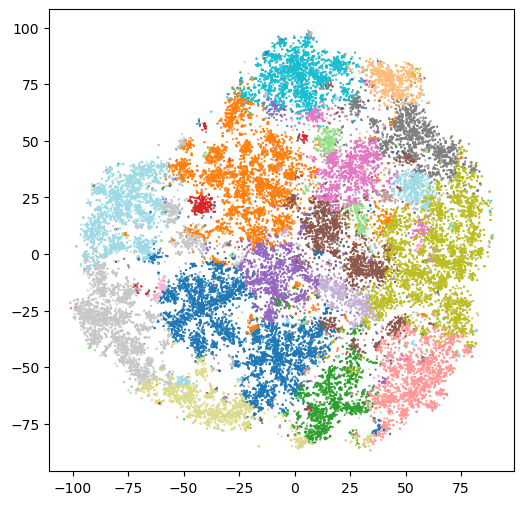

In [493]:
import matplotlib.pyplot as plt
max_topic_id = document_topics.argmax(axis=1)
plt.figure(figsize=(6,6))
plt.scatter(TSNE_res[:, 0], TSNE_res[:, 1], c=max_topic_id, cmap = 'tab20', marker='.', s=1)

plt.show()

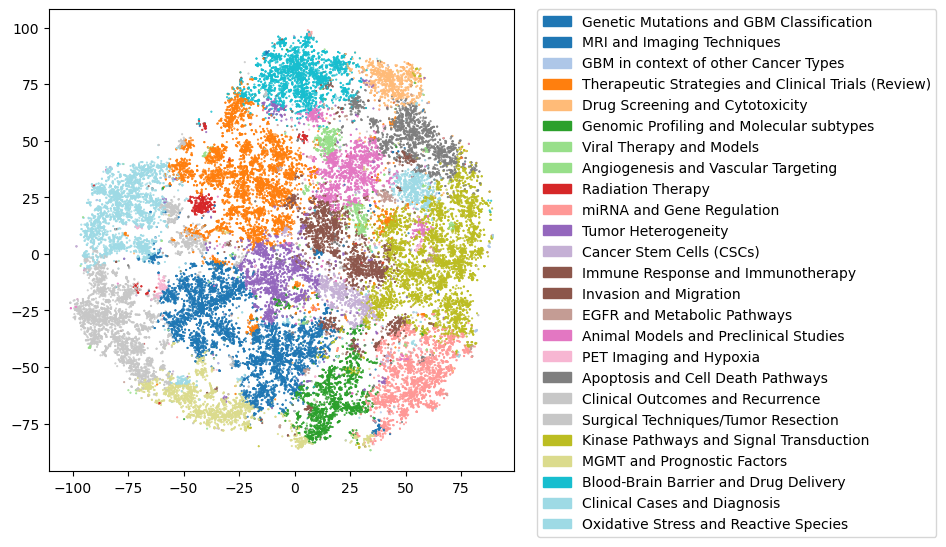

In [768]:
plt.show()
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

max_topic_id = document_topics.argmax(axis=1)
plt.figure(figsize=(6,6))
scatter = plt.scatter(TSNE_res[:, 0], TSNE_res[:, 1], c=max_topic_id, cmap = 'tab20', marker='.', s=1)


# Create a legend with the topic names
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=topics[i]) for i in range(len(topics))]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# Creating DataFrame of 'Document Topics' of abstracts

In [477]:
doc_topics_df = pd.DataFrame(document_topics)

In [478]:
#adding the Year column to the dataframe
doc_topics_df['Year']=df_new['Year']

In [479]:
#adding the title column to the dataframe

doc_topics_df['Title']=df_new['Title']

In [480]:
#adding the journal column to the dataframe

doc_topics_df['Journal'] = df_new['Journal']

In [481]:
#renaming 'document topics' columns to their defined topic (according to the topic dictionary above)

doc_topics_df.rename(columns=topics, inplace=True)

In [462]:
#getting info on topic relevance according to year
years_strength = doc_topics_df.groupby('Year').sum()

In [626]:
years_strength.head()

,Genetic Mutations and GBM Classification,MRI and Imaging Techniques,GBM in context of other Cancer Types,Therapeutic Strategies and Clinical Trials (Review),Drug Screening and Cytotoxicity,Genomic Profiling and Molecular subtypes,Viral Therapy and Models,Angiogenesis and Vascular Targeting,Radiation Therapy,miRNA and Gene Regulation,Tumor Heterogeneity,Cancer Stem Cells (CSCs),Immune Response and Immunotherapy,Invasion and Migration,EGFR and Metabolic Pathways,Animal Models and Preclinical Studies,PET Imaging and Hypoxia,Apoptosis and Cell Death Pathways,Clinical Outcomes and Recurrence,Surgical Techniques/Tumor Resection,Kinase Pathways and Signal Transduction,MGMT and Prognostic Factors,Blood-Brain Barrier and Drug Delivery,Clinical Cases and Diagnosis,Oxidative Stress and Reactive Species,Title,Journal
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,
1974,0.000000,0.082302,0.000000,0.000000,0.000000,0.286252,0.000000,0.000000,0.000000,0.000000,0.077705,0.000000,0.234933,0.016856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014774,0.253789,0.000000,0.000000,0.025191,[25 years of electroencephalography in cerebro...,Schweiz Arch Neurol Neurochir Psychiatr
1975,0.135484,0.907855,0.254460,0.697721,0.649568,0.671238,0.137446,0.162313,0.301617,0.710753,0.554913,0.316468,0.296697,0.346993,0.161333,0.791173,0.035905,1.327911,1.988097,0.242294,1.065382,1.641717,1.651573,0.386150,0.443722,[The problem of early diagnosis of brain tumou...,J NeurolWien Klin WochenschrBiull Eksp Biol Me...
1976,1.016859,0.633510,0.050931,1.757148,0.144586,1.317201,0.140917,0.150777,0.041881,1.101791,2.567348,0.204449,0.445102,0.256056,0.273115,0.372111,0.050974,0.229399,0.000000,0.382228,0.924670,0.103109,0.219583,0.472943,0.000000,[Cytophotometric determination of DNA concentr...,TsitologiiaMMW Munch Med WochenschrNouv Presse...
1977,0.752416,1.956136,0.190913,0.760844,0.056501,0.135968,0.000000,0.035197,0.060657,0.219618,0.494018,0.000000,0.205479,0.533922,0.000000,0.062073,0.225701,0.332156,0.624565,0.565712,0.368546,0.037684,0.244398,0.977471,0.054633,"[""Primary"" reticulum-cellsarcoma of the retina...",Klin Monbl AugenheilkdNo To ShinkeiNuklearmedi...
1978,0.223400,1.122992,0.036957,1.044522,0.179434,0.907320,0.000000,0.502062,0.084374,0.000000,0.440980,0.539399,0.059024,0.065215,0.019170,0.173335,0.125146,0.268655,1.139116,0.095585,0.171546,0.090600,0.184616,0.263723,0.198050,[Anti-tumor antibodies in the blood of patient...,Schweiz Med WochenschrC R Acad Hebd Seances Ac...


In [550]:
journal_strength = doc_topics_df.groupby('Journal').sum()

In [484]:
journal_strength

,Genetic Mutations and GBM Classification,MRI and Imaging Techniques,GBM in context of other Cancer Types,Therapeutic Strategies and Clinical Trials (Review),Drug Screening and Cytotoxicity,Genomic Profiling and Molecular subtypes,Viral Therapy and Models,Angiogenesis and Vascular Targeting,Radiation Therapy,miRNA and Gene Regulation,Tumor Heterogeneity,Cancer Stem Cells (CSCs),Immune Response and Immunotherapy,Invasion and Migration,EGFR and Metabolic Pathways,Animal Models and Preclinical Studies,PET Imaging and Hypoxia,Apoptosis and Cell Death Pathways,Clinical Outcomes and Recurrence,Surgical Techniques/Tumor Resection,Kinase Pathways and Signal Transduction,MGMT and Prognostic Factors,Blood-Brain Barrier and Drug Delivery,Clinical Cases and Diagnosis,Oxidative Stress and Reactive Species,Year,Title
Journal,,,,,,,,,,,,,,,,,,,,,,,,,,,
3 Biotech,0.224567,0.000000,0.164835,0.876504,0.227418,0.134597,0.037403,0.000000,0.000000,0.468124,0.147781,0.083156,0.084124,0.000000,0.178004,0.141912,0.012303,0.189211,0.927599,0.000000,0.997615,0.210938,0.097996,0.762689,0.963385,2021202220232020201820212021,Anti-proliferative and apoptotic effects of gr...
3D Print Med,0.015883,0.000000,0.000000,0.000000,0.000000,0.000000,0.046367,0.053013,0.000000,0.000000,0.039750,0.250868,0.000000,0.149733,0.000000,0.208321,0.000000,0.000000,0.000000,0.046721,0.000000,0.000000,0.000000,0.093179,0.088460,2018,High-throughput scaffold-free microtissues thr...
AAPS J,0.059717,0.033271,0.018049,0.284636,0.453968,0.000000,0.000000,0.000000,0.000000,0.026164,0.406241,0.243958,0.000000,0.000000,0.000000,0.010531,0.000000,0.285157,0.000000,0.000000,0.000000,0.000000,0.040602,0.000000,0.121086,20192017,Estimation of Solid Tumor Doubling Times from ...
AAPS PharmSciTech,0.000000,0.452696,0.126114,1.674954,0.186241,0.041233,0.140731,0.054710,0.108669,0.000000,0.735725,0.080148,0.288189,0.184142,0.000000,0.331683,0.016954,0.102826,0.710514,0.036841,0.316124,0.267099,1.352314,0.680731,0.046835,20212023202320202020201920182021,Enhancement of Therapies for Glioblastoma (GBM...
ACS Appl Bio Mater,0.494833,0.379038,0.229989,1.931095,1.176046,0.250571,0.428347,0.387287,0.428427,0.974527,1.458564,0.333532,0.184057,1.530857,0.032416,1.581505,0.239572,1.595619,0.594686,0.856387,0.862723,0.253388,4.741099,0.396771,0.467497,2023202320232023202320222021202220212023202220...,Combining Pr(3+)-Doped Nanoradiosensitizers an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bioRxiv [Preprint],0.599015,0.220115,0.171266,2.073845,0.538279,0.346011,0.026186,0.388403,0.050662,0.455319,1.012200,0.341933,0.570203,0.260120,0.233497,0.794631,0.146222,1.089651,0.488554,0.768902,1.062069,0.808048,0.507751,1.361592,0.533703,0,Inhibition of glioblastoma cell proliferation ...
iScience,0.939146,1.858251,0.078276,5.869286,0.245375,1.310239,0.355412,0.372081,0.371863,1.504816,1.912357,0.669399,1.175980,0.567233,0.449822,0.288129,0.245356,0.450627,1.240039,0.335694,1.641442,1.211544,0.729043,2.672780,0.192345,2022202220242024202420222022202120242023202220...,Algorithmic reconstruction of glioblastoma net...
mBio,0.304715,0.000000,0.070998,0.167110,0.101639,0.019907,0.000000,0.046878,0.000000,0.121963,0.107738,0.576124,0.045450,0.333028,0.290601,0.323221,0.012944,0.342191,0.830086,0.094406,0.000000,0.000000,0.080500,0.000000,0.086723,2020201420212020,Human Cytomegalovirus Genomes Survive Mitosis ...


In [771]:
sum_topics = journal_strength.sum(axis=1)
sum_topics


Journal
3 Biotech              6.930161
3D Print Med           0.992296
AAPS J                 1.982712
AAPS PharmSciTech      7.935472
ACS Appl Bio Mater    21.808815
                        ...    
bioRxiv [Preprint]    14.848866
iScience              26.686344
mBio                   3.956223
mSphere                1.981849
medRxiv [Preprint]     1.981363
Length: 2851, dtype: float32

In [773]:
Journal_topic_weight = journal_strength.div(sum_topics, axis=0)
Journal_topic_weight

,Genetic Mutations and GBM Classification,MRI and Imaging Techniques,GBM in context of other Cancer Types,Therapeutic Strategies and Clinical Trials (Review),Drug Screening and Cytotoxicity,Genomic Profiling and Molecular subtypes,Viral Therapy and Models,Angiogenesis and Vascular Targeting,Radiation Therapy,miRNA and Gene Regulation,Tumor Heterogeneity,Cancer Stem Cells (CSCs),Immune Response and Immunotherapy,Invasion and Migration,EGFR and Metabolic Pathways,Animal Models and Preclinical Studies,PET Imaging and Hypoxia,Apoptosis and Cell Death Pathways,Clinical Outcomes and Recurrence,Surgical Techniques/Tumor Resection,Kinase Pathways and Signal Transduction,MGMT and Prognostic Factors,Blood-Brain Barrier and Drug Delivery,Clinical Cases and Diagnosis,Oxidative Stress and Reactive Species
Journal,,,,,,,,,,,,,,,,,,,,,,,,,
3 Biotech,0.032390,0.000000,0.023785,0.126482,0.032815,0.019440,0.005397,0.000000,0.000000,0.067543,0.021321,0.012000,0.012139,0.000000,0.025684,0.020476,0.001775,0.027303,0.133849,0.000000,0.143951,0.030432,0.014143,0.110055,0.139018
3D Print Med,0.016004,0.000000,0.000000,0.000000,0.000000,0.000000,0.046805,0.053425,0.000000,0.000000,0.040025,0.252804,0.000000,0.150897,0.000000,0.209910,0.000000,0.000000,0.000000,0.047084,0.000000,0.000000,0.000000,0.093904,0.089143
AAPS J,0.041130,0.016780,0.009103,0.143871,0.229047,0.000000,0.000000,0.000000,0.000000,0.013196,0.205091,0.121437,0.000000,0.000000,0.000000,0.005311,0.000000,0.143821,0.000000,0.000000,0.000000,0.000000,0.010142,0.000000,0.061071
AAPS PharmSciTech,0.000000,0.057047,0.015892,0.211085,0.023466,0.005197,0.017736,0.006895,0.013694,0.000000,0.092713,0.010098,0.036317,0.023204,0.000000,0.041794,0.002137,0.012962,0.089536,0.004641,0.039844,0.033659,0.170395,0.085791,0.005902
ACS Appl Bio Mater,0.022687,0.014615,0.010538,0.088540,0.054100,0.012372,0.019651,0.017803,0.021181,0.045023,0.067881,0.015241,0.008713,0.069018,0.001486,0.072294,0.011018,0.073181,0.027270,0.039252,0.040482,0.011623,0.217367,0.017329,0.021337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bioRxiv [Preprint],0.040345,0.016134,0.011534,0.139891,0.036249,0.022457,0.001763,0.026152,0.003411,0.030700,0.067613,0.023009,0.038404,0.017566,0.015727,0.053531,0.009842,0.073361,0.032902,0.051783,0.071498,0.054419,0.034195,0.091580,0.035934
iScience,0.035188,0.069639,0.002933,0.219385,0.009194,0.051272,0.013396,0.014085,0.013933,0.056375,0.071630,0.025068,0.042800,0.021250,0.016874,0.010798,0.009194,0.016889,0.046651,0.012655,0.061421,0.044740,0.027319,0.100106,0.007206
mBio,0.077002,0.000000,0.017946,0.042239,0.025696,0.005032,0.000000,0.011849,0.000000,0.030821,0.027233,0.145626,0.011488,0.084178,0.073457,0.081706,0.003272,0.086495,0.209826,0.023864,0.000000,0.000000,0.020347,0.000000,0.021922


In [774]:
Journal_topic_weight2 = Journal_topic_weight.to_numpy()
Journal_topic_weight2


array([[0.03239006, 0.        , 0.02378496, ..., 0.01414318, 0.11005536,
        0.13901754],
       [0.01600363, 0.        , 0.        , ..., 0.        , 0.09390386,
        0.08914332],
       [0.04112957, 0.0167804 , 0.00910325, ..., 0.01014175, 0.        ,
        0.06107072],
       ...,
       [0.0770018 , 0.        , 0.01794618, ..., 0.02034708, 0.        ,
        0.02192209],
       [0.        , 0.02404115, 0.        , ..., 0.14643125, 0.0625755 ,
        0.        ],
       [0.        , 0.        , 0.06383264, ..., 0.        , 0.03274843,
        0.06977142]], dtype=float32)

In [781]:
Journal_topic_weight['lda_vectors'] = Journal_topic_weight2.tolist()
Journal_topic_weight.reset_index(inplace=True)
Journal_topic_weight


,index,Journal,Genetic Mutations and GBM Classification,MRI and Imaging Techniques,GBM in context of other Cancer Types,Therapeutic Strategies and Clinical Trials (Review),Drug Screening and Cytotoxicity,Genomic Profiling and Molecular subtypes,Viral Therapy and Models,Angiogenesis and Vascular Targeting,Radiation Therapy,miRNA and Gene Regulation,Tumor Heterogeneity,Cancer Stem Cells (CSCs),Immune Response and Immunotherapy,Invasion and Migration,EGFR and Metabolic Pathways,Animal Models and Preclinical Studies,PET Imaging and Hypoxia,Apoptosis and Cell Death Pathways,Clinical Outcomes and Recurrence,Surgical Techniques/Tumor Resection,Kinase Pathways and Signal Transduction,MGMT and Prognostic Factors,Blood-Brain Barrier and Drug Delivery,Clinical Cases and Diagnosis,Oxidative Stress and Reactive Species,lda_vectors
0,0,3 Biotech,0.032390,0.000000,0.023785,0.126482,0.032815,0.019440,0.005397,0.000000,0.000000,0.067543,0.021321,0.012000,0.012139,0.000000,0.025684,0.020476,0.001775,0.027303,0.133849,0.000000,0.143951,0.030432,0.014143,0.110055,0.139018,"[0.032390061765909195, 0.0, 0.0237849559634923..."
1,1,3D Print Med,0.016004,0.000000,0.000000,0.000000,0.000000,0.000000,0.046805,0.053425,0.000000,0.000000,0.040025,0.252804,0.000000,0.150897,0.000000,0.209910,0.000000,0.000000,0.000000,0.047084,0.000000,0.000000,0.000000,0.093904,0.089143,"[0.016003625467419624, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,AAPS J,0.041130,0.016780,0.009103,0.143871,0.229047,0.000000,0.000000,0.000000,0.000000,0.013196,0.205091,0.121437,0.000000,0.000000,0.000000,0.005311,0.000000,0.143821,0.000000,0.000000,0.000000,0.000000,0.010142,0.000000,0.061071,"[0.04112957417964935, 0.01678040437400341, 0.0..."
3,3,AAPS PharmSciTech,0.000000,0.057047,0.015892,0.211085,0.023466,0.005197,0.017736,0.006895,0.013694,0.000000,0.092713,0.010098,0.036317,0.023204,0.000000,0.041794,0.002137,0.012962,0.089536,0.004641,0.039844,0.033659,0.170395,0.085791,0.005902,"[0.0, 0.0570468008518219, 0.015891699120402336..."
4,4,ACS Appl Bio Mater,0.022687,0.014615,0.010538,0.088540,0.054100,0.012372,0.019651,0.017803,0.021181,0.045023,0.067881,0.015241,0.008713,0.069018,0.001486,0.072294,0.011018,0.073181,0.027270,0.039252,0.040482,0.011623,0.217367,0.017329,0.021337,"[0.022687017917633057, 0.014614742249250412, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,2846,bioRxiv [Preprint],0.040345,0.016134,0.011534,0.139891,0.036249,0.022457,0.001763,0.026152,0.003411,0.030700,0.067613,0.023009,0.038404,0.017566,0.015727,0.053531,0.009842,0.073361,0.032902,0.051783,0.071498,0.054419,0.034195,0.091580,0.035934,"[0.04034489020705223, 0.016133779659867287, 0...."
2847,2847,iScience,0.035188,0.069639,0.002933,0.219385,0.009194,0.051272,0.013396,0.014085,0.013933,0.056375,0.071630,0.025068,0.042800,0.021250,0.016874,0.010798,0.009194,0.016889,0.046651,0.012655,0.061421,0.044740,0.027319,0.100106,0.007206,"[0.0351879708468914, 0.06963872909545898, 0.00..."
2848,2848,mBio,0.077002,0.000000,0.017946,0.042239,0.025696,0.005032,0.000000,0.011849,0.000000,0.030821,0.027233,0.145626,0.011488,0.084178,0.073457,0.081706,0.003272,0.086495,0.209826,0.023864,0.000000,0.000000,0.020347,0.000000,0.021922,"[0.07700180262327194, 0.0, 0.01794617995619774..."
2849,2849,mSphere,0.000000,0.024041,0.000000,0.235326,0.008559,0.000000,0.000000,0.006195,0.000000,0.036808,0.005779,0.000000,0.000000,0.000000,0.013392,0.146568,0.000000,0.000000,0.276656,0.000000,0.000000,0.037669,0.146431,0.062575,0.000000,"[0.0, 0.024041149765253067, 0.0, 0.23532629013..."


In [483]:
pd.set_option('display.max_columns', None)
journal_strength.sort_values(by='Immune Response and Immunotherapy', ascending=False).head(50)

,Genetic Mutations and GBM Classification,MRI and Imaging Techniques,GBM in context of other Cancer Types,Therapeutic Strategies and Clinical Trials (Review),Drug Screening and Cytotoxicity,Genomic Profiling and Molecular subtypes,Viral Therapy and Models,Angiogenesis and Vascular Targeting,Radiation Therapy,miRNA and Gene Regulation,Tumor Heterogeneity,Cancer Stem Cells (CSCs),Immune Response and Immunotherapy,Invasion and Migration,EGFR and Metabolic Pathways,Animal Models and Preclinical Studies,PET Imaging and Hypoxia,Apoptosis and Cell Death Pathways,Clinical Outcomes and Recurrence,Surgical Techniques/Tumor Resection,Kinase Pathways and Signal Transduction,MGMT and Prognostic Factors,Blood-Brain Barrier and Drug Delivery,Clinical Cases and Diagnosis,Oxidative Stress and Reactive Species,Year,Title
Journal,,,,,,,,,,,,,,,,,,,,,,,,,,,
J Neurooncol,119.189880,93.911133,19.916153,158.089905,50.635094,58.190086,35.223198,32.911274,34.689281,88.236977,107.241379,43.496845,56.482563,72.147148,27.874201,88.919228,19.513582,79.503632,140.195526,37.289234,159.095749,92.253304,70.745522,119.253456,42.482956,2022202220212023202220232021202220232022202120...,Radiomics for precision medicine in glioblasto...
Int J Mol Sci,29.268520,26.917599,8.951991,122.204247,28.729568,47.966900,11.820888,12.788449,14.802152,47.595871,54.197132,26.566795,29.507401,26.061440,14.694407,34.798313,8.824967,40.463028,29.231792,10.761040,70.045074,34.024723,39.791241,30.132177,22.576906,2024202220222021202120212021202120212022202220...,Recurrent Glioblastoma-Molecular Underpinnings...
Cancers (Basel),39.060326,56.240555,7.784513,119.793945,24.572100,49.073620,12.045499,12.825912,10.738049,52.890961,55.251125,21.248713,26.499142,24.525877,14.320351,34.712990,7.946629,30.145220,53.530411,17.126780,57.959297,49.506283,47.918385,47.713928,18.592764,2021202220232023202220212022202220222021202420...,Glioblastomas within the Subventricular Zone A...
PLoS One,36.650875,40.158752,8.650686,69.470360,23.638212,32.188301,17.535246,14.069993,10.783419,41.145267,48.351326,27.404697,22.238724,28.011637,14.156108,38.105724,9.862101,38.198521,55.618977,15.236198,84.823189,39.176682,33.960262,41.030834,18.336971,2022202220242021202320222021202120242021202320...,Prognostic value of 11C-methionine volume-base...
Cancer Res,53.740540,31.705250,7.644652,53.125267,21.107906,17.191626,14.328858,14.242293,17.960020,27.446455,36.303677,15.169853,22.046177,34.764740,13.216264,37.693150,6.542965,34.835060,54.416420,13.970063,64.568794,25.496132,21.740189,64.182541,16.015413,2021202220212022202420232022202220242024202120...,Elimination of Radiation-Induced Senescence in...
Neuro Oncol,51.337067,40.401001,8.957744,73.140999,28.070124,33.769470,10.808346,12.235016,13.494207,40.310242,52.415657,21.906811,21.537008,32.010994,15.123370,39.438030,8.715643,31.662544,52.730629,17.439342,80.045319,34.110260,36.115257,51.907082,16.927624,2023202420232023202420222024202120232022202120...,Depatuxizumab mafodotin in EGFR-amplified newl...
Front Oncol,28.944050,30.881954,6.729088,96.846680,18.303415,41.496010,9.527950,11.462543,12.123225,36.441399,40.112457,20.382107,20.681271,18.572584,10.426684,27.289936,5.895770,25.351362,38.608654,10.333123,55.693474,36.830639,37.329720,39.932713,13.512953,2022202220222021202120232023202120222024202120...,Pro-inflammatory cytokines in cystic glioblast...
Sci Rep,32.276253,42.350948,7.541934,66.121986,20.607265,31.627420,8.983829,11.420416,7.158041,36.614784,47.429630,17.554636,19.524405,18.912165,10.531413,25.318790,6.217944,28.020304,35.037167,14.524479,48.722984,31.087421,29.590672,36.268570,16.078699,2022202320242022202320212021202420232024202320...,Nanobodies targeting ABCC3 for immunotargeted ...
Front Immunol,7.969915,6.023586,2.487572,41.187836,3.245879,24.168438,3.370022,3.085069,2.485779,11.363875,13.489141,4.938556,19.003847,4.357821,3.640050,8.729566,2.037794,5.773788,7.988585,2.708785,11.279741,9.753553,10.533310,8.120810,4.083879,202120242023202120

In [794]:
df_new['lda_vectors'] = list(document_topics)

In [795]:
def recommend_journals(df_new, dictionary_new3, lda_model, query, top_n=10):
    import pandas as pd, numpy as np, gensim
    from sklearn.metrics.pairwise import cosine_similarity
    tokens = tokenize(query, stopwords=stopwords3)
    bow = dictionary_new3.doc2bow(tokens)    
    document_vector = gensim.matutils.corpus2dense(lda_model[[bow]], num_terms=lda_model.num_topics).reshape(1, -1)
   
    # compute similarities between the abstract and all other abstracts
    similarities = cosine_similarity(document_vector , np.stack(df_new['lda_vectors']))
    sorted_index = similarities.argsort()[0][::-1] # sort all papers by the similarity to the requested one
    recommended = pd.DataFrame ({
        'Title': df_new['Title'].iloc[sorted_index[:top_n]],
        'Journal': df_new['Journal'].iloc[sorted_index[:top_n]],
        'Year': df_new['Year'].iloc[sorted_index[:top_n]],
        'Match': similarities[0,sorted_index[:top_n]],
        
    })
    return recommended


In [796]:
#example usage
query = 'Glioblastoma is the most lethal primary brain tumor with glioblastoma stem cells (GSCs) atop a cellular hierarchy. GSCs often reside in a perivascular niche, where they receive maintenance cues from endothelial cells, but the role of heterogeneous endothelial cell populations remains unresolved. Here, we show that lymphatic endothelial-like cells (LECs), while previously unrecognized in brain parenchyma, are present in glioblastomas and promote growth of CCR7-positive GSCs through CCL21 secretion. Disruption of CCL21–CCR7 paracrine communication between LECs and GSCs inhibited GSC proliferation and growth. LEC-derived CCL21 induced KAT5-mediated acetylation of HMGCS1 on K273 in GSCs to enhance HMGCS1 protein stability. HMGCS1 promoted cholesterol synthesis in GSCs, favorable for tumor growth. Expression of the CCL21–CCR7 axis correlated with KAT5 expression and HMGCS1K273 acetylation in glioblastoma specimens, informing patient outcome. Collectively, glioblastomas contain previously unrecognized LECs that promote the molecular crosstalk between endothelial and tumor cells, offering potentially alternative therapeutic strategies.'
recommend_journals(df_new, dictionary_new3, lda_model, query, top_n=10)

,Title,Journal,Year,Match
3246,Lymphatic endothelial-like cells promote gliob...,Nat Cancer,2024,1.000000
28861,Therapy-resistant tumor microvascular endothel...,Oncogene,2013,0.920960
20952,"Sox2, a stemness gene, regulates tumor-initiat...",J Chin Med Assoc,2016,0.914891
69245,Glioblastoma stem cells produce vascular endot...,J Pathol,2008,0.914370
21412,HMGA2 sustains self-renewal and invasiveness o...,Oncotarget,2016,0.910387
21226,CXCL12 mediates glioblastoma resistance to rad...,Neuro Oncol,2017,0.909186
11787,CXCR4 Antagonists as Stem Cell Mobilizers and ...,Biology (Basel),2020,0.906831
21453,Sox2: regulation of expression and contributio...,CNS Oncol,2016,0.904729
33528,Potential identity of multi-potential cancer s...,BMC Neurosci,2008,0.904120
26669,Inhibition of EGFR induces a c-MET-driven stem...,Stem Cells,2014,0.900463


In [840]:
#example usage2
query2 = 'Glioblastoma (GBM) is the most common and aggressive primary brain tumor, characterized by poor survival and high recurrence rates. This can be attributed in part to the high phenotypic plasticity of GBM cells. By changing cell state, malignant cells can become resistant to treatments and reversibly adapt to the dynamic conditions of the tumor microenvironment. Moreover, studies in transgenic mouse models have demonstrated that GBM can arise from different cells-of-origin, indicating also that the lineage of the tumor-initiating cell contributes to the biological and genomic phenotype of GBM. These results suggest that the cell-of-origin may not only serve as a source of diversity for these tumors, but may also provide new avenues for improved diagnostics and therapeutic targeting that may prolong patients survival. So far, these models describe the transformation of neural stem-cells, oligodendrocyte progenitors, and mature neurons and astrocytes, suggesting different cell types can be responsible for different glioma subtypes and contribute to tumor heterogeneity. In particular, previous studies described the malignant transformation of early oligodendrocyte progenitors into GBM using an NG2-Cre model. However, the transformation of mature cells in this lineage has yet to be described.In this project, we aim to describe the transformation of mature oligodendrocytes via a Cre-inducible lentiviral vector containing H-RAS or PDGFB oncogenes, and shRNA targeting p53. In order to specifically target mature myelinating oligodendrocytes, we will be using a CNP-Cre mouse model. The CNP gene codes for CNPase, a myelin-associated enzyme whose expression is considered to be one of the early events of oligodendrocyte differentiation into mature myelinating cells. We have demonstrated that injection of transgenic CNP-Cre mice with the lentivirus resulted in GBM tumors, which were characterized by H&E and immunofluorescence stainings, as well as RNA sequencing. Interestingly, these transcriptomics analysis uncovered modifications in pathways related to myelination and locomotory behavior. To date, there is little evidence for motor impairment in preclinical models of GBM. In this study, we performed longitudinal behavioral assessments in mice bearing GBM initiated from different cells-of-origin and revealed early behavioral deficits to be specific to tumors arising from oligodendrocytes. These findings suggest the importance of the cell-of-origin in the development of GBM and provide an opportunity to discover novel therapeutic targets.'

recommended_test = recommend_journal(df_new, dictionary_new3, lda_model, query2, top_n=10)
recommended_test

,Title,Journal,Year,Match
17825,Modelling glioblastoma tumour-host cell intera...,Dis Model Mech,2018,0.925422
30187,Animal models to study cancer-initiating cells...,Front Biosci (Landmark Ed),2011,0.925351
35595,Development of gliomas: potential role of asym...,Lancet Oncol,2004,0.925263
32052,Brain cancer stem cells.,J Mol Med (Berl),2009,0.918119
44339,Carbonic Anhydrase XII is a Clinically Signifi...,Onco Targets Ther,2021,0.910770
30678,Cryopreservation of cancer-initiating cells de...,Front Biosci (Schol Ed),2011,0.910100
25678,Aberrant self-renewal and quiescence contribut...,J Pathol,2014,0.905183
26181,Optimization of high grade glioma cell culture...,J Vis Exp,2014,0.904506
19956,Bisacodyl and its cytotoxic activity on human ...,Biochim Biophys Acta Mol Cell Res,2017,0.896250
5976,Identification and isolation of slow-cycling g...,Methods Cell Biol,2022,0.895448


In [842]:
#rec = recommended_test.drop(recommended_test.head(1).index, inplace=True)
df_filtered = recommended_test[recommended_test['Title'] != 'Modelling glioblastoma tumour-host cell interactions using adult brain\norganotypic slice co-culture.']
df_filtered

,Title,Journal,Year,Match
30187,Animal models to study cancer-initiating cells...,Front Biosci (Landmark Ed),2011,0.925351
35595,Development of gliomas: potential role of asym...,Lancet Oncol,2004,0.925263
32052,Brain cancer stem cells.,J Mol Med (Berl),2009,0.918119
44339,Carbonic Anhydrase XII is a Clinically Signifi...,Onco Targets Ther,2021,0.910770
30678,Cryopreservation of cancer-initiating cells de...,Front Biosci (Schol Ed),2011,0.910100
25678,Aberrant self-renewal and quiescence contribut...,J Pathol,2014,0.905183
26181,Optimization of high grade glioma cell culture...,J Vis Exp,2014,0.904506
19956,Bisacodyl and its cytotoxic activity on human ...,Biochim Biophys Acta Mol Cell Res,2017,0.896250
5976,Identification and isolation of slow-cycling g...,Methods Cell Biol,2022,0.895448


In [832]:
recommended_test

,Title,Journal,Year,Match
30187,Animal models to study cancer-initiating cells...,Front Biosci (Landmark Ed),2011,0.925381
35595,Development of gliomas: potential role of asym...,Lancet Oncol,2004,0.925303
32052,Brain cancer stem cells.,J Mol Med (Berl),2009,0.918180
44339,Carbonic Anhydrase XII is a Clinically Signifi...,Onco Targets Ther,2021,0.910783
30678,Cryopreservation of cancer-initiating cells de...,Front Biosci (Schol Ed),2011,0.910121
25678,Aberrant self-renewal and quiescence contribut...,J Pathol,2014,0.905166
26181,Optimization of high grade glioma cell culture...,J Vis Exp,2014,0.904494
19956,Bisacodyl and its cytotoxic activity on human ...,Biochim Biophys Acta Mol Cell Res,2017,0.896263
5976,Identification and isolation of slow-cycling g...,Methods Cell Biol,2022,0.895463


In [783]:
def recommend_journals_new(Journal_topic_weight, dictionary_new3, lda_model, query, top_n=10):
    import pandas as pd, numpy as np, gensim
    from sklearn.metrics.pairwise import cosine_similarity
    tokens = tokenize(query, stopwords=stopwords3)
    bow = dictionary_new3.doc2bow(tokens)    
    document_vector = gensim.matutils.corpus2dense(lda_model[[bow]], num_terms=lda_model.num_topics).reshape(1, -1)
   
    # compute similarities between the abstract and the topic distribution of journals
    similarities = cosine_similarity(document_vector , np.stack(Journal_topic_weight['lda_vectors']))
    sorted_index = similarities.argsort()[0][::-1] # sort all journals by the similarity to the requested one
    recommended = pd.DataFrame ({
        'Journal': Journal_topic_weight['Journal'].iloc[sorted_index[:top_n]],
        'Match': similarities[0,sorted_index[:top_n]],
        
    })
    return recommended

In [786]:
#example usage
query = 'Glioblastoma is the most lethal primary brain tumor with glioblastoma stem cells (GSCs) atop a cellular hierarchy. GSCs often reside in a perivascular niche, where they receive maintenance cues from endothelial cells, but the role of heterogeneous endothelial cell populations remains unresolved. Here, we show that lymphatic endothelial-like cells (LECs), while previously unrecognized in brain parenchyma, are present in glioblastomas and promote growth of CCR7-positive GSCs through CCL21 secretion. Disruption of CCL21–CCR7 paracrine communication between LECs and GSCs inhibited GSC proliferation and growth. LEC-derived CCL21 induced KAT5-mediated acetylation of HMGCS1 on K273 in GSCs to enhance HMGCS1 protein stability. HMGCS1 promoted cholesterol synthesis in GSCs, favorable for tumor growth. Expression of the CCL21–CCR7 axis correlated with KAT5 expression and HMGCS1K273 acetylation in glioblastoma specimens, informing patient outcome. Collectively, glioblastomas contain previously unrecognized LECs that promote the molecular crosstalk between endothelial and tumor cells, offering potentially alternative therapeutic strategies.'
recommend_journals_new(Journal_topic_weight, dictionary_new3, lda_model, query, top_n=10)

,Journal,Match
889,Curr Top Membr,0.892336
2275,Neurosignals,0.828734
1755,J Neurol Neurosurg,0.819754
1832,J Psychiatr Res,0.806466
1541,J Cancer Ther,0.802494
491,Br J Anaesth,0.801075
2446,Photomed Laser Surg,0.799689
1228,Gut,0.790946
832,Curr Drug Saf,0.788136
711,Cholesterol Derivatives as Promising Anticance...,0.774669


In [809]:
#example usage2
query2 = 'Glioblastoma (GBM) is the most common and aggressive primary brain tumor, characterized by poor survival and high recurrence rates. This can be attributed in part to the high phenotypic plasticity of GBM cells. By changing cell state, malignant cells can become resistant to treatments and reversibly adapt to the dynamic conditions of the tumor microenvironment. Moreover, studies in transgenic mouse models have demonstrated that GBM can arise from different cells-of-origin, indicating also that the lineage of the tumor-initiating cell contributes to the biological and genomic phenotype of GBM. These results suggest that the cell-of-origin may not only serve as a source of diversity for these tumors, but may also provide new avenues for improved diagnostics and therapeutic targeting that may prolong patients survival. So far, these models describe the transformation of neural stem-cells, oligodendrocyte progenitors, and mature neurons and astrocytes, suggesting different cell types can be responsible for different glioma subtypes and contribute to tumor heterogeneity. In particular, previous studies described the malignant transformation of early oligodendrocyte progenitors into GBM using an NG2-Cre model. However, the transformation of mature cells in this lineage has yet to be described.In this project, we aim to describe the transformation of mature oligodendrocytes via a Cre-inducible lentiviral vector containing H-RAS or PDGFB oncogenes, and shRNA targeting p53. In order to specifically target mature myelinating oligodendrocytes, we will be using a CNP-Cre mouse model. The CNP gene codes for CNPase, a myelin-associated enzyme whose expression is considered to be one of the early events of oligodendrocyte differentiation into mature myelinating cells. We have demonstrated that injection of transgenic CNP-Cre mice with the lentivirus resulted in GBM tumors, which were characterized by H&E and immunofluorescence stainings, as well as RNA sequencing. Interestingly, these transcriptomics analysis uncovered modifications in pathways related to myelination and locomotory behavior. To date, there is little evidence for motor impairment in preclinical models of GBM. In this study, we performed longitudinal behavioral assessments in mice bearing GBM initiated from different cells-of-origin and revealed early behavioral deficits to be specific to tumors arising from oligodendrocytes. These findings suggest the importance of the cell-of-origin in the development of GBM and provide an opportunity to discover novel therapeutic targets.'

recommend_journals_new(Journal_topic_weight, dictionary_new3, lda_model, query2, top_n=10)

,Journal,Match
2179,Nat Chem Biol,0.874835
832,Curr Drug Saf,0.816413
2534,Radiat Environ Biophys,0.809184
2571,Research (Wash D C),0.806972
1540,J Cancer Surviv,0.806102
2756,Tsitologiia,0.802849
2594,SN Compr Clin Med,0.788702
2446,Photomed Laser Surg,0.770549
402,Biol Cybern,0.769445
2693,Targeting Energy Metabolism to Overcome Therap...,0.768964


In [855]:
from sklearn.model_selection import train_test_split


# Implement evaluation metrics (this is a simplified example)
def evaluate_recommender(train_df, test_df,  lda_vector_weights, recommender_function, top_n=10):
    correct_recommendations = 0
    total_recommendations = 0

    for _, row in test_df.iterrows():
        new_abstract = row['Abstract_text']
        actual_journal = row['Journal']
        recommended_journals = recommender_function(lda_vector_weights, dictionary_new3, lda_model, new_abstract, top_n)
 
        if recommender_function == recommend_journals:
            #As we trained already with data including the test set, it will match with the original paper. Hence, exclude the paper to evaluate 
            if row['Title'] in recommended_journals['Title'].values:
                recommended_journals = recommended_journals[recommended_journals['Title'] != row['Title']]
        if actual_journal in recommended_journals['Journal'].values:
            correct_recommendations += 1
        total_recommendations += 1

    accuracy = correct_recommendations / total_recommendations
    return accuracy, correct_recommendations, total_recommendations



# Splitting data for evaluation
train_df, test_df = train_test_split(df_new, test_size=0.2, random_state=42) 

## For matching abstracts to most similar paper
lda_vector_weights, recommender_function, topn = df_new, recommend_journals, 20 
## For matching abstract to most similar Journal
#lda_vector_weights, recommender_function, topn = Journal_topic_weight, recommend_journals_new, 20


accuracy, correct_recommendations,total_recommendations = evaluate_recommender(train_df, test_df, lda_vector_weights, recommender_function, topn)
print(f"Recommender Accuracy: {accuracy:.2f}, Correct Recomm/Total: {correct_recommendations:.2f},/,{total_recommendations:.2f}")


Recommender Accuracy: 0.32, Correct Recomm/Total: 3034.00,/,9336.00


In [856]:

### WARNING -- Long Run, iterates 2 times over all dataset ###
# Splitting data for evaluation
train_df, test_df = train_test_split(df_new, test_size=0.99, random_state=42) 

## For matching abstracts to most similar paper
lda_vector_weights, recommender_function, topn = df_new, recommend_journals, 20 
accuracy, correct_recommendations,total_recommendations = evaluate_recommender(train_df, test_df, lda_vector_weights, recommender_function, topn)
print(f"Recommender Accuracy: {accuracy:.2f}, Correct Recomm/Total: {correct_recommendations:.2f},/,{total_recommendations:.2f}")


## For matching abstract to most similar Journal
lda_vector_weights, recommender_function, topn = Journal_topic_weight, recommend_journals_new, 20
accuracy, correct_recommendations,total_recommendations = evaluate_recommender(train_df, test_df, lda_vector_weights, recommender_function, topn)
print(f"Recommender Accuracy: {accuracy:.2f}, Correct Recomm/Total: {correct_recommendations:.2f},/,{total_recommendations:.2f}")




Recommender Accuracy: 0.33, Correct Recomm/Total: 15162.00,/,46211.00
Recommender Accuracy: 0.01, Correct Recomm/Total: 362.00,/,46211.00


In [ ]:
from sklearn.model_selection import train_test_split


# Implement evaluation metrics (this is a simplified example)
def evaluate_recommender(train_df, test_df,  lda_vector_weights, recommender_function, top_n=10):
    top_n=10
    
    
    correct_recommendations = 0
    total_recommendations = 0

    for _, row in test_df.iterrows():
        new_abstract = row['Abstract_text']
        actual_journal = row['Journal']
        recommended_journals = recommender_function(lda_vector_weights, dictionary_new3, lda_model, new_abstract, top_n)
 
        if recommender_function == recommend_journals:
            #As we trained already with data including the test set, it will match with the original paper. Hence, exclude the paper to evaluate 
            if row['Title'] in recommended_journals['Title'].values:
                recommended_journals = recommended_journals[recommended_journals['Title'] != row['Title']]
        if actual_journal in recommended_journals['Journal'].values:
            correct_recommendations += 1
        total_recommendations += 1

    accuracy = correct_recommendations / total_recommendations
    return accuracy, correct_recommendations, total_recommendations



# Splitting data for evaluation
train_df, test_df = train_test_split(df_new, test_size=0.2, random_state=42) 

## For matching abstracts to most similar paper
lda_vector_weights, recommender_function = df_new, recommend_journals
## For matching abstract to most similar Journal
#lda_vector_weights, recommender_function = Journal_topic_weight, recommend_journals_new


accuracy, correct_recommendations,total_recommendations = evaluate_recommender(train_df, test_df, lda_vector_weights, recommender_function)
print(f"Recommender Accuracy: {accuracy:.2f}, Correct Recomm/Total: {correct_recommendations:.2f},/,{total_recommendations:.2f}")


In [767]:
%history

import pandas as pd
abstracts_df = pd.read_csv('gbm_abstracts.tsv', sep='\t')
abstracts_df.head()
abstracts_df[['Data', 'Title', 'Authors', 'Affiliations', 'Abstract_text', 'copyright', 'IDs', 'copyright', 'extra', 'ola']] = abstracts_df['abstract'].str.split('\n\n', expand=True)
abstracts_df['Data'] = abstracts_df['Data'].apply(lambda x: x.replace('. ', ','))
abstracts_df[['Journal', 'Date', 'doi','x','y','z','p']]= abstracts_df['Data'].str.split(',', expand=True)
abstracts_df[['date', 'issue', 'extra2', 'extra3']]= abstracts_df['Date'].str.split(';', expand=True)
abstracts_df[['clean_date', 'extra4', 'extra5']]= abstracts_df['date'].str.split(':', expand=True)
abstracts_df.drop('z', axis=1, inplace=True)
abstracts_df.drop('x', axis=1, inplace=True)
abstracts_df.drop('y', axis=1, inplace=True)
abstracts_df.drop('p', axis=1, inplace=True)
abstracts_df.drop('extra2', axis=1, inplace=True)
abstracts_df.drop('extra3', axis=1, inplace=True)
abstracts_df.drop('ola', axis=1, inplace=True)
ab